In [2]:
%pip install pdfminer.six

   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.6 MB 325.1 kB/s eta 0:00:18
   ---------------------------------------- 0.0/5.6 MB 245.8 kB/s eta 0:00:23
    --------------------------------------- 0.1/5.6 MB 416.7 kB/s eta 0:00:14
    --------------------------------------- 0.1/5.6 MB 561.1 kB/s eta 0:00:10
   - -------------------------------------- 0.2/5.6 MB 808.4 kB/s eta 0:00:07
   - -------------------------------------- 0.2/5.6 MB 801.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/5.6 MB 737.3 kB/s eta 0:00:08
   -- ------------------------------------- 0.4/5.6 MB 857.5 kB/s eta 0:00:07
   -- ------------------------------------- 0.4/5.6 MB 849.3 kB/s eta 0:00:07
   -- ------------------------------------- 0.4/5.6 MB 849.3 kB/s eta 0:00:07
   -- ------------------------------------- 0.4/5.6 MB 692.6 kB/s eta 0:00:08
   -

In [3]:
%pip install python-docx

   ---------------------------------------- 0.0/253.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/253.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/253.0 kB 330.3 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/253.0 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/253.0 kB 297.7 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/253.0 kB 327.3 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/253.0 kB 423.5 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/253.0 kB 562.0 kB/s eta 0:00:01
   ------------------------------------ - 245.8/253.0 kB 656.0 kB/s eta 0:00:01
   -------------------------------------- 253.0/253.0 kB 597.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pdfminer.six python-docx pandas numpy scikit-learn nltk spacy matplotlib unidecode

INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.9 MB 1.4 MB/s eta 0:00:11
   ---------------------------------------- 0.1/14.9 MB 1.3 MB/s eta 0:00:12
   ---------------------------------------- 0.1/14.9 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.2/14.9 MB 1.4 MB/s eta 0:00:11
    --------------------------------------- 0.2/14.9 MB 1.4 MB/s eta 0:00:11
    --------------------------------------- 0.3/14.9 MB 1.2 MB/s eta 0:00:13
   - -------------------------------------- 0.4/14.9 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.4/14.9 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.4/14.9 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.4/14.9 MB 997.2 kB/s eta 0:00:15
   - -----------

In [5]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.0/12.8 MB 196.9 kB/s eta 0:01:05
     --------------------------------------- 0.1/12.8 MB 273.8 kB/s eta 0:00:47
     --------------------------------------- 0.1/12.8 MB 327.7 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 415.1 kB/s eta 0:00:31
      -------------------------------------- 0.2/12.8 MB 567.2 kB/s eta 0:00:23
      -------------------------------------- 0.3/12.8 MB 656.4 kB/s eta 0:00:20
      -------------------------------------- 0.3/12.8 MB 632.7 kB/s eta 0:00:20
     - ------------------------------------- 0.3/12.8 MB 677.0 kB/s eta 0:00:19
     - ------------------------------------- 0.4/12.8 MB 790.7 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB

In [10]:
%pip install nltk spacy scikit-learn matplotlib wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------- 20.5/299.9 kB 81.9 kB/s eta 0:00:04
   --- ----------------------------------- 30.7/299.9 kB 163.8 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/299.9 kB 163.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 192.5 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 192.5 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/299.9 kB 191.1 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/299.9 kB 273.1 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/299.9 kB 316.5 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/299.9 kB 430.1 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 524.2 kB

In [2]:
# === Block A (integrated): discover, load, quality-check, and save corpus ===

from pathlib import Path
import re, unicodedata
import pandas as pd
from unidecode import unidecode

# Readers
from pdfminer.high_level import extract_text as pdf_extract_text
from docx import Document

# ---------- file readers ----------
def read_pdf(filename: str) -> str:
    try:
        return pdf_extract_text(filename) or ""
    except Exception as e:
        print(f"[PDF read error] {filename}: {e}")
        return ""

def read_docx(filename: str) -> str:
    try:
        doc = Document(filename)
        return "\n".join(p.text for p in doc.paragraphs)
    except Exception as e:
        print(f"[DOCX read error] {filename}: {e}")
        return ""

def read_txt(filename: str) -> str:
    try:
        return Path(filename).read_text(encoding="utf-8", errors="ignore")
    except Exception:
        return Path(filename).read_text(encoding="latin-1", errors="ignore")

def load_text(filename: str) -> str:
    fn = filename.lower()
    # prefer DOCX if available (cleaner than PDF text)
    if fn.endswith(".docx"):
        return read_docx(filename)
    if fn.endswith(".pdf"):
        return read_pdf(filename)
    if fn.endswith(".txt"):
        return read_txt(filename)
    try:
        return read_txt(filename)
    except Exception:
        return ""

# ---------- meta helpers ----------
YEAR_PAT = re.compile(r"(19|20)\d{2}")

def parse_meta(fname: str, arena_hint: str):
    stem = Path(fname).stem
    year = None
    m = YEAR_PAT.search(stem)
    if m:
        year = int(m.group(0))
    norm = re.sub(r"[_\-]+", " ", stem)
    if year:
        norm = re.sub(str(year), "", norm)
    norm = re.sub(r"\b" + re.escape(arena_hint) + r"\b", "", norm, flags=re.IGNORECASE)
    event = re.sub(r"\s+", " ", norm).strip()
    return {"arena": arena_hint, "year": year, "event": event}

# ---------- quality metrics ----------
def ascii_ratio(s: str) -> float:
    if not isinstance(s, str) or not s:
        return 0.0
    s = unicodedata.normalize("NFKC", s)
    total = len(s)
    ascii_only = sum(1 for ch in s if ord(ch) < 128 and ch.isprintable())
    return ascii_only / max(total, 1)

def noise_score(s: str) -> float:
    """0 good … higher = noisier. Combines punctuation density + tiny 'words' share."""
    if not isinstance(s, str) or not s:
        return 1.0
    s = unicodedata.normalize("NFKC", s)
    punct_ratio = sum(ch in r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" for ch in s) / len(s)
    tokens = re.findall(r"[A-Za-zÀ-ÖØ-öø-ÿ]+", s)
    short_frac = (sum(len(t) <= 2 for t in tokens) / max(len(tokens), 1))
    return 0.6*punct_ratio + 0.4*short_frac

# ---------- discover files in current working directory ----------
cwd = Path(".").resolve()
patterns = {
    "G20":  ["G20_*_LeadersCommunique.pdf", "G20_*_LeadersDeclaration.pdf"],
    "NATO": ["NATO_*_Summit.txt"],
    "UNGA": ["UNGA_*_Erdogan.docx", "UNGA_*_Erdogan.pdf"],  # prefer docx if both
    "EU":   ["EU_*_EUCO_Conclusions_Migration.pdf"],
}

found = []
for arena, globs in patterns.items():
    for g in globs:
        for p in cwd.glob(g):
            if p.is_file():
                found.append({"arena": arena, "path": str(p)})

# If both PDF and DOCX exist for same base name, keep DOCX
def prefer_docx(rows):
    keep = {}
    for r in rows:
        stem = Path(r["path"]).stem
        ext = Path(r["path"]).suffix.lower()
        if stem not in keep:
            keep[stem] = r
        else:
            if ext == ".docx" or Path(keep[stem]["path"]).suffix.lower() != ".docx":
                keep[stem] = r
    return list(keep.values())

found = prefer_docx(found)

manifest = pd.DataFrame(found).sort_values(["arena","path"]).reset_index(drop=True)
if manifest.empty:
    raise SystemExit("No files matched. Are you in the folder with the PDFs/TXTs/DOCXs?")
print("=== Manifest of discovered files ===")
display(manifest)

# ---------- load texts & build dataframe ----------
records, warn_rows = [], []
for row in manifest.itertuples(index=False):
    arena, path = row.arena, row.path
    text_raw = load_text(path)
    text = unidecode(text_raw)  # normalise diacritics (Türkiye→Turkiye)
    meta = parse_meta(Path(path).name, arena)
    n_words = len(text.split())
    n_chars = len(text)
    ar = ascii_ratio(text)
    ns = noise_score(text)

    if (n_words < 150) or (ar < 0.75) or (ns > 0.45):
        warn_rows.append((Path(path).name, meta["arena"], meta["year"], n_words, round(ar,3), round(ns,3)))

    records.append({
        "arena": meta["arena"],
        "year": meta["year"],
        "event": meta["event"],
        "filename": Path(path).name,
        "n_chars": n_chars,
        "n_words": n_words,
        "ascii_ratio": ar,
        "noise_score": ns,
        "text": text
    })

    preview = text[:260].replace("\n", " ")
    print(f"✅ Loaded {Path(path).name} | arena={arena} year={meta['year']} words={n_words}")
    print(f"   preview: {preview}...\n")

docs = pd.DataFrame(records).sort_values(["arena","year","filename"]).reset_index(drop=True)
print("\n=== Tidy corpus dataframe (first rows) ===")
display(docs[["arena","year","event","filename","n_words","ascii_ratio","noise_score"]].head(12))

# ---------- show problem files ----------
if warn_rows:
    print("\n⚠️  Potentially problematic documents (low wordcount / low ASCII / high noise):")
    prob = pd.DataFrame(warn_rows, columns=["filename","arena","year","n_words","ascii_ratio","noise_score"])
    display(prob.sort_values(["arena","year","filename"]).reset_index(drop=True))

# ---------- create a cleaned subset for analysis ----------
drop_mask = (docs["n_words"] < 150) | (docs["ascii_ratio"] < 0.75) | (docs["noise_score"] > 0.45)
docs_clean = docs.loc[~drop_mask].copy()

print(f"\nUsing {len(docs_clean)} clean docs out of {len(docs)} total "
      f"({drop_mask.sum()} dropped as noisy).")

# ---------- save CSVs (no full text) ----------
docs.drop(columns=["text"]).to_csv("institutional_corpus.csv", index=False)
docs_clean.drop(columns=["text"]).to_csv("institutional_corpus_clean.csv", index=False)
print("Saved: institutional_corpus.csv (all) and institutional_corpus_clean.csv (filtered).")


=== Manifest of discovered files ===


arena                                               path
0     EU  C:\Users\gurde\EU_2016_Jun_EUCO_Conclusions_Mi...
1     EU  C:\Users\gurde\EU_2016_Mar_EUCO_Conclusions_Mi...
2     EU  C:\Users\gurde\EU_2016_Oct_EUCO_Conclusions_Mi...
3    G20  C:\Users\gurde\G20_2014_Brisbane_LeadersCommun...
4    G20  C:\Users\gurde\G20_2015_Antalya_LeadersCommuni...
5    G20  C:\Users\gurde\G20_2017_Hamburg_LeadersDeclara...
6    G20  C:\Users\gurde\G20_2018_BuenosAires_LeadersDec...
7    G20  C:\Users\gurde\G20_2019_Osaka_LeadersDeclarati...
8    G20  C:\Users\gurde\G20_2020_Riyadh_LeadersDeclarat...
9    G20  C:\Users\gurde\G20_2021_Rome_LeadersDeclaratio...
10   G20  C:\Users\gurde\G20_2022_Bali_LeadersDeclaratio...
11   G20  C:\Users\gurde\G20_2023_NewDelhi_LeadersDeclar...
12  NATO        C:\Users\gurde\NATO_2012_Chicago_Summit.txt
13  NATO          C:\Users\gurde\NATO_2014_Wales_Summit.txt
14  NATO         C:\Users\gurde\NATO_2016_Warsaw_Summit.txt
15  NATO       C:\Users\gurde\NATO_2021_Brussels_Summit.txt
16  NATO         C:\Users\gurde\NATO_2022_Madrid_Summit.txt
17  NATO        C:\Users\gurde\NATO_2023_Vilnius_Summit.txt
18  UNGA          C:\Users\gurde\UNGA_2009_64th_Erdogan.pdf
19  UNGA         C:\Users\gurde\UNGA_2016_71st_Erdogan.docx
20  UNGA          C:\Users\gurde\UNGA_2022_77th_Erdogan.pdf
21  UNGA          C:\Users\gurde\UNGA_2023_78th_Erdogan.pdf
22  UNGA         C:\Users\gurde\UNGA_2024_79th_Erdogan.docx

✅ Loaded EU_2016_Jun_EUCO_Conclusions_Migration.pdf | arena=EU year=2016 words=2082
   preview:  European Council   Brussels, 28 June 2016  (OR. en)   EUCO 26/16   CO EUR 5  CONCL 3   COVER NOTE   From:  To:   Subject:   General Secretariat of the Council  Delegations   European Council meeting (28 June 2016)  - Conclusions   Delegations will find attach...

✅ Loaded EU_2016_Mar_EUCO_Conclusions_Migration.pdf | arena=EU year=2016 words=1303
   preview:   Council of the EU  PRESS EN  PRESS RELEASE 143/16 18/03/2016  European Council conclusions, 17-18 March 2016 I. MIGRATION  1.  The European Council confirms its comprehensive strategy to tackle the migration crisis. Several elements of our common European re...

✅ Loaded EU_2016_Oct_EUCO_Conclusions_Migration.pdf | arena=EU year=2016 words=1018
   preview:   Council of the EU  PRESS EN  PRESS RELEASE 602/16 20/10/2016  European Council conclusions on migration, 20 October 2016 I. MIGRATION  1. The European Council took stock of the lat

Cannot set gray non-stroke color because /'P6' is an invalid float value
Cannot set gray non-stroke color because /'P28' is an invalid float value


✅ Loaded G20_2014_Brisbane_LeadersCommunique.pdf | arena=G20 year=2014 words=3147
   preview: G20 Leaders' Communique  Brisbane Summit, 15-16 November 2014   1. Raising global growth to deliver better living standards and quality jobs for people across the world is our highest  priority.  We  welcome  stronger  growth  in  some  key  economies.  But  t...



Cannot set gray non-stroke color because /'P36' is an invalid float value
Cannot set gray non-stroke color because /'P39' is an invalid float value
Cannot set gray non-stroke color because /'P42' is an invalid float value
Cannot set gray non-stroke color because /'P45' is an invalid float value
Cannot set gray non-stroke color because /'P48' is an invalid float value
Cannot set gray non-stroke color because /'P51' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P70' is an invalid float value
Cannot set gray non-stroke color because /'P73' is an invalid float value


✅ Loaded G20_2015_Antalya_LeadersCommunique.pdf | arena=G20 year=2015 words=6008
   preview: G20 Leaders' Communique   Antalya Summit, 15-16 November 2015   Introduction   1.  We,  the  Leaders  of  the  G20,  met  in  Antalya  on  15-16  November  2015  to  determine  further  collective actions towards achieving strong, sustainable and balanced grow...

✅ Loaded G20_2017_Hamburg_LeadersDeclaration.pdf | arena=G20 year=2017 words=5519
   preview: G20 Leaders' Declaration  Shaping an interconnected world   Hamburg, 7/8 July 2017         Preamble:    We, the Leaders of the G20, met in Hamburg, Germany on 7-8 July 2017 to address  major global economic challenges and to contribute to prosperity and well-...

✅ Loaded G20_2018_BuenosAires_LeadersDeclaration.pdf | arena=G20 year=2018 words=3626
   preview: G20 Leaders' declaration  Building consensus for fair and sustainable development   1. Ten years since the first G20 Leaders' Summit we met in Buenos Aires, Argentina, on 30 November- 1

arena  year                           event  \
0     EU  2016  Jun EUCO Conclusions Migration   
1     EU  2016  Mar EUCO Conclusions Migration   
2     EU  2016  Oct EUCO Conclusions Migration   
3    G20  2014      Brisbane LeadersCommunique   
4    G20  2015       Antalya LeadersCommunique   
5    G20  2017      Hamburg LeadersDeclaration   
6    G20  2018  BuenosAires LeadersDeclaration   
7    G20  2019        Osaka LeadersDeclaration   
8    G20  2020       Riyadh LeadersDeclaration   
9    G20  2021         Rome LeadersDeclaration   
10   G20  2022         Bali LeadersDeclaration   
11   G20  2023     NewDelhi LeadersDeclaration   

                                       filename  n_words  ascii_ratio  \
0    EU_2016_Jun_EUCO_Conclusions_Migration.pdf     2082     0.959932   
1    EU_2016_Mar_EUCO_Conclusions_Migration.pdf     1303     0.986475   
2    EU_2016_Oct_EUCO_Conclusions_Migration.pdf     1018     0.983191   
3       G20_2014_Brisbane_LeadersCommunique.pdf     3147     0.985071   
4        G20_2015_Antalya_LeadersCommunique.pdf     6008     0.983213   
5       G20_2017_Hamburg_LeadersDeclaration.pdf     5519     0.983615   
6   G20_2018_BuenosAires_LeadersDeclaration.pdf     3626     0.982961   
7         G20_2019_Osaka_LeadersDeclaration.pdf     6045     0.983895   
8        G20_2020_Riyadh_LeadersDeclaration.pdf     5857     0.984014   
9          G20_2021_Rome_LeadersDeclaration.pdf    10097     0.985181   
10         G20_2022_Bali_LeadersDeclaration.pdf    10437     0.984361   
11     G20_2023_NewDelhi_LeadersDeclaration.pdf    14772     0.979477   

    noise_score  
0      0.089193  
1      0.095605  
2      0.095573  
3      0.090064  
4      0.087957  
5      0.086923  
6      0.083549  
7      0.090219  
8      0.089427  
9      0.086596  
10     0.086165  
11     0.113125


⚠️  Potentially problematic documents (low wordcount / low ASCII / high noise):


filename arena  year  n_words  ascii_ratio  noise_score
0  UNGA_2024_79th_Erdogan.docx  UNGA  2024     1914        0.974        0.452


Using 22 clean docs out of 23 total (1 dropped as noisy).
Saved: institutional_corpus.csv (all) and institutional_corpus_clean.csv (filtered).


Using 22 documents for analysis.


arena  year  n_docs  words  turkey_mentions  security_mentions  mean_sent  \
0     EU  2016       3   4403               18                 19     0.9987   
1    G20  2014       1   3147                1                 12     1.0000   
2    G20  2015       1   6008                4                 18     1.0000   
3    G20  2017       1   5519                0                 18     1.0000   
4    G20  2018       1   3626                0                 13     1.0000   
5    G20  2019       1   6045                0                 18     1.0000   
6    G20  2020       1   5857                1                 17     0.9999   
7    G20  2021       1  10097                0                 28     1.0000   
8    G20  2022       1  10437                1                 35     1.0000   
9    G20  2023       1  14772                1                 49     1.0000   
10  NATO  2012       1   8316                2                298     1.0000   
11  NATO  2014       1  13471                3                560     1.0000   
12  NATO  2016       1  16486                6                724     1.0000   
13  NATO  2021       1  14462                5                544     1.0000   
14  NATO  2022       1   1979                0                 71     0.9997   
15  NATO  2023       1  11322                0                412     1.0000   
16  UNGA  2009       1   2681               26                 35     0.9999   
17  UNGA  2016       1   2113               18                 23     0.9963   
18  UNGA  2022       1   3397               22                 38     0.9995   
19  UNGA  2023       1   3637               18                 26     0.9999   

    turkey_mentions_per_10k  
0                 40.881217  
1                  3.177629  
2                  6.657790  
3                  0.000000  
4                  0.000000  
5                  0.000000  
6                  1.707359  
7                  0.000000  
8                  0.958130  
9                  0.676956  
10                 2.405002  
11                 2.227006  
12                 3.639452  
13                 3.457336  
14                 0.000000  
15                 0.000000  
16                96.978739  
17                85.186938  
18                64.763026  
19                49.491339

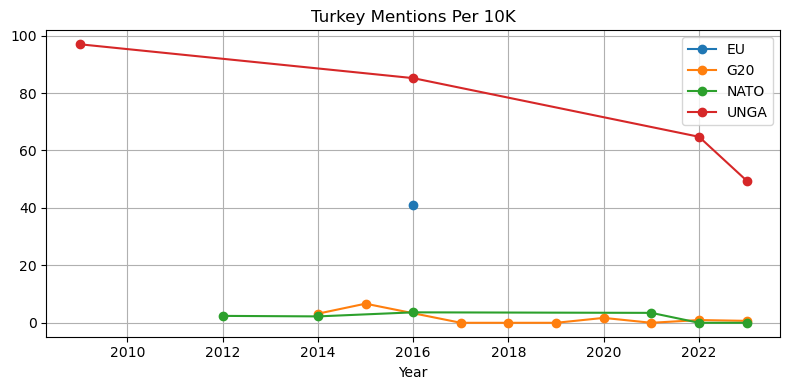

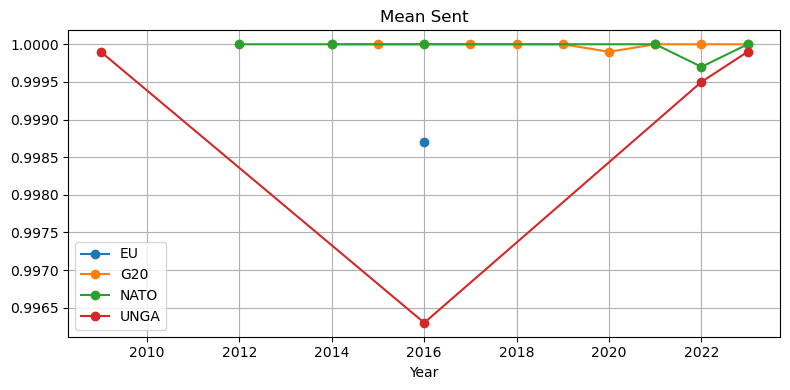

topic                                          top_words arena
0       0  european, council, eu, commission, member, mig...    EU
1       1  entry, experts, york, host, issues, joint, jor...    EU
2       2  entry, experts, york, host, issues, joint, jor...    EU
3       0  relation, outbreak, momentum, cent, preservati...   G20
4       1  g20, 2014, november, growth, global, work, fin...   G20
5       2  g20, global, sustainable, including, support, ...   G20
6       3  g20, including, global, sustainable, support, ...   G20
7       4  g20, growth, development, sustainable, global,...   G20
8       0  describes, jointly, sign, reconstruction, 05, ...  NATO
9       1  nato, security, defence, allies, including, co...  NATO
10      2  nato, security, defence, alliance, continue, c...  NATO
11      3  describes, jointly, sign, reconstruction, 05, ...  NATO
12      4  describes, jointly, sign, reconstruction, 05, ...  NATO
13      0  peace, international, turkiye, united, nations...  UNGA
14      1  turkey, people, terrorist, countries, time, or...  UNGA
15      2  peace, turkey, gaza, security, global, stabili...  UNGA
16      3  country, world, global, people, turkiye, count...  UNGA

Saved: institutional_docs_with_metrics.csv, institutional_yearly_aggregates.csv, institutional_entities_summary.csv, institutional_topics_by_arena.csv


In [3]:
# === Block B: analysis on the clean corpus ===
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter
import nltk, spacy
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# pick the clean corpus if present
docs_to_use = docs_clean.copy() if 'docs_clean' in globals() else docs.copy()

# 0) basic clean
def basic_clean(t):
    if not isinstance(t, str): return ""
    t = t.replace("\x00"," ")
    t = re.sub(r"\s+", " ", t).strip()
    return t

docs_to_use['text'] = docs_to_use['text'].map(basic_clean)
docs_to_use['n_words'] = docs_to_use['text'].apply(lambda t: len(t.split()))
docs_to_use = docs_to_use[docs_to_use['n_words'] > 0].copy()
print(f"Using {len(docs_to_use)} documents for analysis.")

# 1) keyword mentions
TURKEY_PAT   = re.compile(r"\b(turkey|türkiye|turkiye|turkish|ankara)\b", re.I)
SECURITY_PAT = re.compile(r"\b(security|stability|terroris[mt]|nato|alliance|defen[cs]e|peacekeeping)\b", re.I)

def count_pat(text, pat): return len(pat.findall(text)) if isinstance(text, str) else 0
docs_to_use['mentions_turkey']   = docs_to_use['text'].apply(lambda t: count_pat(t, TURKEY_PAT))
docs_to_use['mentions_security'] = docs_to_use['text'].apply(lambda t: count_pat(t, SECURITY_PAT))
docs_to_use['mentions_per_1k']   = 1000.0 * docs_to_use['mentions_turkey'] / docs_to_use['n_words'].clip(lower=1)

# 2) sentiment
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def vader_compound(text):
    try: return sia.polarity_scores(text)['compound']
    except: return np.nan
docs_to_use['sentiment'] = docs_to_use['text'].map(vader_compound)

# 3) named entities
try:
    nlp
except NameError:
    nlp = spacy.load("en_core_web_sm")
TARGET_ENTS = {"ORG","GPE","NORP"}
def extract_ents(text):
    try:
        doc = list(nlp.pipe([text], disable=['tagger','parser','lemmatizer']))[0]
        return [(e.text.strip(), e.label_) for e in doc.ents if e.label_ in TARGET_ENTS]
    except:
        return []
docs_to_use['entities'] = docs_to_use['text'].apply(extract_ents)

def top_entities(df, topn=20):
    bag = Counter()
    for ents in df['entities']: bag.update([e[0] for e in ents])
    return pd.DataFrame(bag.most_common(topn), columns=['entity','count'])

entity_tables = {}
for arena in docs_to_use['arena'].unique():
    entity_tables[(arena,'all')] = top_entities(docs_to_use[docs_to_use['arena']==arena], 25)
for (arena,yr), g in docs_to_use.groupby(['arena','year']):
    entity_tables[(arena,yr)] = top_entities(g, 15)

# 4) aggregates + plots
agg_year = (docs_to_use.groupby(['arena','year'])
            .agg(n_docs=('filename','count'),
                 words=('n_words','sum'),
                 turkey_mentions=('mentions_turkey','sum'),
                 security_mentions=('mentions_security','sum'),
                 mean_sent=('sentiment','mean'))
            .reset_index())
agg_year['turkey_mentions_per_10k'] = 10000.0 * agg_year['turkey_mentions'] / agg_year['words'].replace(0, np.nan)
display(agg_year)

def plot_metric(metric):
    plt.figure(figsize=(8,4))
    for arena, g in agg_year.groupby('arena'):
        g = g.sort_values('year')
        plt.plot(g['year'], g[metric], marker='o', label=arena)
    plt.title(metric.replace('_',' ').title()); plt.xlabel('Year'); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

plot_metric('turkey_mentions_per_10k')
plot_metric('mean_sent')

# 5) topic modelling per arena (LDA)
def lda_topics(texts, n_topics=5, n_words=12, max_features=5000, min_df=2):
    vect = CountVectorizer(lowercase=True, stop_words='english', max_features=max_features, min_df=min_df)
    X = vect.fit_transform(texts)
    if X.shape[0] < n_topics: n_topics = max(2, min(X.shape[0], 5))
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, learning_method='batch')
    W = lda.fit_transform(X); H = lda.components_; vocab = np.array(vect.get_feature_names_out())
    rows = []
    for k in range(lda.n_components):
        top_idx = H[k].argsort()[::-1][:n_words]
        rows.append({"topic": k, "top_words": ", ".join(vocab[top_idx])})
    return pd.DataFrame(rows), pd.Series(W.argmax(axis=1), name='topic')

topics_by_arena = {}
for arena, grp in docs_to_use.groupby('arena'):
    tdf, doc_assign = lda_topics(grp['text'].tolist())
    tdf['arena'] = arena
    topics_by_arena[arena] = tdf
    docs_to_use.loc[grp.index, 'lda_topic'] = doc_assign.values

topics_table = pd.concat(topics_by_arena.values(), ignore_index=True)
display(topics_table)

# 6) save outputs (no full text in CSVs)
docs_to_use.drop(columns=['text']).to_csv("institutional_docs_with_metrics.csv", index=False)
agg_year.to_csv("institutional_yearly_aggregates.csv", index=False)

rows = []
for (arena, yr), dfE in entity_tables.items():
    dfE2 = dfE.copy(); dfE2['arena'] = arena; dfE2['year'] = yr; rows.append(dfE2)
pd.concat(rows, ignore_index=True).to_csv("institutional_entities_summary.csv", index=False)

topics_table.to_csv("institutional_topics_by_arena.csv", index=False)
print("Saved: institutional_docs_with_metrics.csv, institutional_yearly_aggregates.csv, institutional_entities_summary.csv, institutional_topics_by_arena.csv")


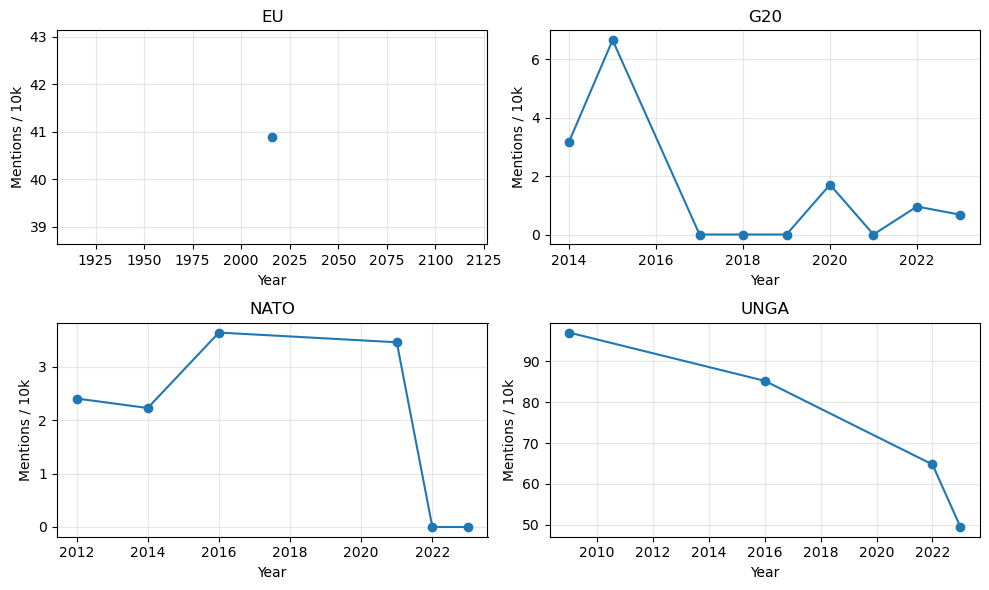

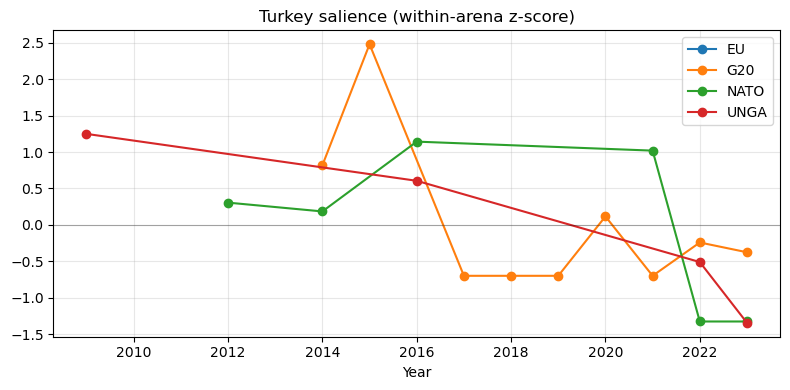

Saved qualitative snippets → institutional_concordance_turkey.csv
Saved figures to figs/, aggregates to institutional_yearly_aggregates_clean.csv


In [4]:
# === Tidy visualisations + qualitative context ===
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
Path("figs").mkdir(exist_ok=True)

# 1) Small-multiples: Turkey mentions per 10k by arena (separate scales)
fig, axes = plt.subplots(2, 2, figsize=(10,6), sharex=False)
axes = axes.ravel()
for ax, arena in zip(axes, sorted(agg_year['arena'].unique())):
    g = agg_year[agg_year['arena']==arena].sort_values('year')
    ax.plot(g['year'], g['turkey_mentions_per_10k'], marker='o')
    ax.set_title(arena); ax.grid(True, alpha=.3)
    ax.set_xlabel('Year'); ax.set_ylabel('Mentions / 10k')
plt.tight_layout()
plt.savefig("figs/turkey_mentions_small_multiples.png", dpi=200)
plt.show()

# 2) Normalise within-arena (z-scores) to compare shapes across arenas
norm = agg_year.copy()
norm['z_mentions'] = norm.groupby('arena')['turkey_mentions_per_10k']\
                         .transform(lambda s: (s - s.mean())/s.std(ddof=0))
plt.figure(figsize=(8,4))
for arena, g in norm.groupby('arena'):
    g = g.sort_values('year')
    plt.plot(g['year'], g['z_mentions'], marker='o', label=arena)
plt.axhline(0, color='k', lw=0.8, alpha=.3)
plt.title("Turkey salience (within-arena z-score)")
plt.xlabel('Year'); plt.legend(); plt.grid(True, alpha=.3); plt.tight_layout()
plt.savefig("figs/turkey_mentions_zscore.png", dpi=200)
plt.show()

# 3) Concordance (context windows) for qualitative coding
def concordance_rows(df, pattern=r"\b(turkey|turkiye|türkiye)\b", window=60, max_hits=20):
    out = []
    rx = re.compile(pattern, flags=re.I)
    for row in df.itertuples(index=False):
        text = row.text
        hits = []
        for m in rx.finditer(text):
            i = m.start()
            left = max(0, i-window); right = min(len(text), i+window)
            snippet = text[left:right].replace("\n"," ")
            hits.append(snippet)
            if len(hits) >= max_hits:
                break
        if hits:
            out.append({
                "arena": row.arena, "year": row.year, "filename": row.filename,
                "n_words": row.n_words, "hits": len(hits), "examples": " || ".join(hits)
            })
    return pd.DataFrame(out)

# Use the cleaned docs frame you created earlier (rename if yours is docs not docs_clean)
df_qual = concordance_rows(docs_clean, window=80, max_hits=15)
df_qual.to_csv("institutional_concordance_turkey.csv", index=False)
print("Saved qualitative snippets → institutional_concordance_turkey.csv")

# 4) Save per-arena summaries you already computed (nice for appendix)
agg_year.sort_values(['arena','year']).to_csv("institutional_yearly_aggregates_clean.csv", index=False)
print("Saved figures to figs/, aggregates to institutional_yearly_aggregates_clean.csv")


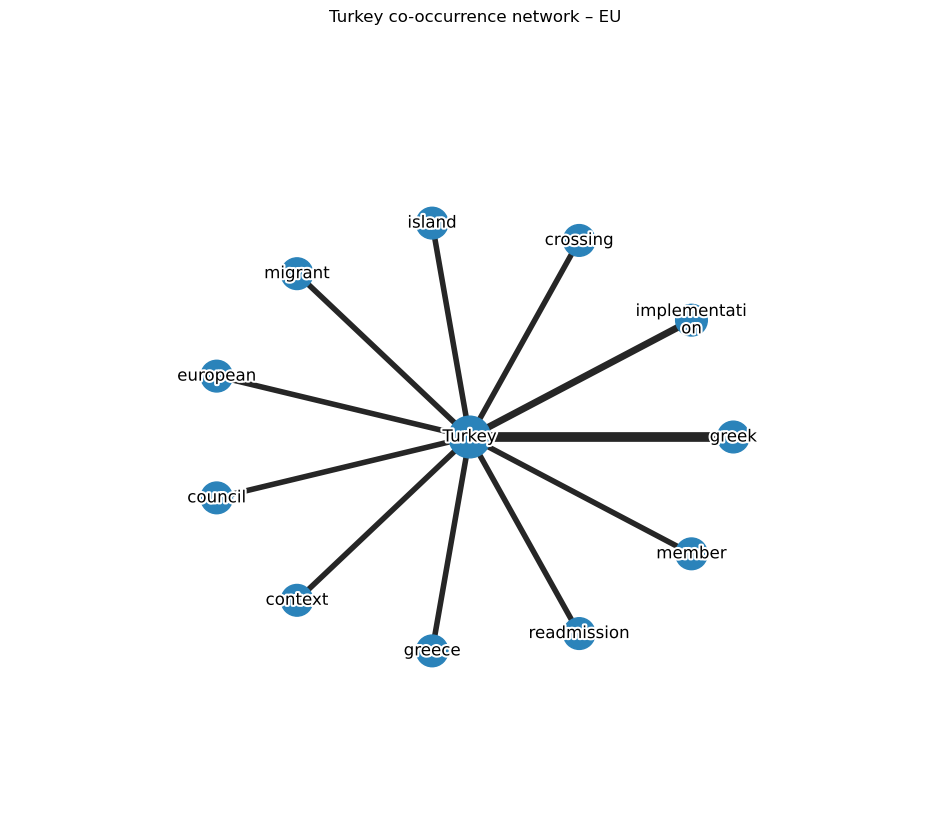

Saved C:\Users\gurde\figs\cooccurrence_EU.png
Saved C:\Users\gurde\figs\cooccurrence_EU.svg
[skip] Turkey co-occurrence network – G20: nothing to plot.


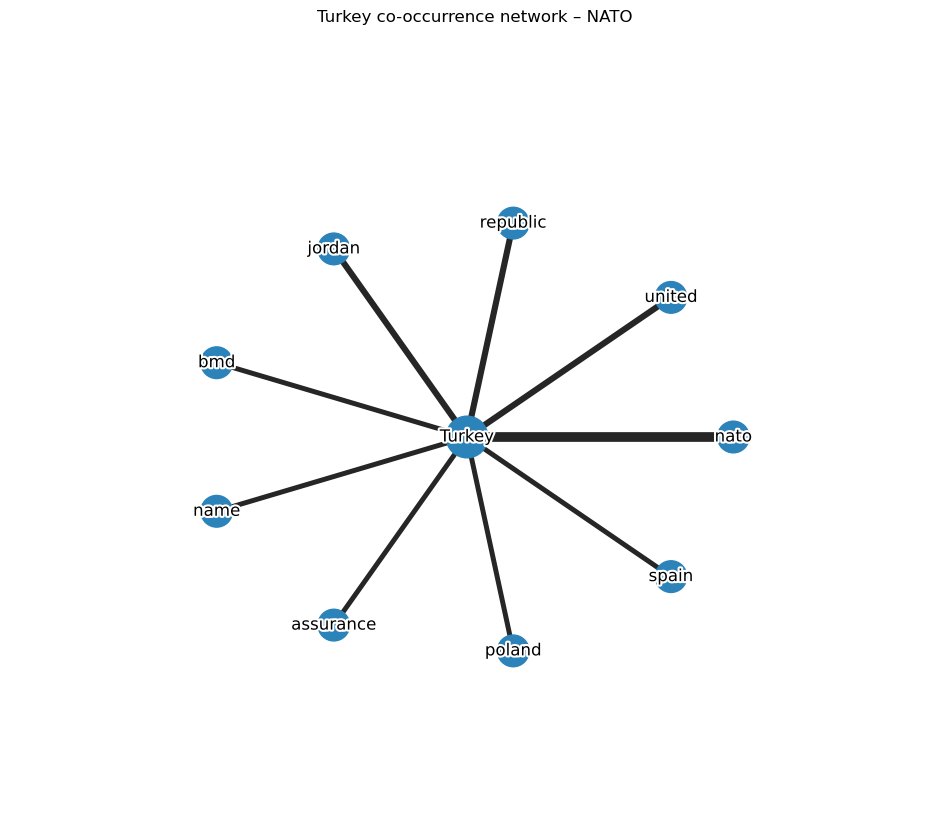

Saved C:\Users\gurde\figs\cooccurrence_NATO.png
Saved C:\Users\gurde\figs\cooccurrence_NATO.svg


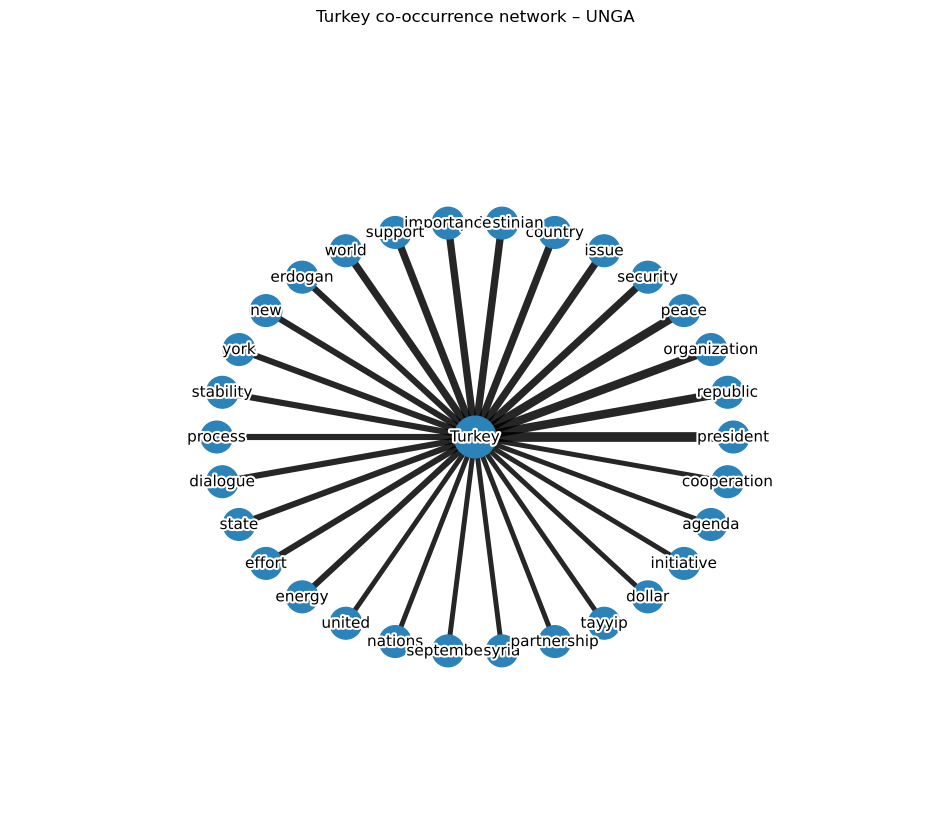

Saved C:\Users\gurde\figs\cooccurrence_UNGA.png
Saved C:\Users\gurde\figs\cooccurrence_UNGA.svg
Saved: figs/cooccurrence_*.png + .svg, framing_overall.csv, framing_by_arena.csv

=== Overall framing (top rows) ===


word  count
0       republic     10
1       security      8
2         united      7
3        support      7
4          state      7
5      president      7
6           nato      7
7         effort      6
8       european      6
9   organization      6
10       country      6
11         peace      6
12           new      6
13         greek      6
14         issue      5


=== Framing by arena (top rows) ===


word  count arena
0             greek      6    EU
1    implementation      4    EU
2       readmission      3    EU
3          crossing      3    EU
4            island      3    EU
5           context      3    EU
6           council      3    EU
7          european      3    EU
8            member      3    EU
9            greece      3    EU
40        agreement      2   G20
41         istanbul      2   G20
42      development      1   G20
43          enhance      1   G20
44           effort      1   G20
45        situation      1   G20
46       assessment      1   G20
47             july      1   G20
48          welcome      1   G20
49        nutrition      1   G20
58             nato      7  NATO
59         republic      4  NATO
60           jordan      4  NATO
61           united      4  NATO
62           poland      3  NATO
63             name      3  NATO
64            spain      3  NATO
65        assurance      3  NATO
66              bmd      3  NATO
67           threat      2  NATO
98        president      7  UNGA
99         republic      6  UNGA
100           peace      6  UNGA
101    organization      6  UNGA
102      importance      5  UNGA
103        security      5  UNGA
104         support      5  UNGA
105     palestinian      5  UNGA
106           world      5  UNGA
107         country      5  UNGA

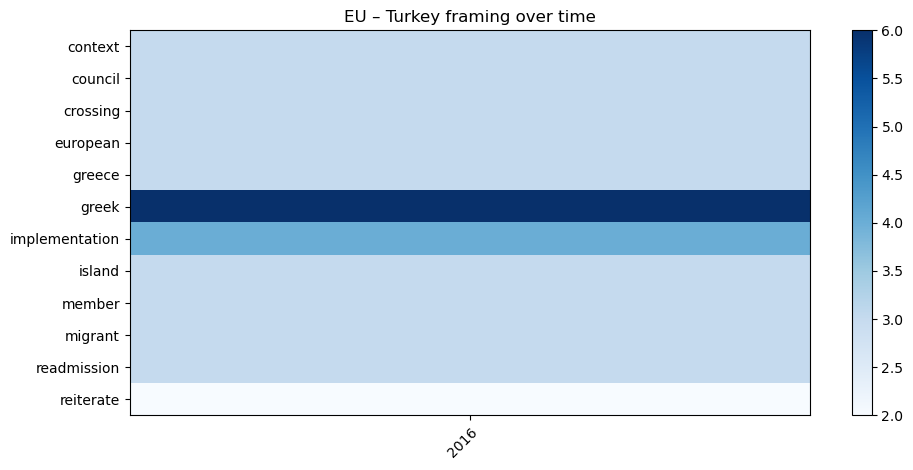

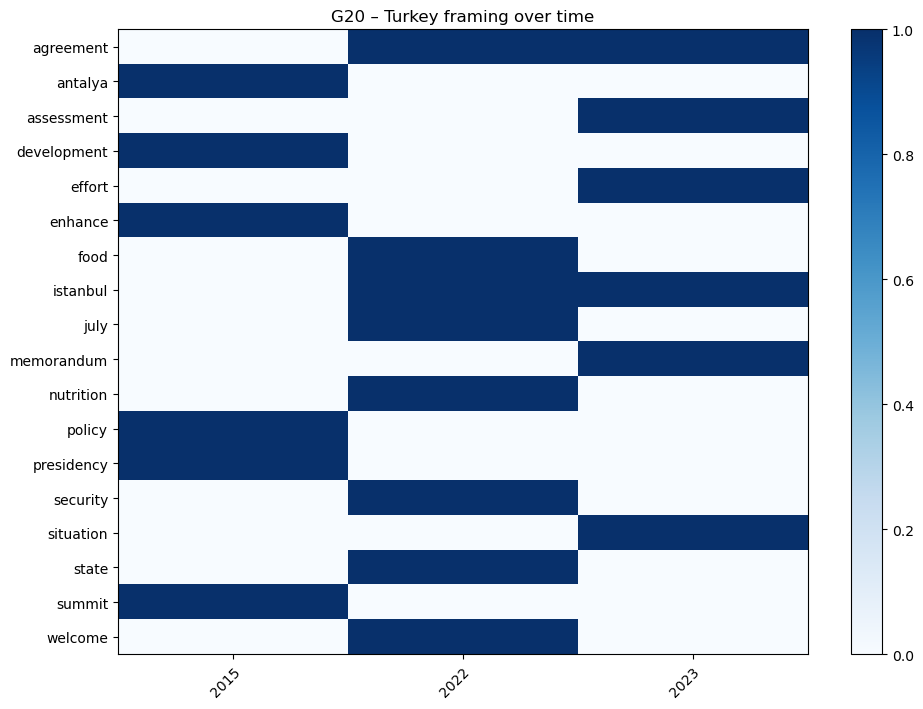

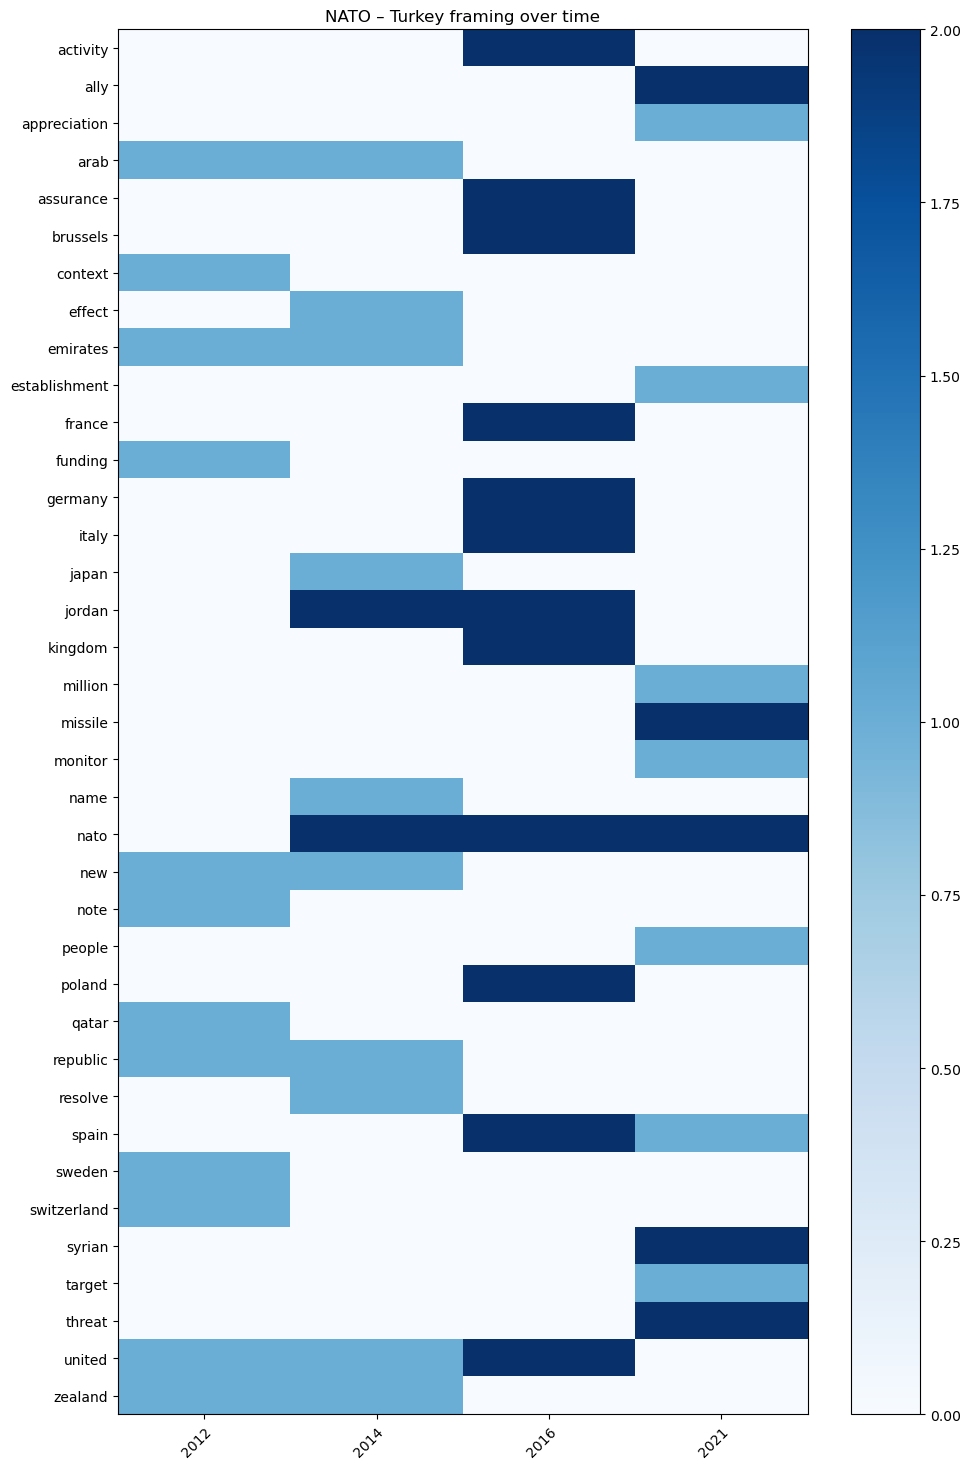

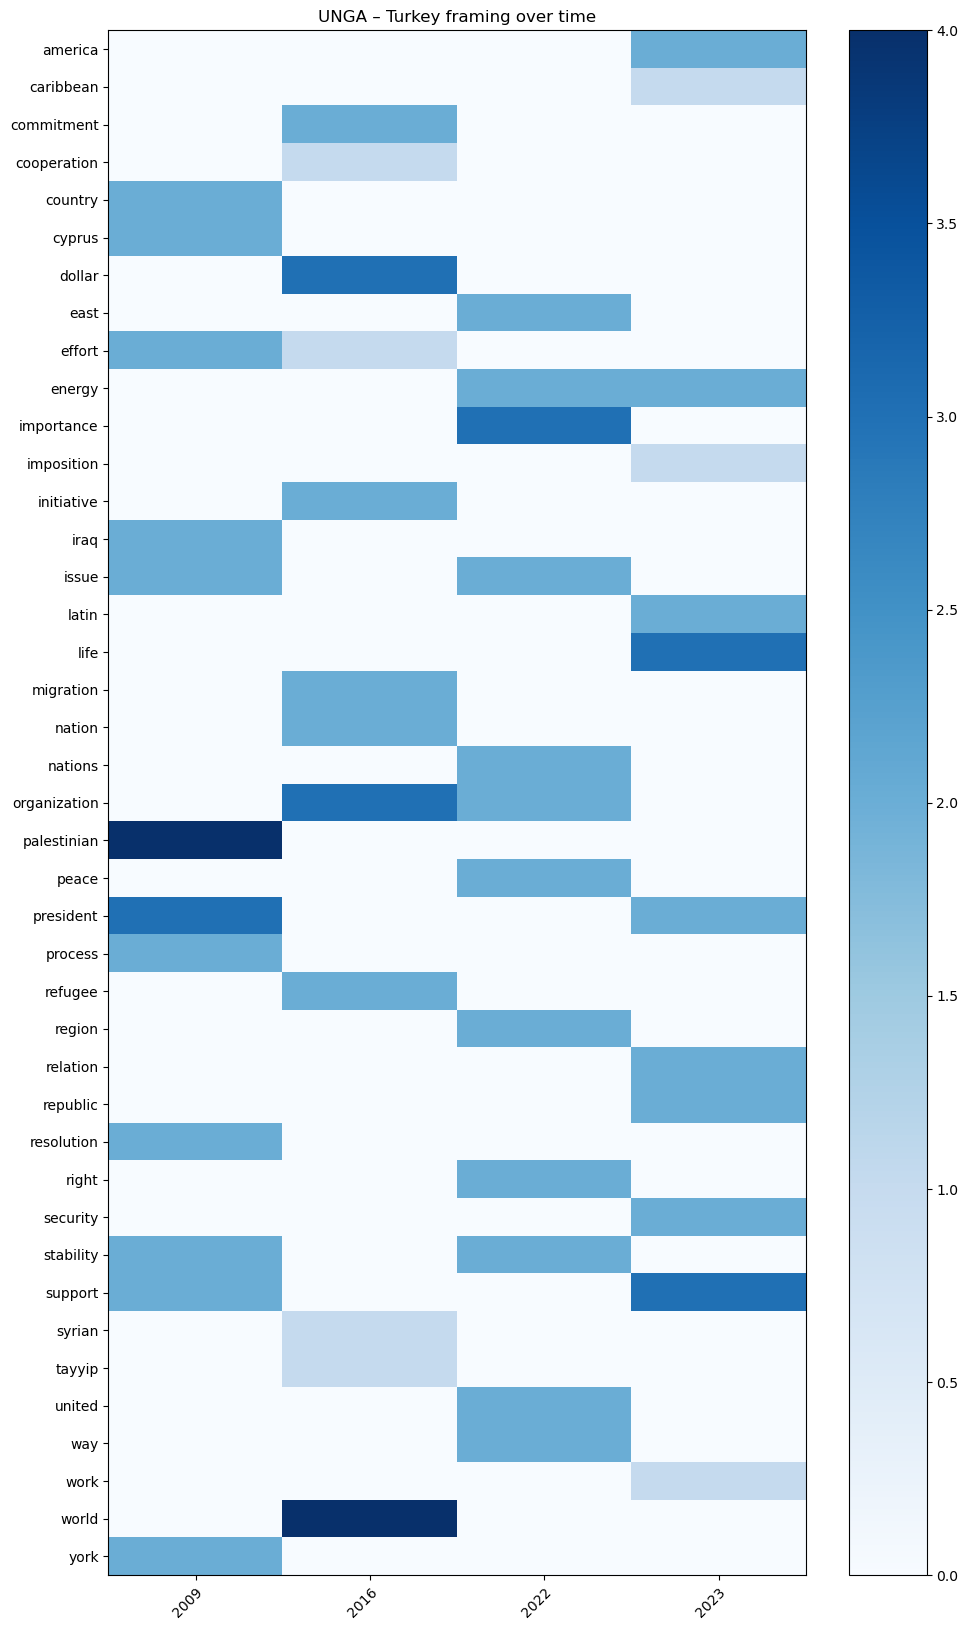

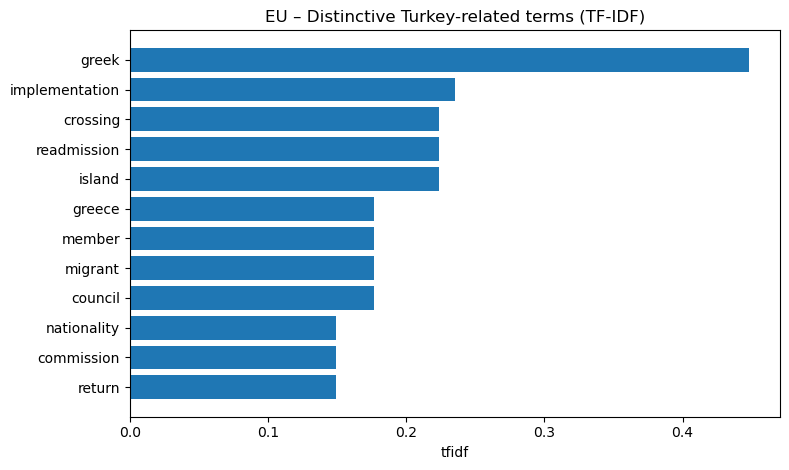

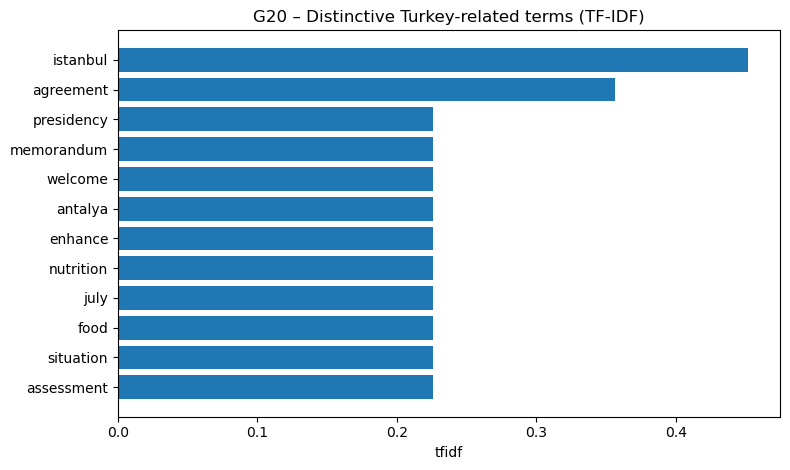

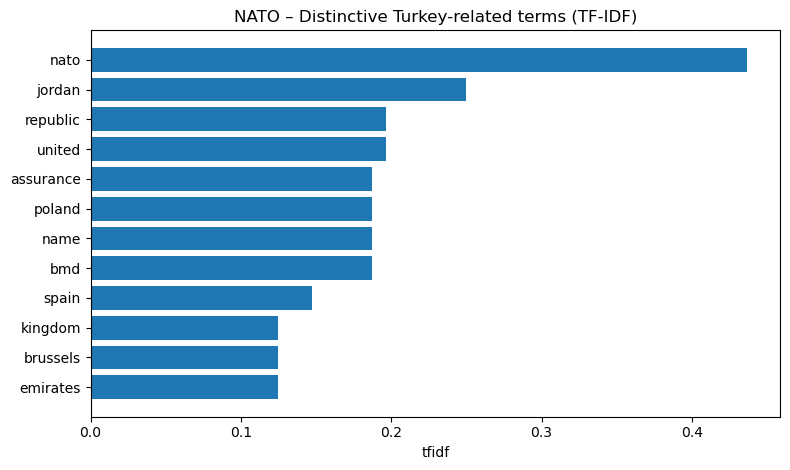

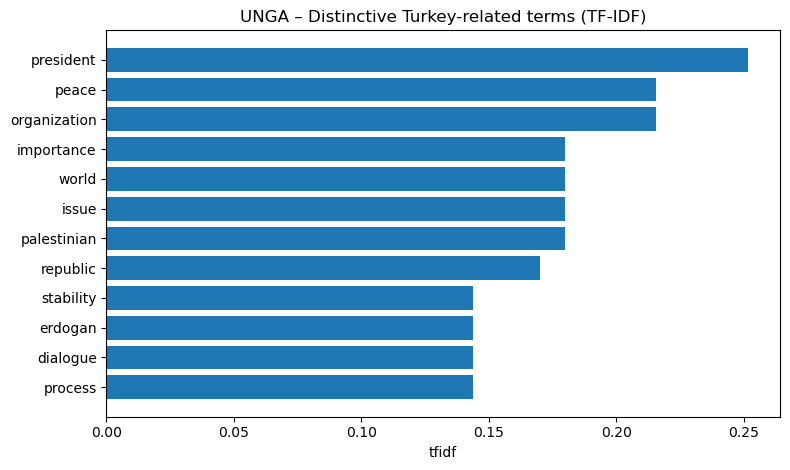

In [23]:
# === Turkey co-occurrence + framing analysis (exclude unwanted terms) ===
# Assumes you already ran Block A and have `docs_clean` or `docs` in memory.

import re
from pathlib import Path
from collections import Counter, defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
import matplotlib.patheffects as pe  # for text halo

# Optional (for TF-IDF distinctive terms)
from sklearn.feature_extraction.text import TfidfVectorizer

# spaCy (NER/POS optional; safe if already loaded elsewhere)
import spacy
try:
    nlp  # noqa: F821
except NameError:
    nlp = spacy.load("en_core_web_sm")

# ---------------------------
# 0) pick corpus
# ---------------------------
if 'docs_clean' in globals() and isinstance(docs_clean, pd.DataFrame) and not docs_clean.empty:
    use_df = docs_clean.copy()
else:
    use_df = docs.copy()
assert 'text' in use_df.columns, "Expected a 'text' column in docs/docs_clean."

for col in ['arena','year','filename']:
    if col not in use_df.columns:
        use_df[col] = None

# ---------------------------
# 1) tokenization helpers
# ---------------------------
TURKEY_PAT = re.compile(r"\b(turkey|türkiye|turkiye)\b", re.IGNORECASE)
WORD_PAT   = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ']+")

BASIC_STOPS = {
    'the','and','of','to','in','for','on','at','by','with','from','as','that','this','these','those',
    'we','our','their','its','it','is','are','was','were','be','been','being','an','a','or','not','no',
    'will','shall','should','can','could','would','may','might','one','two','three','four','five','within',
    'into','across','over','under','up','down','about','between','among','per','such','including','include'
}

# --- Terms to always exclude from ALL analysis ---
EXCLUDE_TERMS = {"macedonia", "statement"}

def normalize_token(tok: str) -> str:
    t = tok.strip("’'`´").lower()
    t = t.replace("–","-").replace("—","-")
    return t

def tokenize(text: str):
    if not isinstance(text, str):
        return []
    return [normalize_token(t) for t in WORD_PAT.findall(text)]

def is_target(tok: str) -> bool:
    return bool(TURKEY_PAT.fullmatch(tok))

# ---------------------------
# 2) concordance windows around Turkey
# ---------------------------
def concordance_windows(text: str, window: int = 10, pos_filter: bool = False):
    """
    Collect words within +/- window tokens of each 'Turkey' mention.
    If pos_filter=True, keeps only NOUN/PROPN plus spaCy entities (ORG/GPE/etc.).
    """
    toks = tokenize(text)
    hits = [i for i, t in enumerate(toks) if is_target(t)]
    bag = []
    for i in hits:
        lo = max(0, i - window)
        hi = min(len(toks), i + window + 1)
        for w in toks[lo:hi]:
            if is_target(w):
                continue
            if len(w) <= 2:
                continue
            if w in BASIC_STOPS:
                continue
            if w in EXCLUDE_TERMS:
                continue
            bag.append(w)

    if not pos_filter or not bag:
        return bag

    # Lightweight POS/NER filtering
    doc = nlp(" ".join(bag))
    keep = []
    for tok in doc:
        if tok.text.lower() in EXCLUDE_TERMS:
            continue
        elif tok.ent_type_ in {"ORG", "GPE", "LOC", "NORP", "EVENT", "FAC"}:
            keep.append(tok.text.lower())
        elif tok.pos_ in {"NOUN", "PROPN"}:
            keep.append(tok.lemma_.lower())
    return keep

# ---------------------------
# 3) co-occurrence counts by arena
# ---------------------------
def cooccur_counts(df, window=10, topn=30, pos_filter=True):
    arena_counts = {}
    for arena, dfA in df.groupby('arena'):
        bag = []
        for t in dfA['text']:
            bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
        cnt = Counter(bag)
        arena_counts[arena] = cnt.most_common(topn)
    return arena_counts

# ---------------------------
# 4) plotting (readable labels)
# ---------------------------
def _wrap_label(s, width=12):
    if width is None or len(s) <= width:
        return s
    return "\n".join(textwrap.wrap(s, width=width))

def _dynamic_font_size(n_nodes: int) -> int:
    if n_nodes <= 24:   return 12
    if n_nodes <= 36:   return 11
    if n_nodes <= 48:   return 10
    if n_nodes <= 64:   return 9
    return 8

def _draw_star_graph(counts, center="Turkey", min_count=3):
    items = [(w, c) for w, c in counts if c >= min_count]
    if not items:
        return None
    G = nx.Graph()
    G.add_node(center)
    maxc = max(c for _, c in items)
    for w, c in items:
        G.add_node(w)
        G.add_edge(center, w, weight=c, width=1 + 6 * (c / maxc))
    return G

def _radial_layout(G, center="Turkey", radius=1.0):
    nodes = [n for n in G.nodes() if str(n).lower() != center.lower()]
    n = len(nodes)
    pos = {center: np.array([0.0, 0.0])}
    if n == 0:
        return pos
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    for node, ang in zip(nodes, angles):
        pos[node] = np.array([radius*np.cos(ang), radius*np.sin(ang)])
    return pos

def plot_cooccurrence_network(G, title, outpath, label_width=12):
    if G is None or G.number_of_nodes() == 0:
        print(f"[skip] {title}: nothing to plot.")
        return

    pos = _radial_layout(G, center="Turkey", radius=1.0)

    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_axis_off()
    ax.set_title(title, pad=22)

    node_sizes = [900 if str(n).lower() == "turkey" else 520 for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="#2b83ba", ax=ax)

    widths = [G[u][v].get("width", 2.0) for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=widths, edge_color="black", alpha=0.85, ax=ax)

    labels = {n: _wrap_label(str(n), width=label_width) for n in G.nodes()}
    fs = _dynamic_font_size(G.number_of_nodes())
    nx.draw_networkx_labels(
        G, pos, labels=labels, font_size=fs, font_weight="regular",
        verticalalignment="center", horizontalalignment="center",
        clip_on=False, ax=ax,
        bbox=dict(facecolor=(1,1,1,0.0), edgecolor='none', pad=0.0)
    )

    for textobj in ax.texts:
        textobj.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])

    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]
    xmin, xmax = min(xs), max(xs)
    ymin, ymax = min(ys), max(ys)
    xpad = max((xmax - xmin) * 0.40, 0.25)
    ypad = max((ymax - ymin) * 0.40, 0.25)
    ax.set_xlim(xmin - xpad, xmax + xpad)
    ax.set_ylim(ymin - ypad, ymax + ypad)

    outpath = Path(outpath)
    outpath.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(outpath.with_suffix(".png"), dpi=300, bbox_inches="tight")
    fig.savefig(outpath.with_suffix(".svg"), bbox_inches="tight")
    plt.show()
    print(f"Saved {outpath.with_suffix('.png').resolve()}")
    print(f"Saved {outpath.with_suffix('.svg').resolve()}")

# ---------------------------
# 5) framing tables
# ---------------------------
def framing_table(df, window=10, topn=40, pos_filter=True):
    bag = []
    for t in df["text"]:
        bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
    cnt = pd.Series(bag).value_counts().head(topn)
    out = cnt.reset_index()
    out.columns = ["word", "count"]
    return out

# ---------------------------
# 6) run analysis
# ---------------------------
default_topn = 30
extra_top_words_for = {"EU": 8, "NATO": 8}
co_dict = {}
for arena, dfA in use_df.groupby('arena'):
    topn = default_topn + extra_top_words_for.get(str(arena), 0)
    counts_map = cooccur_counts(dfA, window=10, topn=topn, pos_filter=True)
    counts = counts_map.get(arena, [])
    co_dict[arena] = counts
    G = _draw_star_graph(counts, center="Turkey", min_count=3)
    plot_cooccurrence_network(
        G,
        title=f"Turkey co-occurrence network – {arena}",
        outpath=f"figs/cooccurrence_{arena}",
        label_width=12
    )

# ---------------------------
# 7) framing tables (overall + per arena)
# ---------------------------
overall_framing = framing_table(use_df, window=10, topn=60, pos_filter=True)
overall_framing.to_csv("framing_overall.csv", index=False)

per_arena_rows = []
for arena, dfA in use_df.groupby('arena'):
    ft = framing_table(dfA, window=10, topn=40, pos_filter=True)
    ft['arena'] = arena
    per_arena_rows.append(ft)

framing_per_arena = (
    pd.concat(per_arena_rows, ignore_index=True)
    if per_arena_rows else pd.DataFrame(columns=["word","count","arena"])
)
framing_per_arena.to_csv("framing_by_arena.csv", index=False)

print("Saved: figs/cooccurrence_*.png + .svg, framing_overall.csv, framing_by_arena.csv")

print("\n=== Overall framing (top rows) ===")
display(overall_framing.head(15))

print("\n=== Framing by arena (top rows) ===")
display(framing_per_arena.groupby('arena').head(10))

# ---------------------------
# 8) EXTRA: Yearly heatmaps of top Turkey-adjacent terms per arena
# ---------------------------
def top_terms_by_arena_year(df, window=10, top_per_arena=12, pos_filter=True):
    rows = []
    for (arena, year), dfG in df.groupby(['arena','year']):
        bag = []
        for t in dfG['text']:
            bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
        if not bag:
            continue
        s = pd.Series(bag).value_counts().head(top_per_arena)
        for w, c in s.items():
            rows.append({'arena':arena, 'year':year, 'word':w, 'count':c})
    return pd.DataFrame(rows)

heat_df = top_terms_by_arena_year(use_df, window=10, top_per_arena=12, pos_filter=True)

for arena, dfA in heat_df.groupby('arena'):
    if dfA.empty:
        continue
    pivot = dfA.pivot_table(index='word', columns='year', values='count', fill_value=0, aggfunc='sum')
    fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(pivot))))
    im = ax.imshow(pivot.values, aspect='auto', cmap='Blues')
    ax.set_yticks(np.arange(pivot.shape[0]), labels=list(pivot.index))
    ax.set_xticks(np.arange(pivot.shape[1]), labels=list(pivot.columns))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(f"{arena} – Turkey framing over time")
    fig.colorbar(im, ax=ax)
    fig.tight_layout()
    plt.show()

# ---------------------------
# 9) EXTRA: Distinctive Turkey-related terms per arena (TF-IDF)
# ---------------------------
def arena_tfidf(df, window=10, pos_filter=True, topn=12):
    texts = []
    labels = []
    for arena, dfA in df.groupby('arena'):
        bag = []
        for t in dfA['text']:
            bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
        if not bag:
            continue
        texts.append(" ".join(bag))
        labels.append(arena)
    if not texts:
        return {}
    vec = TfidfVectorizer(min_df=1)
    X = vec.fit_transform(texts)
    feats = np.array(vec.get_feature_names_out())
    out = {}
    for i, arena in enumerate(labels):
        row = X[i].toarray().ravel()
        idx = np.argsort(row)[::-1][:topn]
        out[arena] = pd.DataFrame({'word': feats[idx], 'tfidf': row[idx]})
    return out

tfidf_by_arena = arena_tfidf(use_df, window=10, pos_filter=True, topn=12)
for arena, dfT in tfidf_by_arena.items():
    if dfT.empty:
        continue
    dfT = dfT.sort_values('tfidf')
    fig, ax = plt.subplots(figsize=(8, max(4, 0.4*len(dfT))))
    ax.barh(dfT['word'], dfT['tfidf'])
    ax.set_title(f"{arena} – Distinctive Turkey-related terms (TF-IDF)")
    ax.set_xlabel("tfidf")
    fig.tight_layout()
    plt.show()


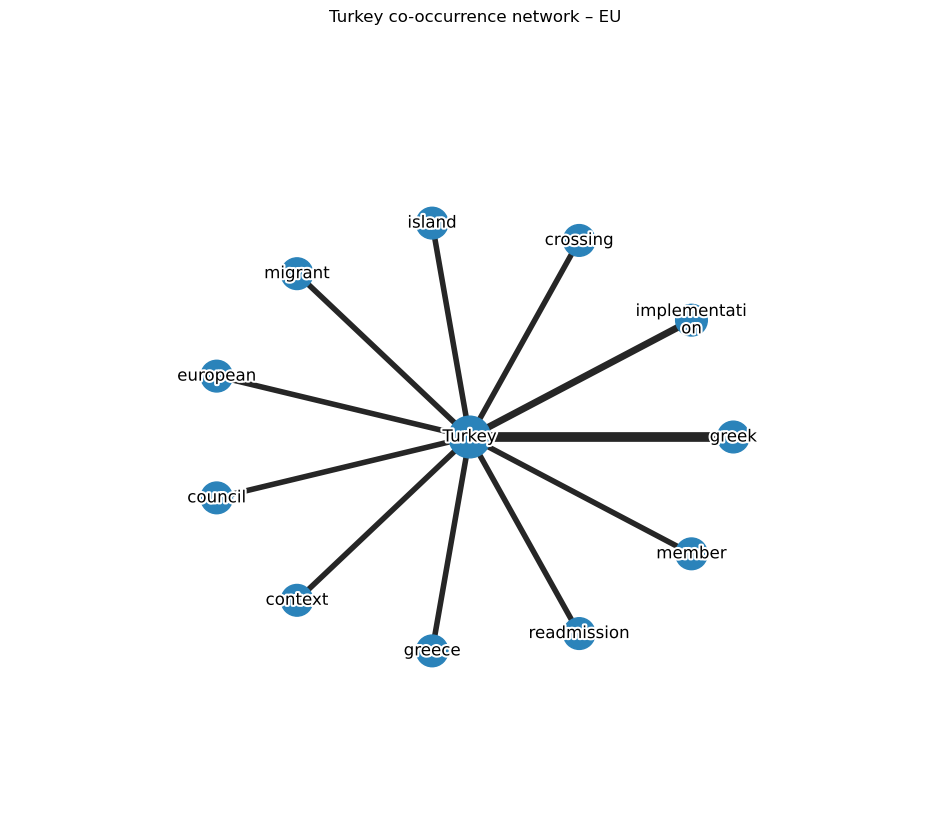

Saved C:\Users\gurde\figs\cooccurrence_EU.png
Saved C:\Users\gurde\figs\cooccurrence_EU.svg
[skip] Turkey co-occurrence network – G20: nothing to plot.


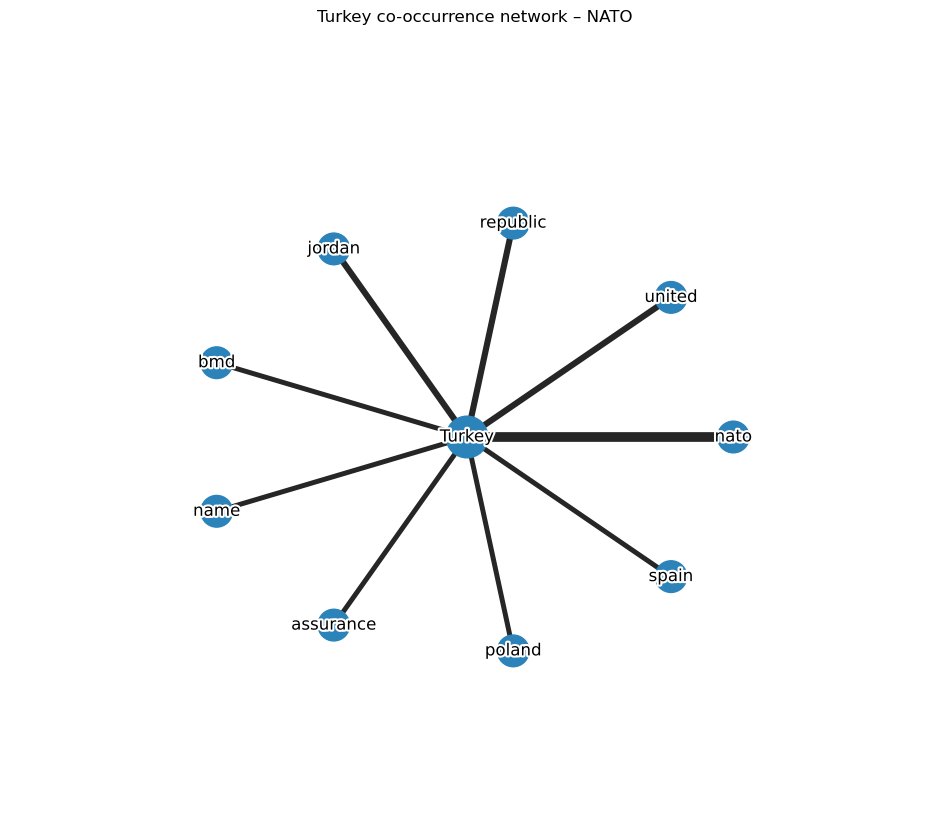

Saved C:\Users\gurde\figs\cooccurrence_NATO.png
Saved C:\Users\gurde\figs\cooccurrence_NATO.svg


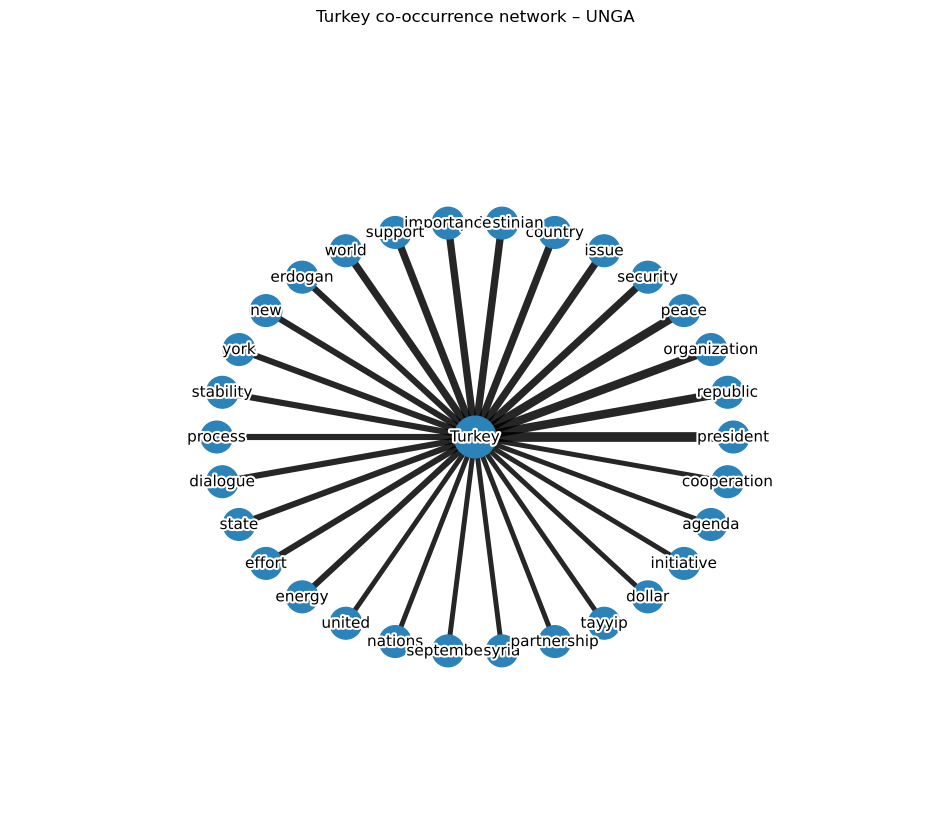

Saved C:\Users\gurde\figs\cooccurrence_UNGA.png
Saved C:\Users\gurde\figs\cooccurrence_UNGA.svg
Saved: figs/cooccurrence_*.png + .svg, framing_overall.csv, framing_by_arena.csv

=== Overall framing (top rows) ===


word  count
0       republic     10
1       security      8
2         united      7
3        support      7
4          state      7
5      president      7
6           nato      7
7         effort      6
8       european      6
9   organization      6
10       country      6
11         peace      6
12           new      6
13         greek      6
14         issue      5


=== Framing by arena (top rows) ===


word  count arena
0             greek      6    EU
1    implementation      4    EU
2       readmission      3    EU
3          crossing      3    EU
4            island      3    EU
5           context      3    EU
6           council      3    EU
7          european      3    EU
8            member      3    EU
9            greece      3    EU
40        agreement      2   G20
41         istanbul      2   G20
42      development      1   G20
43          enhance      1   G20
44           effort      1   G20
45        situation      1   G20
46       assessment      1   G20
47             july      1   G20
48          welcome      1   G20
49        nutrition      1   G20
58             nato      7  NATO
59         republic      4  NATO
60           jordan      4  NATO
61           united      4  NATO
62           poland      3  NATO
63             name      3  NATO
64            spain      3  NATO
65        assurance      3  NATO
66              bmd      3  NATO
67           threat      2  NATO
98        president      7  UNGA
99         republic      6  UNGA
100           peace      6  UNGA
101    organization      6  UNGA
102      importance      5  UNGA
103        security      5  UNGA
104         support      5  UNGA
105     palestinian      5  UNGA
106           world      5  UNGA
107         country      5  UNGA

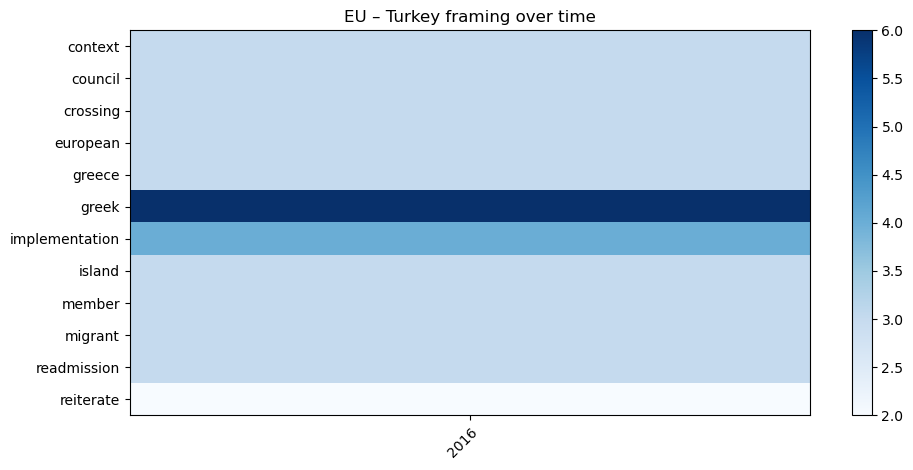

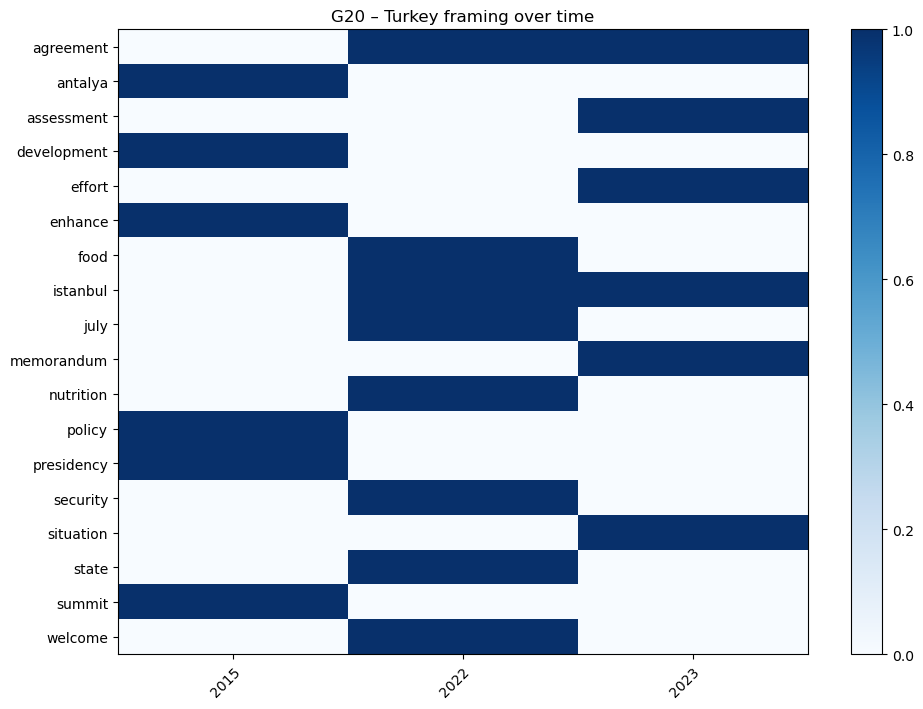

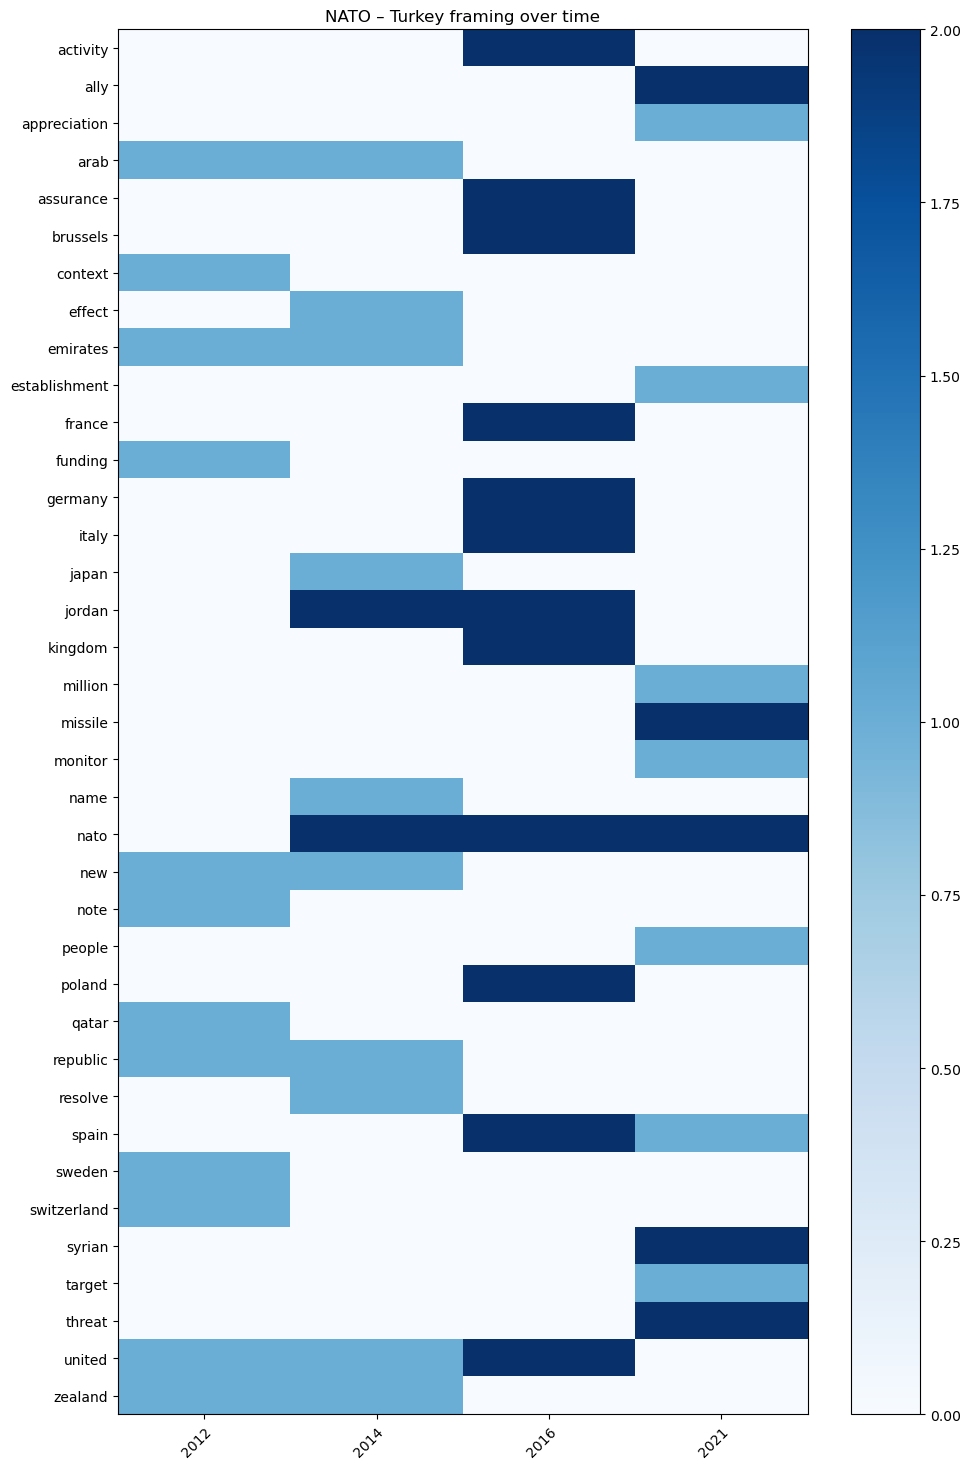

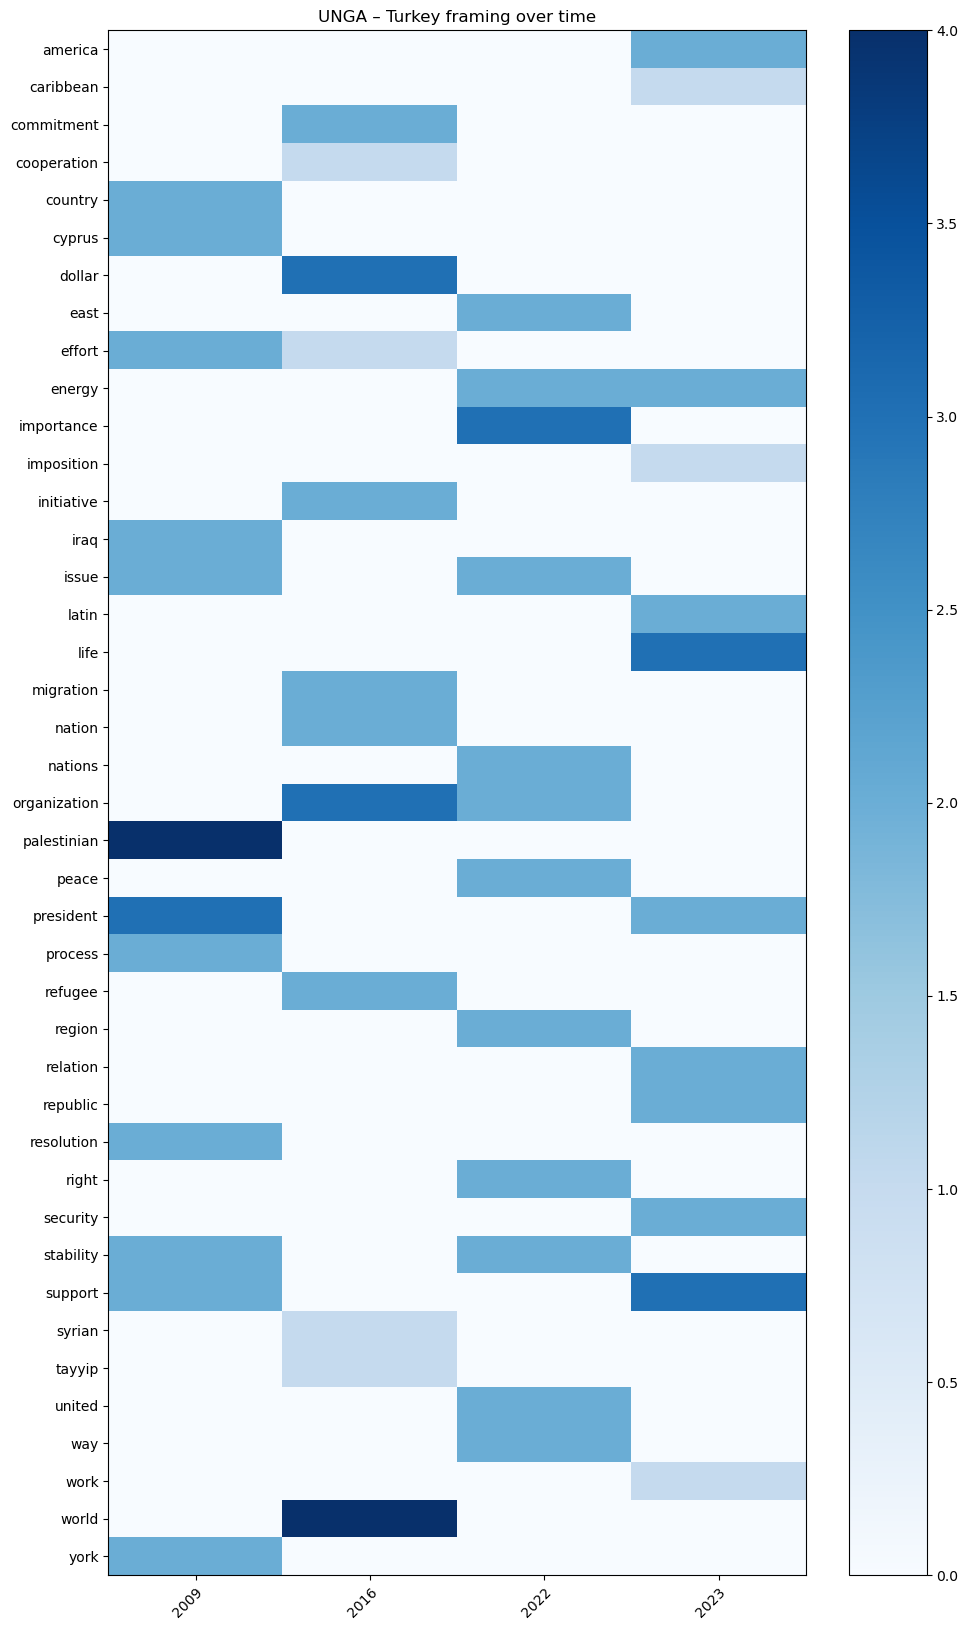

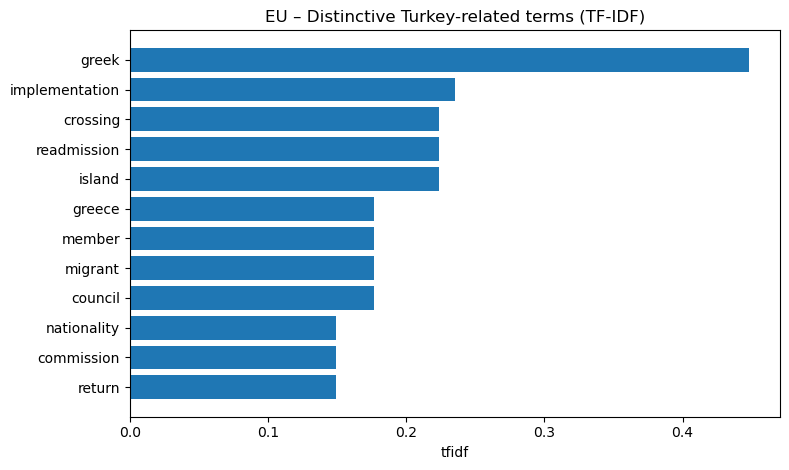

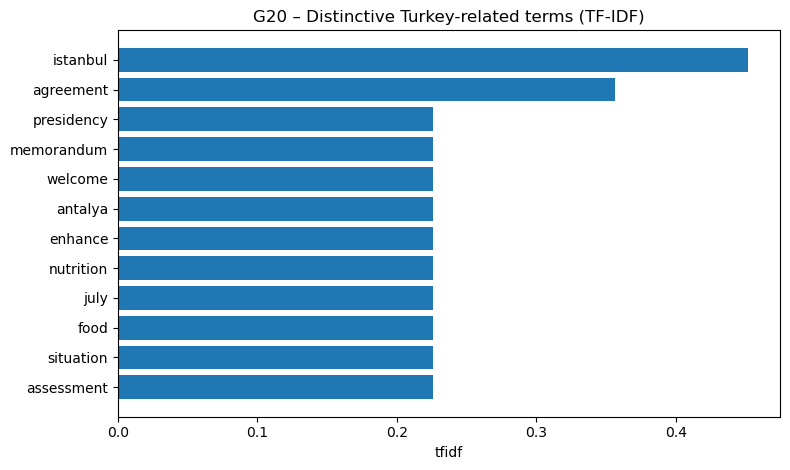

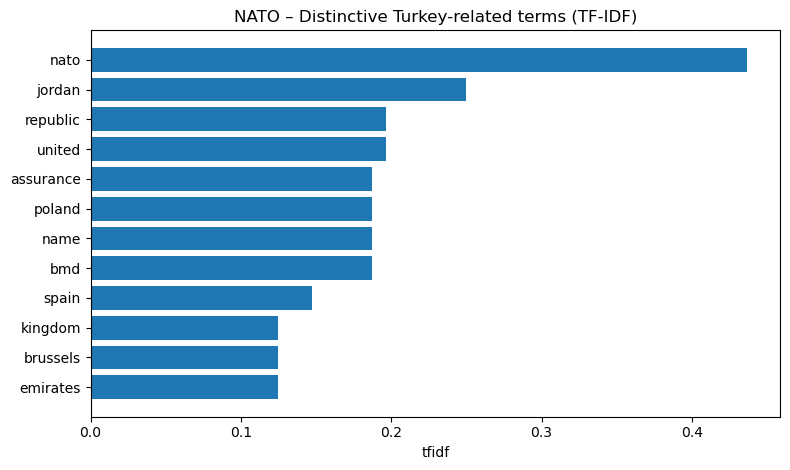

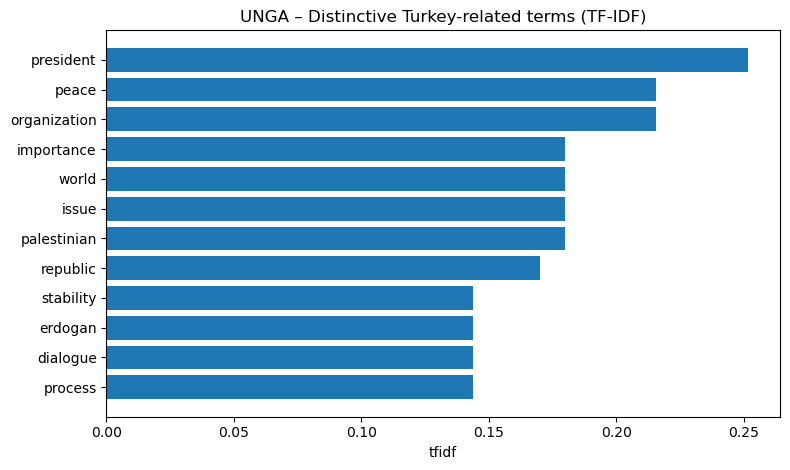

In [24]:
# === Turkey co-occurrence + framing analysis (exclude unwanted terms) ===
# Assumes you already ran Block A and have `docs_clean` or `docs` in memory.

import re
from pathlib import Path
from collections import Counter, defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
import matplotlib.patheffects as pe  # for text halo

# Optional (for TF-IDF distinctive terms)
from sklearn.feature_extraction.text import TfidfVectorizer

# spaCy (NER/POS optional; safe if already loaded elsewhere)
import spacy
try:
    nlp  # noqa: F821
except NameError:
    nlp = spacy.load("en_core_web_sm")

# ---------------------------
# 0) pick corpus
# ---------------------------
if 'docs_clean' in globals() and isinstance(docs_clean, pd.DataFrame) and not docs_clean.empty:
    use_df = docs_clean.copy()
else:
    use_df = docs.copy()
assert 'text' in use_df.columns, "Expected a 'text' column in docs/docs_clean."

for col in ['arena','year','filename']:
    if col not in use_df.columns:
        use_df[col] = None

# ---------------------------
# 1) tokenization helpers
# ---------------------------
TURKEY_PAT = re.compile(r"\b(turkey|türkiye|turkiye)\b", re.IGNORECASE)
WORD_PAT   = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ']+")

BASIC_STOPS = {
    'the','and','of','to','in','for','on','at','by','with','from','as','that','this','these','those',
    'we','our','their','its','it','is','are','was','were','be','been','being','an','a','or','not','no',
    'will','shall','should','can','could','would','may','might','one','two','three','four','five','within',
    'into','across','over','under','up','down','about','between','among','per','such','including','include'
}

# --- Terms to always exclude from ALL analysis ---
EXCLUDE_TERMS = {"macedonia", "statement"}

def normalize_token(tok: str) -> str:
    t = tok.strip("’'`´").lower()
    t = t.replace("–","-").replace("—","-")
    return t

def tokenize(text: str):
    if not isinstance(text, str):
        return []
    return [normalize_token(t) for t in WORD_PAT.findall(text)]

def is_target(tok: str) -> bool:
    return bool(TURKEY_PAT.fullmatch(tok))

# ---------------------------
# 2) concordance windows around Turkey
# ---------------------------
def concordance_windows(text: str, window: int = 10, pos_filter: bool = False):
    """
    Collect words within +/- window tokens of each 'Turkey' mention.
    If pos_filter=True, keeps only NOUN/PROPN plus spaCy entities (ORG/GPE/etc.).
    """
    toks = tokenize(text)
    hits = [i for i, t in enumerate(toks) if is_target(t)]
    bag = []
    for i in hits:
        lo = max(0, i - window)
        hi = min(len(toks), i + window + 1)
        for w in toks[lo:hi]:
            if is_target(w):
                continue
            if len(w) <= 2:
                continue
            if w in BASIC_STOPS:
                continue
            if w in EXCLUDE_TERMS:
                continue
            bag.append(w)

    if not pos_filter or not bag:
        return bag

    # Lightweight POS/NER filtering
    doc = nlp(" ".join(bag))
    keep = []
    for tok in doc:
        if tok.text.lower() in EXCLUDE_TERMS:
            continue
        elif tok.ent_type_ in {"ORG", "GPE", "LOC", "NORP", "EVENT", "FAC"}:
            keep.append(tok.text.lower())
        elif tok.pos_ in {"NOUN", "PROPN"}:
            keep.append(tok.lemma_.lower())
    return keep

# ---------------------------
# 3) co-occurrence counts by arena
# ---------------------------
def cooccur_counts(df, window=10, topn=30, pos_filter=True):
    arena_counts = {}
    for arena, dfA in df.groupby('arena'):
        bag = []
        for t in dfA['text']:
            bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
        cnt = Counter(bag)
        arena_counts[arena] = cnt.most_common(topn)
    return arena_counts

# ---------------------------
# 4) plotting (readable labels)
# ---------------------------
def _wrap_label(s, width=12):
    if width is None or len(s) <= width:
        return s
    return "\n".join(textwrap.wrap(s, width=width))

def _dynamic_font_size(n_nodes: int) -> int:
    if n_nodes <= 24:   return 12
    if n_nodes <= 36:   return 11
    if n_nodes <= 48:   return 10
    if n_nodes <= 64:   return 9
    return 8

def _draw_star_graph(counts, center="Turkey", min_count=3):
    items = [(w, c) for w, c in counts if c >= min_count]
    if not items:
        return None
    G = nx.Graph()
    G.add_node(center)
    maxc = max(c for _, c in items)
    for w, c in items:
        G.add_node(w)
        G.add_edge(center, w, weight=c, width=1 + 6 * (c / maxc))
    return G

def _radial_layout(G, center="Turkey", radius=1.0):
    nodes = [n for n in G.nodes() if str(n).lower() != center.lower()]
    n = len(nodes)
    pos = {center: np.array([0.0, 0.0])}
    if n == 0:
        return pos
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    for node, ang in zip(nodes, angles):
        pos[node] = np.array([radius*np.cos(ang), radius*np.sin(ang)])
    return pos

def plot_cooccurrence_network(G, title, outpath, label_width=12):
    if G is None or G.number_of_nodes() == 0:
        print(f"[skip] {title}: nothing to plot.")
        return

    pos = _radial_layout(G, center="Turkey", radius=1.0)

    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_axis_off()
    ax.set_title(title, pad=22)

    node_sizes = [900 if str(n).lower() == "turkey" else 520 for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="#2b83ba", ax=ax)

    widths = [G[u][v].get("width", 2.0) for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=widths, edge_color="black", alpha=0.85, ax=ax)

    labels = {n: _wrap_label(str(n), width=label_width) for n in G.nodes()}
    fs = _dynamic_font_size(G.number_of_nodes())
    nx.draw_networkx_labels(
        G, pos, labels=labels, font_size=fs, font_weight="regular",
        verticalalignment="center", horizontalalignment="center",
        clip_on=False, ax=ax,
        bbox=dict(facecolor=(1,1,1,0.0), edgecolor='none', pad=0.0)
    )

    for textobj in ax.texts:
        textobj.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])

    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]
    xmin, xmax = min(xs), max(xs)
    ymin, ymax = min(ys), max(ys)
    xpad = max((xmax - xmin) * 0.40, 0.25)
    ypad = max((ymax - ymin) * 0.40, 0.25)
    ax.set_xlim(xmin - xpad, xmax + xpad)
    ax.set_ylim(ymin - ypad, ymax + ypad)

    outpath = Path(outpath)
    outpath.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(outpath.with_suffix(".png"), dpi=300, bbox_inches="tight")
    fig.savefig(outpath.with_suffix(".svg"), bbox_inches="tight")
    plt.show()
    print(f"Saved {outpath.with_suffix('.png').resolve()}")
    print(f"Saved {outpath.with_suffix('.svg').resolve()}")

# ---------------------------
# 5) framing tables
# ---------------------------
def framing_table(df, window=10, topn=40, pos_filter=True):
    bag = []
    for t in df["text"]:
        bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
    cnt = pd.Series(bag).value_counts().head(topn)
    out = cnt.reset_index()
    out.columns = ["word", "count"]
    return out

# ---------------------------
# 6) run analysis
# ---------------------------
default_topn = 30
extra_top_words_for = {"EU": 8, "NATO": 8}
co_dict = {}
for arena, dfA in use_df.groupby('arena'):
    topn = default_topn + extra_top_words_for.get(str(arena), 0)
    counts_map = cooccur_counts(dfA, window=10, topn=topn, pos_filter=True)
    counts = counts_map.get(arena, [])
    co_dict[arena] = counts
    G = _draw_star_graph(counts, center="Turkey", min_count=3)
    plot_cooccurrence_network(
        G,
        title=f"Turkey co-occurrence network – {arena}",
        outpath=f"figs/cooccurrence_{arena}",
        label_width=12
    )

# ---------------------------
# 7) framing tables (overall + per arena)
# ---------------------------
overall_framing = framing_table(use_df, window=10, topn=60, pos_filter=True)
overall_framing.to_csv("framing_overall.csv", index=False)

per_arena_rows = []
for arena, dfA in use_df.groupby('arena'):
    ft = framing_table(dfA, window=10, topn=40, pos_filter=True)
    ft['arena'] = arena
    per_arena_rows.append(ft)

framing_per_arena = (
    pd.concat(per_arena_rows, ignore_index=True)
    if per_arena_rows else pd.DataFrame(columns=["word","count","arena"])
)
framing_per_arena.to_csv("framing_by_arena.csv", index=False)

print("Saved: figs/cooccurrence_*.png + .svg, framing_overall.csv, framing_by_arena.csv")

print("\n=== Overall framing (top rows) ===")
display(overall_framing.head(15))

print("\n=== Framing by arena (top rows) ===")
display(framing_per_arena.groupby('arena').head(10))

# ---------------------------
# 8) EXTRA: Yearly heatmaps of top Turkey-adjacent terms per arena
# ---------------------------
def top_terms_by_arena_year(df, window=10, top_per_arena=12, pos_filter=True):
    rows = []
    for (arena, year), dfG in df.groupby(['arena','year']):
        bag = []
        for t in dfG['text']:
            bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
        if not bag:
            continue
        s = pd.Series(bag).value_counts().head(top_per_arena)
        for w, c in s.items():
            rows.append({'arena':arena, 'year':year, 'word':w, 'count':c})
    return pd.DataFrame(rows)

heat_df = top_terms_by_arena_year(use_df, window=10, top_per_arena=12, pos_filter=True)

for arena, dfA in heat_df.groupby('arena'):
    if dfA.empty:
        continue
    pivot = dfA.pivot_table(index='word', columns='year', values='count', fill_value=0, aggfunc='sum')
    fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(pivot))))
    im = ax.imshow(pivot.values, aspect='auto', cmap='Blues')
    ax.set_yticks(np.arange(pivot.shape[0]), labels=list(pivot.index))
    ax.set_xticks(np.arange(pivot.shape[1]), labels=list(pivot.columns))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(f"{arena} – Turkey framing over time")
    fig.colorbar(im, ax=ax)
    fig.tight_layout()
    plt.show()

# ---------------------------
# 9) EXTRA: Distinctive Turkey-related terms per arena (TF-IDF)
# ---------------------------
def arena_tfidf(df, window=10, pos_filter=True, topn=12):
    texts = []
    labels = []
    for arena, dfA in df.groupby('arena'):
        bag = []
        for t in dfA['text']:
            bag.extend(concordance_windows(t, window=window, pos_filter=pos_filter))
        if not bag:
            continue
        texts.append(" ".join(bag))
        labels.append(arena)
    if not texts:
        return {}
    vec = TfidfVectorizer(min_df=1)
    X = vec.fit_transform(texts)
    feats = np.array(vec.get_feature_names_out())
    out = {}
    for i, arena in enumerate(labels):
        row = X[i].toarray().ravel()
        idx = np.argsort(row)[::-1][:topn]
        out[arena] = pd.DataFrame({'word': feats[idx], 'tfidf': row[idx]})
    return out

tfidf_by_arena = arena_tfidf(use_df, window=10, pos_filter=True, topn=12)
for arena, dfT in tfidf_by_arena.items():
    if dfT.empty:
        continue
    dfT = dfT.sort_values('tfidf')
    fig, ax = plt.subplots(figsize=(8, max(4, 0.4*len(dfT))))
    ax.barh(dfT['word'], dfT['tfidf'])
    ax.set_title(f"{arena} – Distinctive Turkey-related terms (TF-IDF)")
    ax.set_xlabel("tfidf")
    fig.tight_layout()
    plt.show()


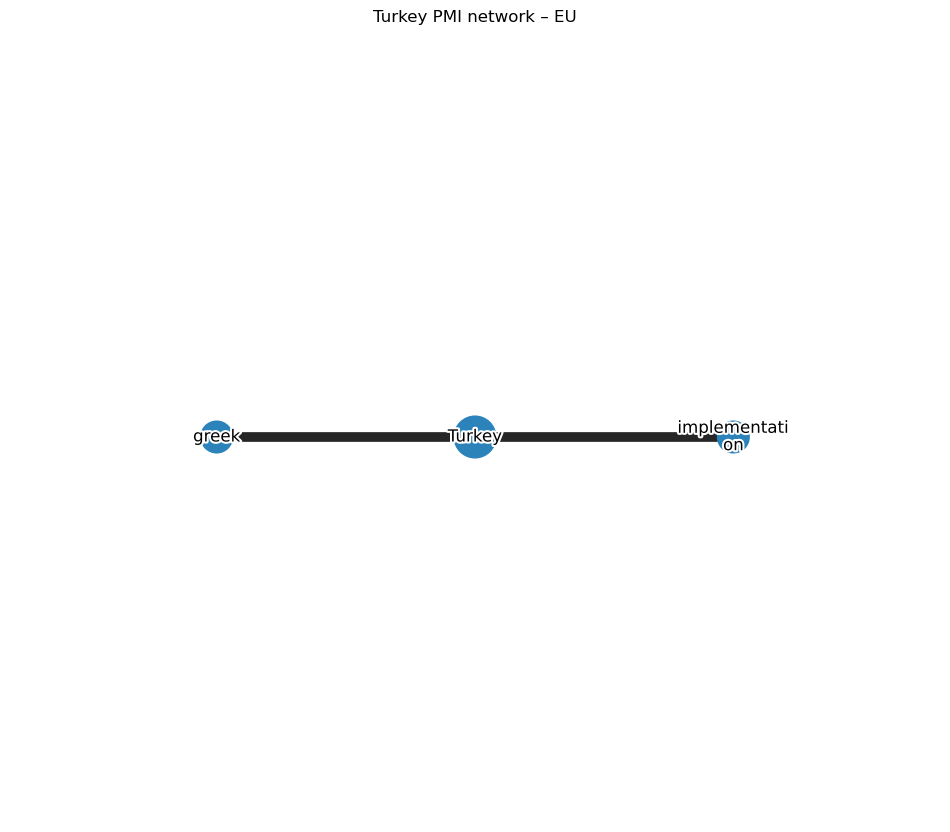

Saved C:\Users\gurde\figs\pmi_EU.png
Saved C:\Users\gurde\figs\pmi_EU.svg
[skip] Turkey PMI network – G20: nothing to plot.


C:\Users\gurde\AppData\Local\Temp\ipykernel_22520\3203771241.py:173: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=widths, edge_color="black", alpha=0.85, ax=ax)


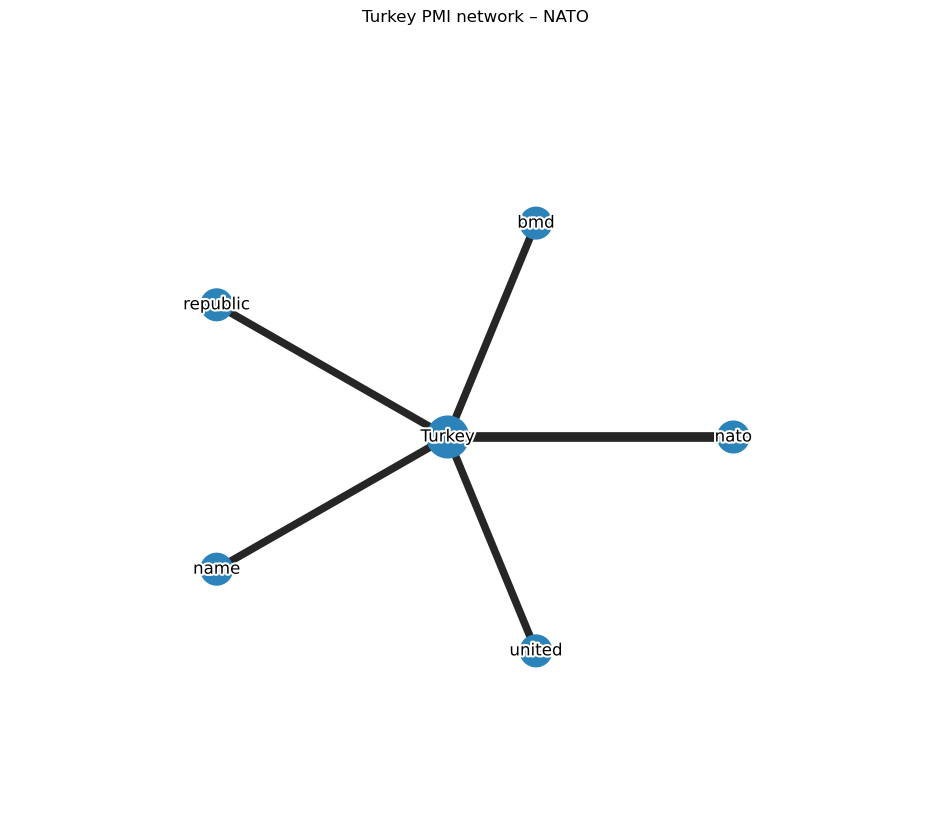

Saved C:\Users\gurde\figs\pmi_NATO.png
Saved C:\Users\gurde\figs\pmi_NATO.svg


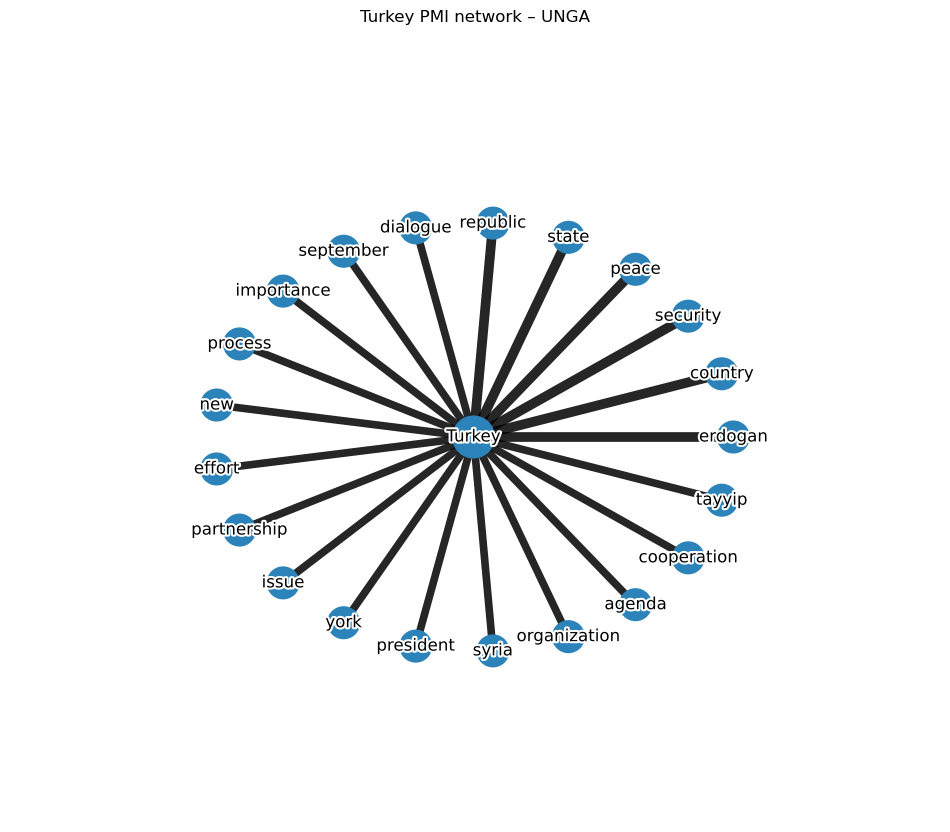

Saved C:\Users\gurde\figs\pmi_UNGA.png
Saved C:\Users\gurde\figs\pmi_UNGA.svg


In [25]:
from collections import Counter
import math

def pmi_edges(df, window=10, min_count=3, pos_filter=True, topk=30):
    # collect counts
    center = "turkey"
    co = Counter()
    term = Counter()
    total_windows = 0
    for text in df['text']:
        bag = concordance_windows(text, window=window, pos_filter=pos_filter)
        if not bag:
            continue
        total_windows += 1
        uniq = set(bag)
        for w in uniq:
            term[w] += 1
            co[(center, w)] += 1
    # compute PMI
    pmi_list = []
    for (c,w), cw in co.items():
        if cw < min_count: 
            continue
        pw = term[w] / total_windows
        pc = 1.0  # every window contains the center by construction
        pcw = cw / total_windows
        pmi = math.log(pcw / (pc * pw + 1e-12) + 1e-12)
        pmi_list.append((w, cw, pmi))
    # rank by normalized PMI (optional: npmi = pmi / -log(pcw))
    pmi_list.sort(key=lambda x: (x[2], x[1]), reverse=True)
    return pmi_list[:topk]

# Example per arena
for arena, dfA in use_df.groupby('arena'):
    items = pmi_edges(dfA, window=10, min_count=2, pos_filter=True, topk=24)
    G = _draw_star_graph([(w,c) for (w,c,_) in items], center="Turkey")
    plot_cooccurrence_network(G, f"Turkey PMI network – {arena}", f"figs/pmi_{arena}")


[PMI] EU: turkey-windows=3, kept=13 (pos_filter=True, min_count=2)


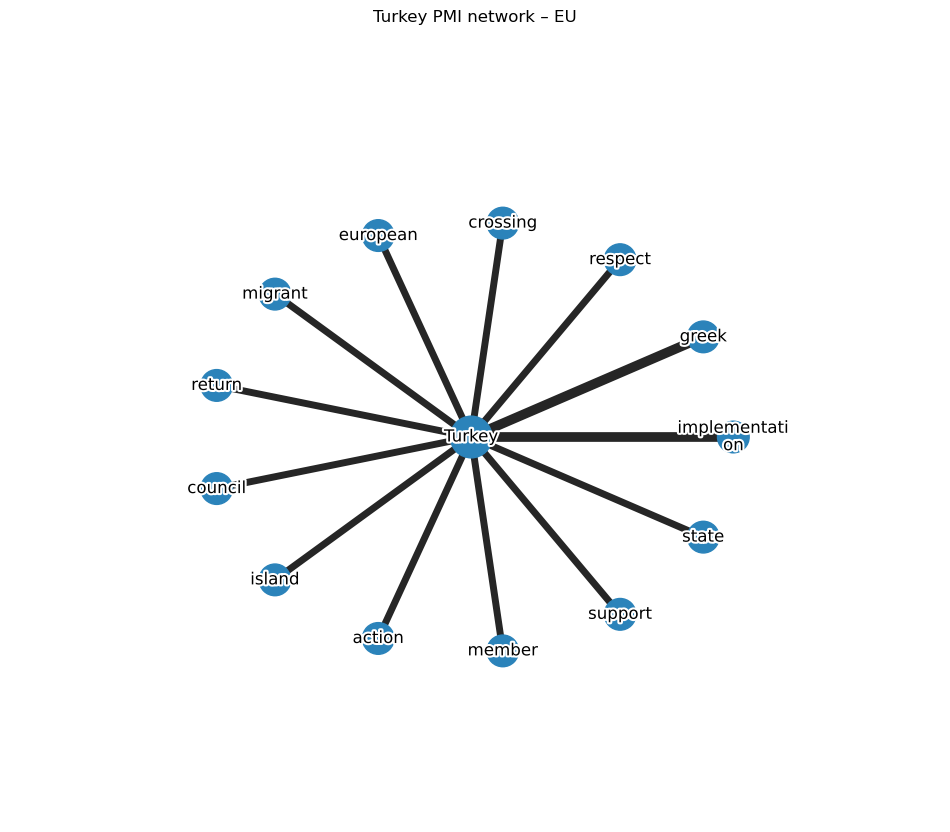

Saved C:\Users\gurde\figs\pmi_EU.png
Saved C:\Users\gurde\figs\pmi_EU.svg
[PMI] G20: turkey-windows=3, kept=2 (pos_filter=True, min_count=2)


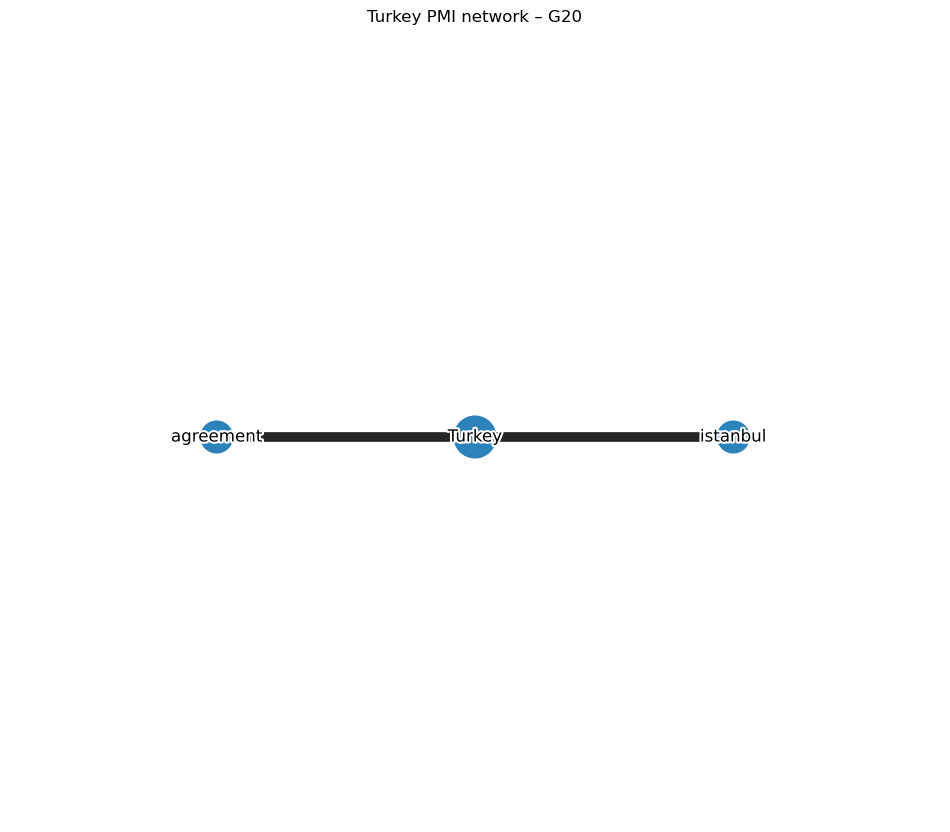

Saved C:\Users\gurde\figs\pmi_G20.png
Saved C:\Users\gurde\figs\pmi_G20.svg
[PMI] NATO: turkey-windows=4, kept=19 (pos_filter=True, min_count=2)


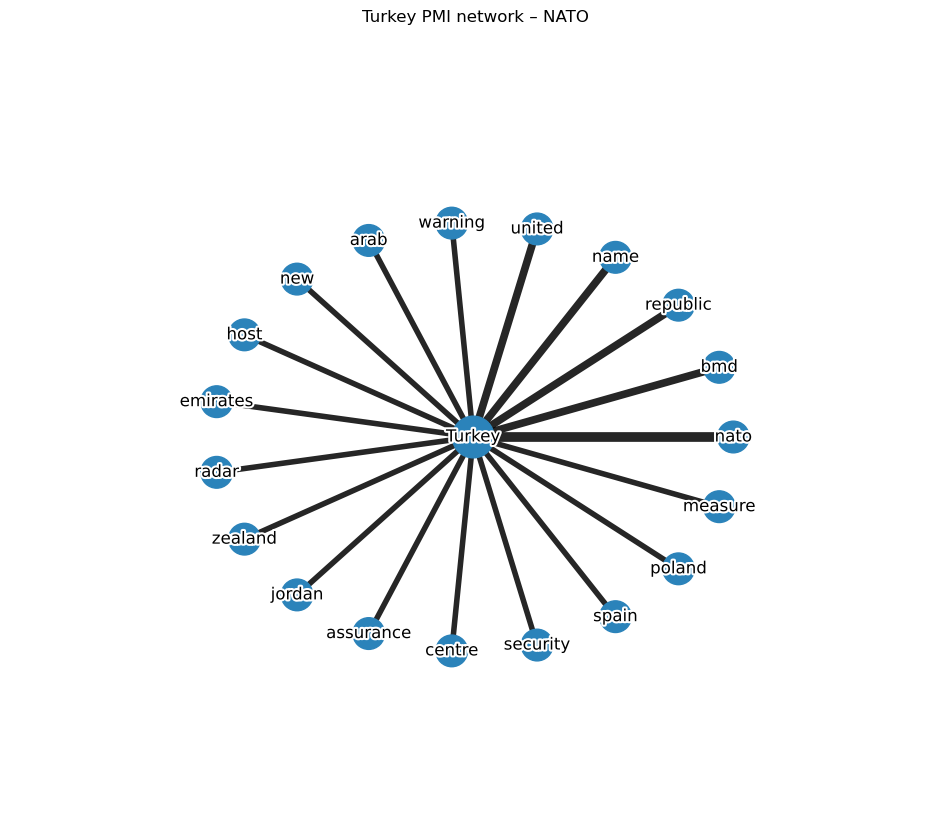

Saved C:\Users\gurde\figs\pmi_NATO.png
Saved C:\Users\gurde\figs\pmi_NATO.svg
[PMI] UNGA: turkey-windows=4, kept=24 (pos_filter=True, min_count=2)


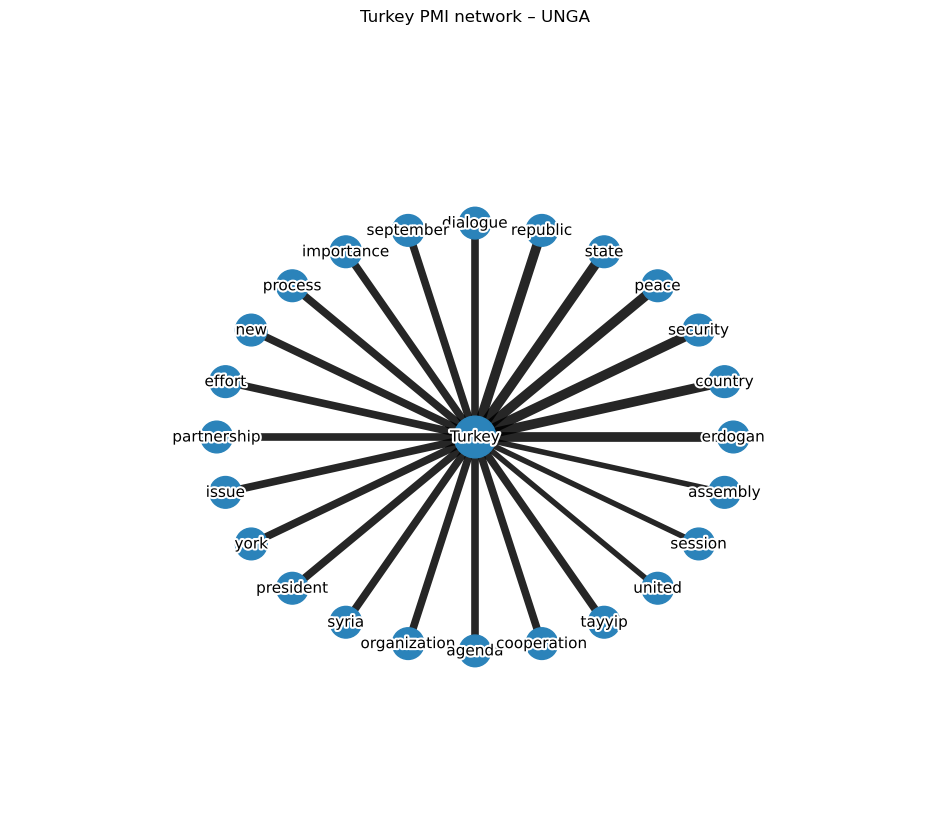

Saved C:\Users\gurde\figs\pmi_UNGA.png
Saved C:\Users\gurde\figs\pmi_UNGA.svg
Saved pmi_edges_EU.csv
Saved pmi_edges_G20.csv
Saved pmi_edges_NATO.csv
Saved pmi_edges_UNGA.csv


In [27]:
# === Robust PMI edges with diagnostics (drop-in) ===
from collections import Counter
import math

def pmi_edges_df(df, window=10, min_count=2, pos_filter=True, topk=30):
    """
    Returns a DataFrame: word, count, pmi, npmi, pw, pcw, total_windows.
    Uses window-level presence (sets) to avoid overweighting repeats inside a window.
    """
    center = "turkey"
    co = Counter()     # windows where (center, w) co-occur
    term = Counter()   # windows where w appears
    total_windows = 0

    for text in df['text']:
        bag = concordance_windows(text, window=window, pos_filter=pos_filter)
        if not bag:
            continue
        total_windows += 1
        uniq = set(bag)  # window-level presence
        for w in uniq:
            term[w] += 1
            co[(center, w)] += 1

    rows = []
    if total_windows == 0:
        return pd.DataFrame(rows, columns=["word","count","pmi","npmi","pw","pcw","total_windows"])

    for (c, w), cw in co.items():
        if cw < min_count:
            continue
        pw  = term[w] / total_windows          # P(w)
        pcw = cw / total_windows               # P(c & w)
        # P(c) = 1 because by construction every window is centered on 'Turkey'
        # Add tiny eps for numerical stability
        eps = 1e-12
        pmi  = math.log((pcw + eps) / (1.0 * pw + eps))
        npmi = pmi / (-math.log(pcw + eps))    # normalized PMI: [-1,1]
        rows.append((w, cw, pmi, npmi, pw, pcw, total_windows))

    if not rows:
        return pd.DataFrame(rows, columns=["word","count","pmi","npmi","pw","pcw","total_windows"])

    out = pd.DataFrame(rows, columns=["word","count","pmi","npmi","pw","pcw","total_windows"])
    # Rank by npmi primarily, then by count
    out = out.sort_values(["npmi","count"], ascending=[False, False]).head(topk).reset_index(drop=True)
    return out

# ---- Run PMI per arena with smart fallbacks and matched thresholds ----
pmi_results = {}  # store per-arena tables for inspection/export

for arena, dfA in use_df.groupby('arena'):
    # First pass (stricter)
    df_pmi = pmi_edges_df(dfA, window=10, min_count=2, pos_filter=True, topk=24)
    tw = int(df_pmi["total_windows"].iloc[0]) if not df_pmi.empty else 0
    print(f"[PMI] {arena}: turkey-windows={tw}, kept={len(df_pmi)} (pos_filter=True, min_count=2)")

    # If empty, relax filters progressively
    if df_pmi.empty:
        # Try: allow more words (pos_filter=False)
        df_pmi = pmi_edges_df(dfA, window=10, min_count=2, pos_filter=False, topk=24)
        tw = int(df_pmi["total_windows"].iloc[0]) if not df_pmi.empty else 0
        print(f"       fallback A -> kept={len(df_pmi)} (pos_filter=False, min_count=2)")

    if df_pmi.empty:
        # Try: drop threshold further
        df_pmi = pmi_edges_df(dfA, window=10, min_count=1, pos_filter=False, topk=24)
        tw = int(df_pmi["total_windows"].iloc[0]) if not df_pmi.empty else 0
        print(f"       fallback B -> kept={len(df_pmi)} (pos_filter=False, min_count=1)")

    pmi_results[arena] = df_pmi

    # Plot if anything survived; MATCH the plotting min_count to what we used
    if not df_pmi.empty:
        # Build (word, count) pairs for the graph
        edge_list = list(zip(df_pmi["word"], df_pmi["count"]))
        # Set min_count for drawing to the minimum actually present so we don't drop everything
        draw_min = int(df_pmi["count"].min())
        G = _draw_star_graph(edge_list, center="Turkey", min_count=draw_min)
        plot_cooccurrence_network(
            G,
            title=f"Turkey PMI network – {arena}",
            outpath=f"figs/pmi_{arena}",
            label_width=12
        )
    else:
        print(f"       (no PMI edges to plot for {arena})")

# Optional: save the PMI tables
for arena, dfP in pmi_results.items():
    out = f"pmi_edges_{arena}.csv"
    (dfP if not dfP.empty else pd.DataFrame(columns=["word","count","pmi","npmi","pw","pcw","total_windows"])) \
        .to_csv(out, index=False)
    print(f"Saved {out}")



=== EU ===


word  count       PMI      NPMI
0          migrant      3  6.184303  1.208940
1         protocol      2  5.599341  0.982265
2         crossing      3  5.184303  1.013454
3            greek      6  4.862375  1.181485
4            state      2  4.014378  0.704223
5             line      2  4.014378  0.704223
6      readmission      3  3.862375  0.755037
7           greece      3  3.376948  0.660143
8           return      2  3.277413  0.574940
9          context      3  3.184303  0.622484
10  implementation      4  3.014378  0.641297
11           march      2  3.014378  0.528797
12         respect      2  2.599341  0.455990
13          action      2  2.014378  0.353372
14            plan      2  2.014378  0.353372
15          member      3  1.540447  0.301135
16         support      2  1.075779  0.188719
17      commission      2  0.844453  0.148138
18         council      3 -0.155547 -0.030407
19        european      3 -0.208014 -0.040664

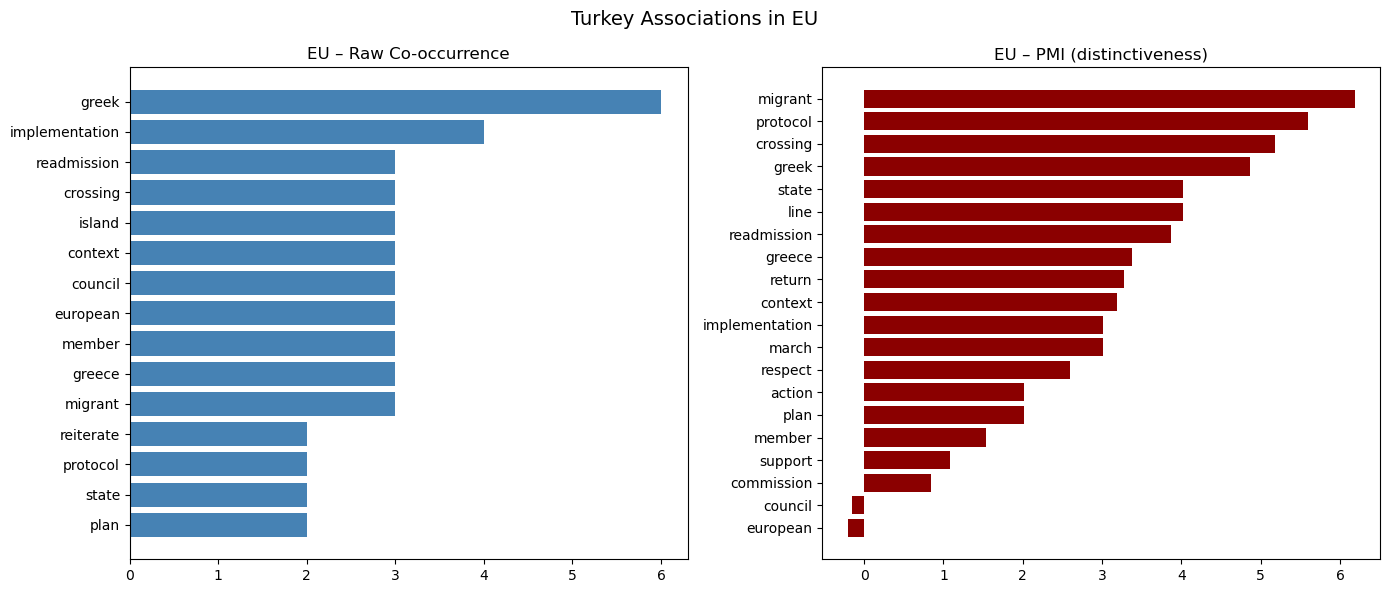


=== G20 ===


word  count       PMI      NPMI
0   istanbul      2  9.389739  2.826593
1  agreement      2  6.246781  1.880468

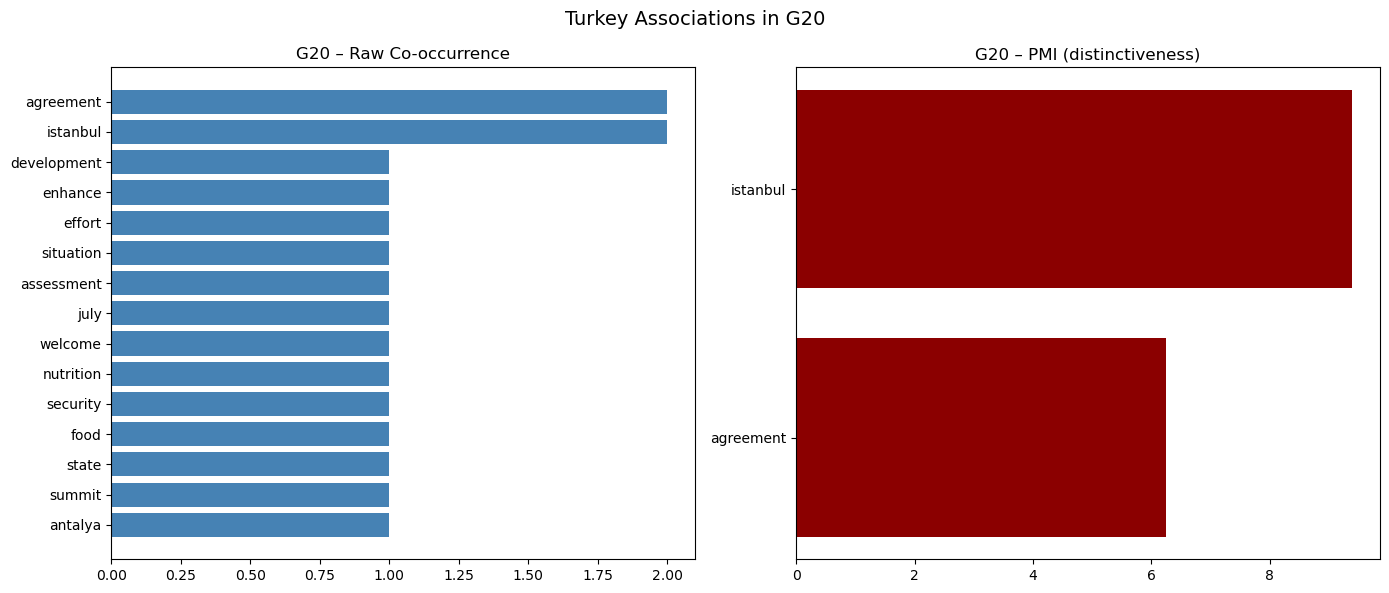


=== NATO ===


word  count       PMI      NPMI
0     measure      2  9.168338  1.498354
1       radar      2  8.168338  1.334927
2    emirates      2  7.168338  1.171500
3        name      3  6.945946  1.255145
4     germany      2  6.846410  1.118888
5       italy      2  6.846410  1.118888
6       spain      3  6.583376  1.189628
7     warning      2  6.583376  1.075901
8      poland      3  6.431373  1.162161
9     zealand      2  6.360984  1.039556
10   brussels      2  6.360984  1.039556
11     france      2  6.168338  1.008073
12     jordan      4  5.998413  1.171807
13       host      2  5.998413  0.980303
14  assurance      3  5.945946  1.074443
15       arab      2  5.846410  0.955461
16    kingdom      2  5.708907  0.932989
17     syrian      2  5.708907  0.932989
18   activity      2  5.583376  0.912474
19       ally      2  5.080876  0.830352

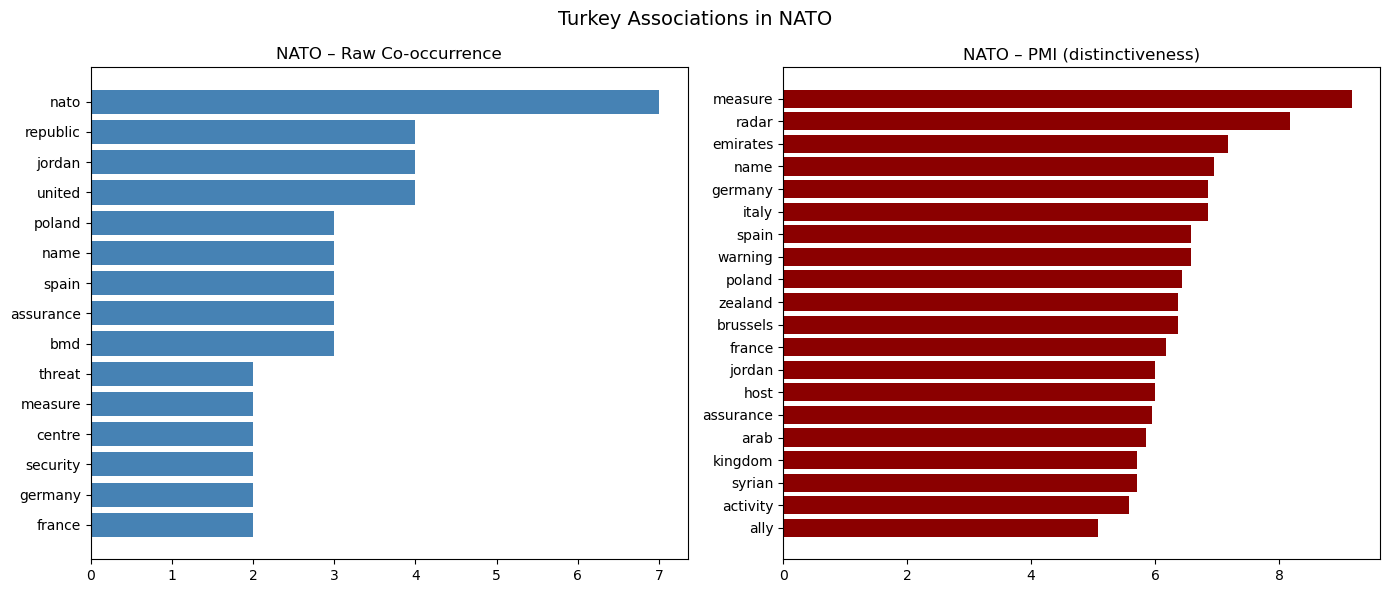


=== UNGA ===


word  count       PMI      NPMI
0       relation      3  5.845667  0.848833
1   significance      2  5.260704  0.704086
2         tayyip      3  4.260704  0.618685
3      mechanism      2  4.260704  0.570248
4        refugee      2  4.260704  0.570248
5     commitment      2  4.260704  0.570248
6           step      2  4.260704  0.570248
7        erdogan      4  3.938776  0.608618
8           york      4  3.938776  0.608618
9    partnership      3  3.845667  0.558418
10          life      3  3.845667  0.558418
11        effort      4  3.675742  0.567974
12        debate      2  3.675742  0.491957
13        summit      2  3.675742  0.491957
14     challenge      2  3.675742  0.491957
15     september      3  3.523739  0.511672
16      republic      6  3.386235  0.575234
17     migration      2  3.260704  0.436409
18         latin      2  3.260704  0.436409
19       america      2  3.260704  0.436409

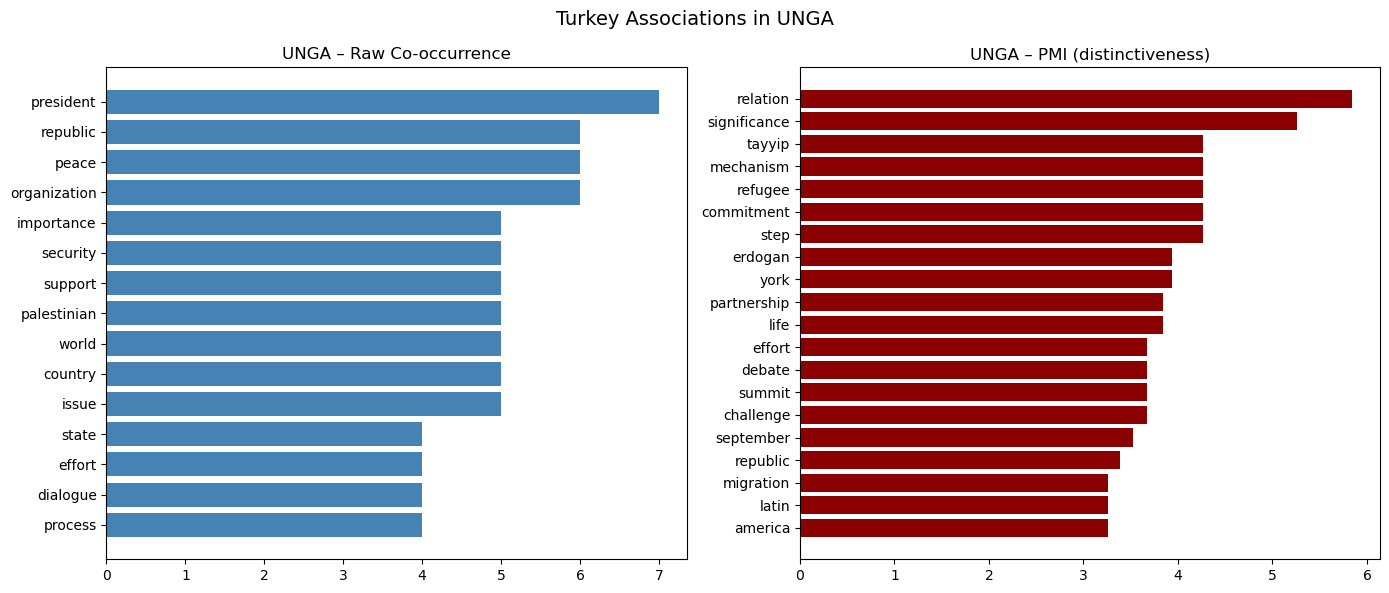

In [29]:
from collections import Counter
import math
import pandas as pd

def pmi_edges_global(df, window=10, min_count=3, pos_filter=True, topk=30):
    """
    Compute PMI of words with 'Turkey' relative to the entire corpus.
    """
    center = "turkey"
    co = Counter()
    term = Counter()
    total_terms = 0

    # Count co-occurrence in Turkey windows
    for text in df['text']:
        bag = concordance_windows(text, window=window, pos_filter=pos_filter)
        if not bag:
            continue
        total_terms += len(bag)
        for w in bag:
            term[w] += 1
            co[(center, w)] += 1

    # Also count overall frequency of each word in the whole corpus
    global_term = Counter()
    global_total = 0
    for text in df['text']:
        toks = tokenize(text)
        toks = [t for t in toks if len(t) > 2 and t not in BASIC_STOPS and t not in EXCLUDE_TERMS]
        global_total += len(toks)
        global_term.update(toks)

    # Compute PMI
    pmi_list = []
    for (c, w), cw in co.items():
        if cw < min_count:
            continue
        pw = global_term[w] / global_total        # global probability of w
        pcw = cw / total_terms                    # prob of w given Turkey-window
        if pw > 0 and pcw > 0:
            pmi = math.log2(pcw / pw)             # log ratio: more positive = more distinctive
            npmi = pmi / (-math.log2(pcw))        # normalized PMI (optional, -1..1 scale)
            pmi_list.append((w, cw, pmi, npmi))

    # Sort by PMI (distinctiveness) then by count
    pmi_list.sort(key=lambda x: (x[2], x[1]), reverse=True)
    return pd.DataFrame(pmi_list[:topk], columns=["word","count","PMI","NPMI"])

# === Example: Run per arena ===
for arena, dfA in use_df.groupby('arena'):
    df_pmi = pmi_edges_global(dfA, window=10, min_count=2, pos_filter=True, topk=20)
    print(f"\n=== {arena} ===")
    display(df_pmi)

    # Plot
    if not df_pmi.empty:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        df_raw = framing_table(dfA, window=10, topn=15, pos_filter=True)
        axes[0].barh(df_raw['word'], df_raw['count'], color="steelblue")
        axes[0].invert_yaxis()
        axes[0].set_title(f"{arena} – Raw Co-occurrence")

        axes[1].barh(df_pmi['word'], df_pmi['PMI'], color="darkred")
        axes[1].invert_yaxis()
        axes[1].set_title(f"{arena} – PMI (distinctiveness)")

        plt.suptitle(f"Turkey Associations in {arena}", fontsize=14)
        plt.tight_layout()
        plt.show()


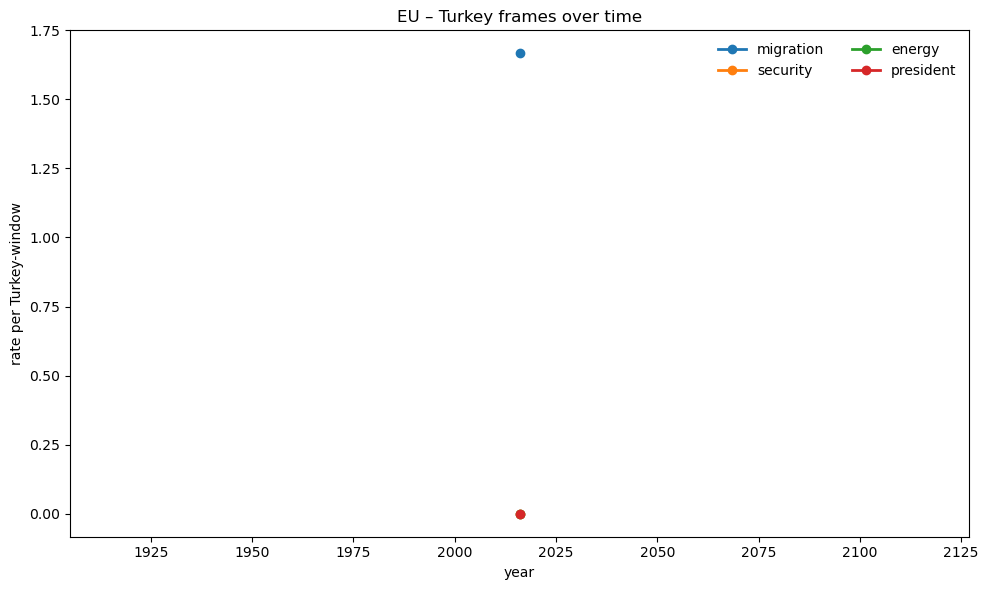

[EU] No aggregate changepoints detected (with current penalty).


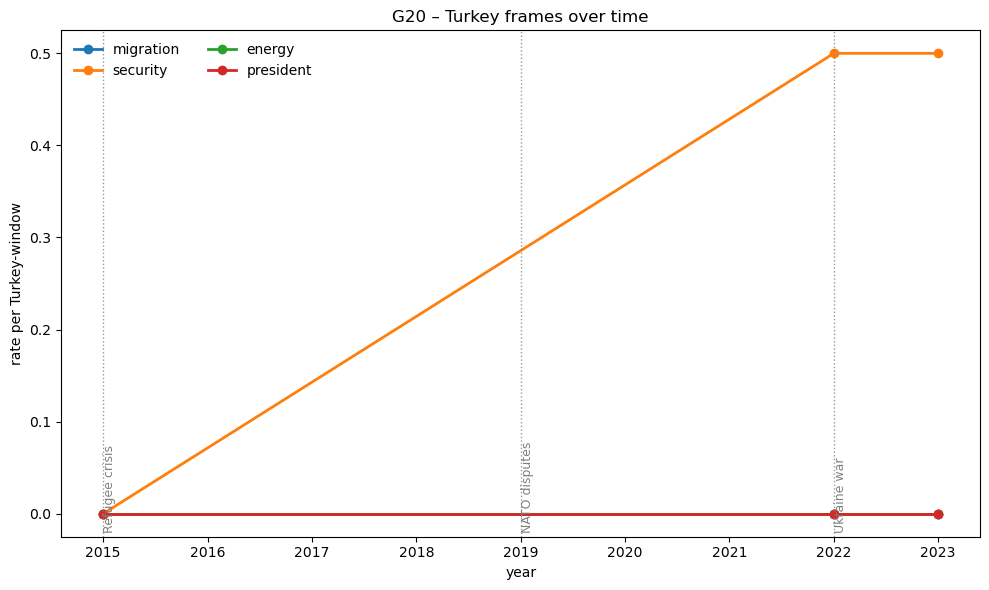

[G20] No aggregate changepoints detected (with current penalty).


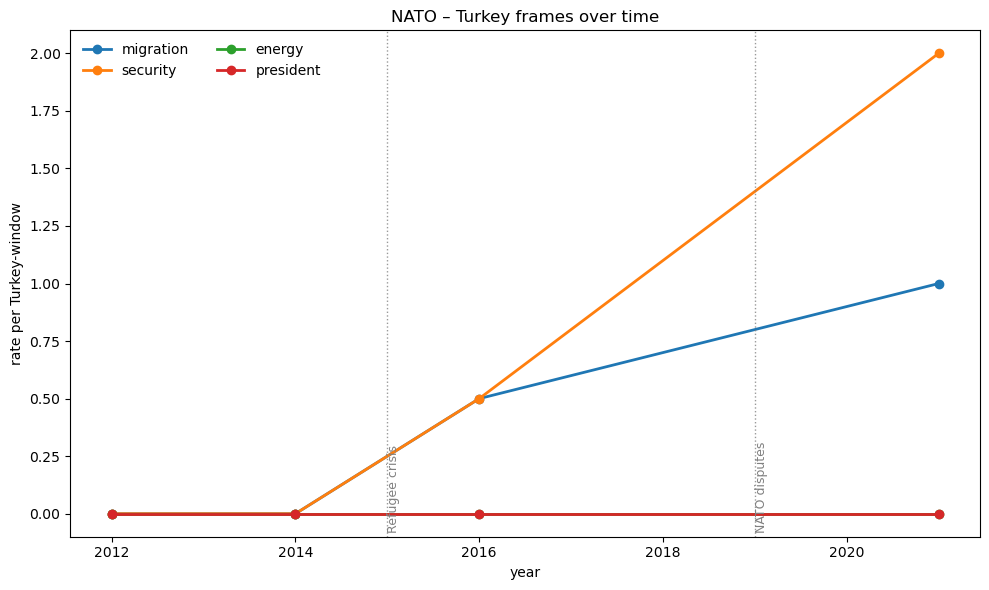

[NATO] No aggregate changepoints detected (with current penalty).


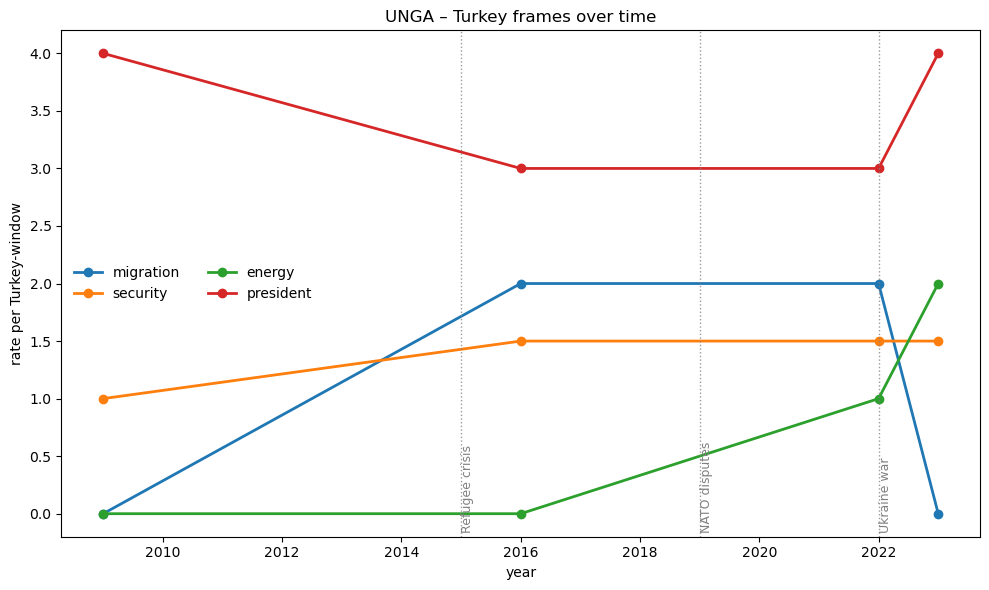

[UNGA] No aggregate changepoints detected (with current penalty).


In [30]:
# === TEMPORAL TREND ANALYSIS: frames over time + changepoints ===
# Requires: use_df (cols: text, arena, year), concordance_windows(...), and matplotlib.
# Optional: EXCLUDE_TERMS set defined earlier (respected by concordance_windows).

from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- (1) Define the frames you care about (edit freely) ----
# Use lemmas / lowercase. Include reasonable synonym sets.
FRAMES = {
    "migration": {"migrant", "migration", "refugee", "asylum"},
    "security":  {"security", "defense", "defence", "threat", "terrorism", "terrorist"},
    "energy":    {"energy", "gas", "pipeline", "oil", "nuclear", "electricity"},
    "president": {"president", "erdogan", "recep", "tayyip"},
}

# Default event markers to annotate the charts (edit as needed)
EVENTS = {
    2015: "Refugee crisis",
    2019: "NATO disputes",
    2022: "Ukraine war",
}

# ---- (2) Count frame hits by arena & year, normalized by #Turkey-windows ----
def frame_counts_over_time(df, frames=FRAMES, window=10, pos_filter=True):
    """
    For each (arena, year), we:
      - open concordance windows around 'Turkey' mentions,
      - count tokens,
      - compute frame counts and the rate per Turkey-window for comparability.
    Returns a tidy dataframe with columns: arena, year, frame, count, per_window.
    """
    rows = []
    # ensure numeric year where possible
    year_series = pd.to_numeric(df.get("year", pd.Series([None]*len(df))), errors="coerce")

    for (arena, year), dfG in df.assign(_year=year_series).dropna(subset=["_year"]).groupby(["arena", "_year"]):
        total_windows = 0
        bag = []
        for t in dfG["text"]:
            w = concordance_windows(t, window=window, pos_filter=pos_filter)
            if not w:
                continue
            total_windows += 1
            bag.extend(w)

        if total_windows == 0:
            # no Turkey windows in this (arena, year)
            continue

        cnt = Counter(bag)
        for frame, lex in frames.items():
            hits = sum(cnt.get(term, 0) for term in lex)
            rows.append({
                "arena": arena,
                "year": int(float(year)),
                "frame": frame,
                "count": hits,
                "per_window": hits / total_windows  # rate per Turkey-window
            })

    out = pd.DataFrame(rows)
    if not out.empty:
        out.sort_values(["arena", "year", "frame"], inplace=True)
    return out

# ---- (3) Optional smoothing helper (simple moving average) ----
def _smooth(series, win=2):
    if win <= 1 or len(series) == 0:
        return series
    return pd.Series(series).rolling(window=win, center=True, min_periods=1).mean().to_numpy()

# ---- (4) Changepoint detection with 'ruptures' (graceful fallback if not installed) ----
def _changepoints(years, y, model="rbf", pen=None):
    """
    Returns a list of changepoint years using ruptures' PELT.
    If ruptures is missing or series too short, returns [].
    """
    try:
        import ruptures as rpt
    except Exception:
        return []

    y = np.asarray(y, dtype=float)
    if len(y) < 6:
        return []

    algo = rpt.Pelt(model=model).fit(y)
    # Penalty: a light heuristic; tweak if you want more/less segments.
    if pen is None:
        pen = 2.0 * np.log(max(2, len(y)))
    idxs = algo.predict(pen=pen)  # indices where segments end (includes len(y))
    # map indices to years (exclude the final endpoint)
    cps = [int(years[i-1]) for i in idxs if 0 < i < len(years)]
    return sorted(set(cps))

# ---- (5) Plot trends for one arena (multi-line) + aggregate changepoints ----
def plot_frame_trends(count_df,
                      arena,
                      frames_to_plot=None,
                      normalize=True,    # True: use 'per_window'; False: raw 'count'
                      smooth=2,          # moving-average window (years). 1 disables smoothing
                      events=EVENTS,
                      figsize=(10, 6)):
    """
    Draws time-series for selected frames within one arena and overlays:
      - aggregate changepoints (computed on the mean over plotted frames)
      - vertical event markers.
    """
    if count_df.empty:
        print(f"[{arena}] No data to plot.")
        return

    sub = count_df[count_df["arena"] == arena].copy()
    if sub.empty:
        print(f"[{arena}] No rows for this arena.")
        return

    value_col = "per_window" if normalize else "count"
    # pivot: rows = year, cols = frame
    piv = sub.pivot_table(index="year", columns="frame", values=value_col, aggfunc="sum").sort_index()
    piv = piv.fillna(0.0)

    # Pick frames to plot
    if not frames_to_plot:
        frames_to_plot = list(piv.columns)

    # Ensure only available columns
    frames_to_plot = [f for f in frames_to_plot if f in piv.columns]
    if not frames_to_plot:
        print(f"[{arena}] None of the requested frames are present.")
        return

    years = piv.index.to_numpy()
    Y = np.column_stack([_smooth(piv[f].to_numpy(), win=smooth) for f in frames_to_plot])
    agg = _smooth(np.nanmean(Y, axis=1), win=max(2, smooth))

    # Detect changepoints on aggregate
    cps = _changepoints(years, agg, model="rbf")

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    for j, f in enumerate(frames_to_plot):
        ax.plot(years, Y[:, j], marker="o", linewidth=2, label=f)

    # Aggregate changepoints
    for yr in cps:
        ax.axvline(yr, color="black", linestyle="--", linewidth=1.2, alpha=0.8)
        ax.text(yr, ax.get_ylim()[1], " CP", rotation=90, va="top", ha="left", fontsize=9, color="black")

    # Event markers
    if isinstance(events, dict):
        for yr, label in events.items():
            if years.min() <= yr <= years.max():
                ax.axvline(yr, color="gray", linestyle=":", linewidth=1.0, alpha=0.8)
                ax.text(yr, ax.get_ylim()[0], f" {label}", rotation=90, va="bottom", ha="left", fontsize=9, color="gray")

    ax.set_title(f"{arena} – Turkey frames over time")
    ax.set_xlabel("year")
    ax.set_ylabel("rate per Turkey-window" if normalize else "raw count")
    ax.legend(ncol=2, frameon=False)
    fig.tight_layout()
    plt.show()

    if cps:
        print(f"[{arena}] Aggregate changepoints detected at years: {cps}")
    else:
        print(f"[{arena}] No aggregate changepoints detected (with current penalty).")

# ---- (6) Run it: build counts, then plot for each arena ----
trend_df = frame_counts_over_time(use_df, frames=FRAMES, window=10, pos_filter=True)

# Choose which frames to display on the charts (must exist in FRAMES and appear in your data)
frames_to_plot = ["migration", "security", "energy", "president"]

for arena in sorted(trend_df["arena"].dropna().unique()):
    plot_frame_trends(
        trend_df,
        arena=arena,
        frames_to_plot=frames_to_plot,
        normalize=True,   # uses per-window rates (recommended across years)
        smooth=2,         # 2-year rolling average; set to 1 to disable
        events=EVENTS,
        figsize=(10, 6)
    )


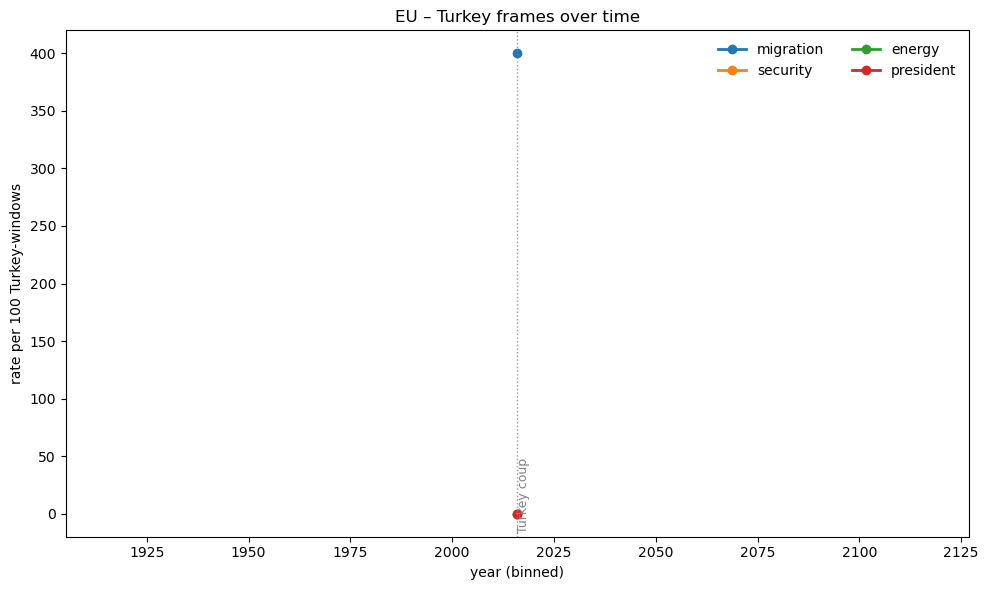

[EU] No aggregate changepoints detected (with current penalty).


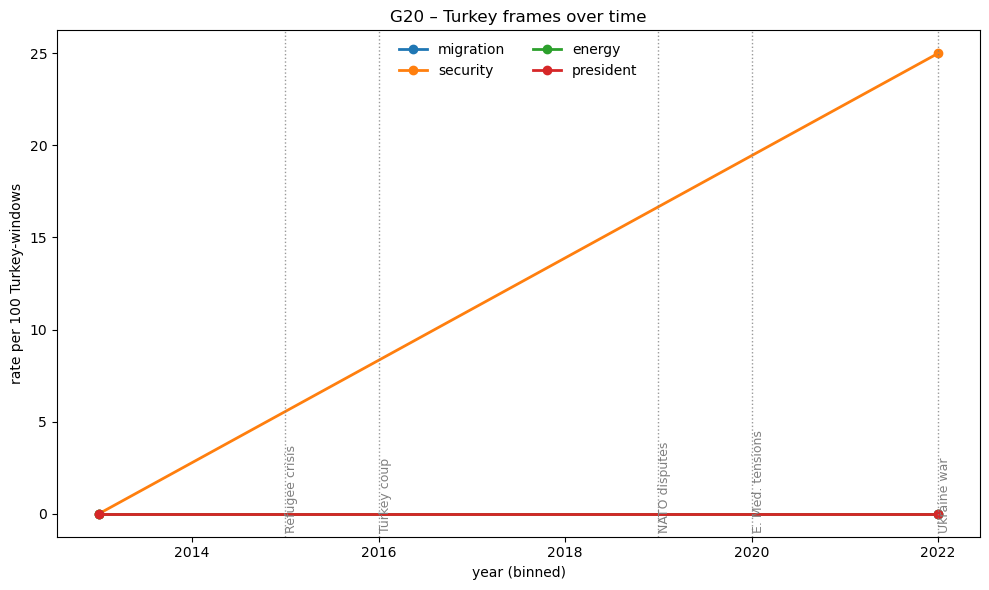

[G20] No aggregate changepoints detected (with current penalty).


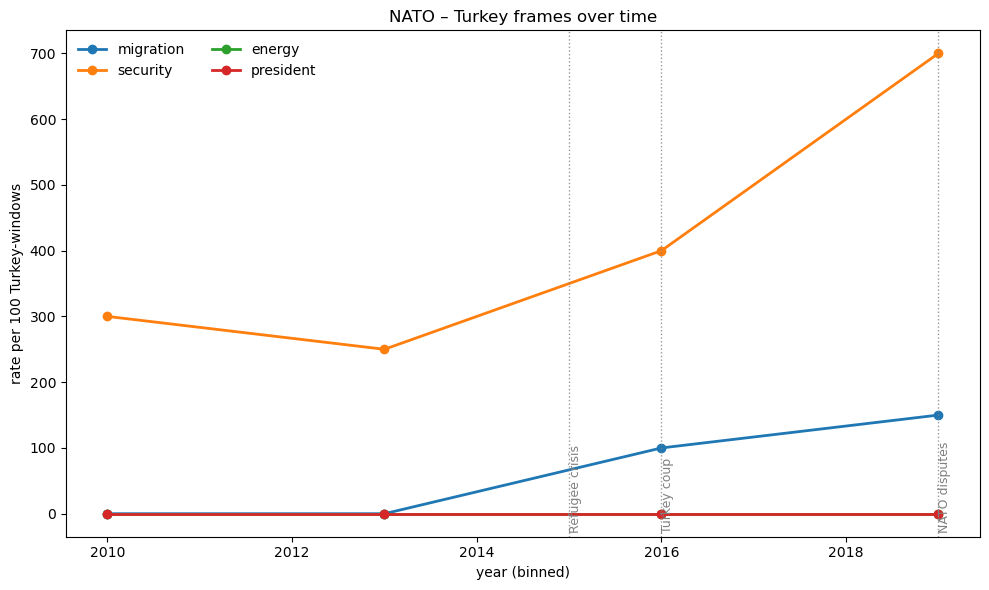

[NATO] No aggregate changepoints detected (with current penalty).


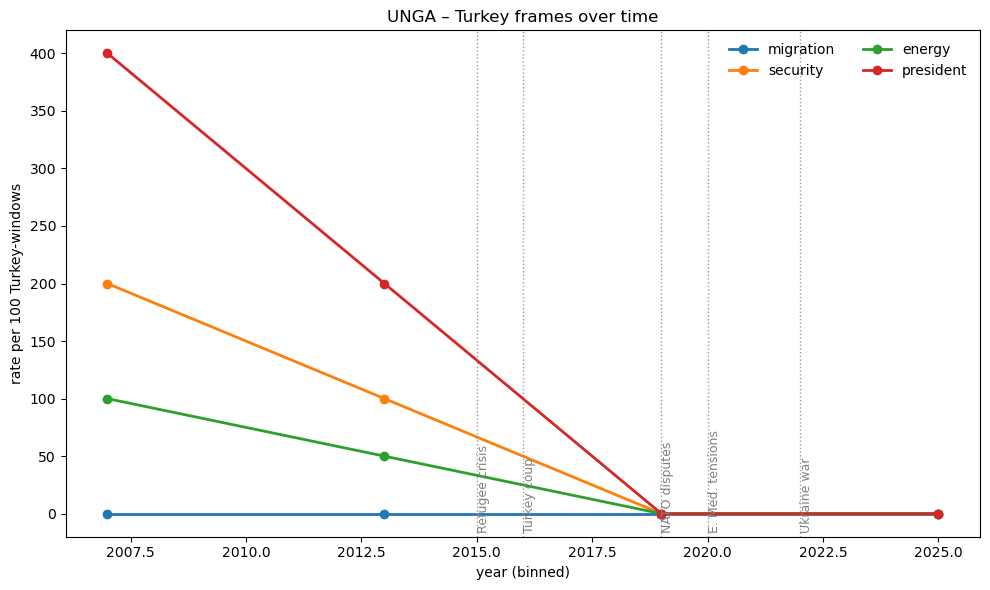

[UNGA] No aggregate changepoints detected (with current penalty).


In [32]:
# === TEMPORAL TREND ANALYSIS: frames over time + changepoints (3y bins, per-100 norm) ===
# Requires: use_df (cols: text, arena, year), concordance_windows(...), matplotlib.
# Optional: EXCLUDE_TERMS already respected inside concordance_windows when pos_filter=True.

from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- (1) Define frames (edit freely) ----
# Use lemmas / lowercase; include common synonyms so counts aren't artificially sparse.
FRAMES = {
    "migration": {
        "migrant", "migration", "refugee", "asylum", "asylee", "displacement",
        "border", "crossing", "readmission"
    },
    "security":  {
        "security", "defense", "defence", "deterrence", "threat", "threats",
        "terrorism", "terrorist", "military", "missile", "radar", "bmd", "alliance", "nato"
    },
    "energy":    {
        "energy", "gas", "lng", "pipeline", "pipelines", "oil", "petroleum",
        "nuclear", "electricity", "grid", "power"
    },
    "president": {
        "president", "erdogan", "recep", "tayyip", "head", "leader"
    },
}

# Default event markers (edit as needed)
EVENTS = {
    2015: "Refugee crisis",
    2016: "Turkey coup",
    2019: "NATO disputes",
    2020: "E. Med. tensions",
    2022: "Ukraine war",
}

# ---- (2) Count frame hits by arena & time, normalized by #Turkey-windows ----
def frame_counts_over_time(
    df,
    frames=FRAMES,
    window=10,
    pos_filter=True,
    bin_size=3,            # group years into 3-year bins (set to 1 for yearly)
):
    """
    For each (arena, year-bin):
      - open concordance windows around 'Turkey' mentions,
      - count tokens,
      - compute frame counts and normalized rates.
    Returns tidy df: arena, year, frame, count, per_window, per100_window.
    """
    rows = []

    # numeric year + binning
    yr = pd.to_numeric(df.get("year", pd.Series([None]*len(df))), errors="coerce")
    if bin_size and bin_size > 1:
        year_key = (yr // bin_size) * bin_size
    else:
        year_key = yr

    for (arena, ybin), dfG in df.assign(_year=year_key).dropna(subset=["_year"]).groupby(["arena", "_year"]):
        total_windows = 0
        bag = []
        for t in dfG["text"]:
            w = concordance_windows(t, window=window, pos_filter=pos_filter)
            if not w:
                continue
            total_windows += 1
            bag.extend(w)

        if total_windows == 0:
            continue

        cnt = Counter(bag)
        ybin = int(float(ybin))
        for frame, lex in frames.items():
            hits = sum(cnt.get(term, 0) for term in lex)
            per_window = hits / total_windows
            rows.append({
                "arena": arena,
                "year": ybin,
                "frame": frame,
                "count": hits,
                "per_window": per_window,
                "per100_window": 100.0 * per_window,   # clearer scale
            })

    out = pd.DataFrame(rows)
    if not out.empty:
        out.sort_values(["arena", "year", "frame"], inplace=True)
    return out

# ---- (3) Optional smoothing helper (simple moving average) ----
def _smooth(series, win=2):
    if win <= 1 or len(series) == 0:
        return np.asarray(series)
    return pd.Series(series).rolling(window=win, center=True, min_periods=1).mean().to_numpy()

# ---- (4) Changepoint detection with 'ruptures' (graceful fallback if not installed) ----
def _changepoints(years, y, model="rbf", pen=None):
    """
    Returns a list of changepoint years using ruptures' PELT.
    If ruptures is missing or series too short, returns [].
    """
    try:
        import ruptures as rpt
    except Exception:
        return []

    y = np.asarray(y, dtype=float)
    if len(y) < 6:
        return []

    algo = rpt.Pelt(model=model).fit(y)
    if pen is None:
        pen = 2.0 * np.log(max(2, len(y)))  # mild penalty
    idxs = algo.predict(pen=pen)           # segment end indices (includes len(y))
    cps = [int(years[i-1]) for i in idxs if 0 < i < len(years)]
    return sorted(set(cps))

# ---- (5) Plot trends for one arena (multi-line) + aggregate changepoints ----
def plot_frame_trends(count_df,
                      arena,
                      frames_to_plot=None,
                      metric="per100_window",   # "per100_window" | "per_window" | "count"
                      smooth=2,                 # moving-average window; set 1 to disable
                      events=EVENTS,
                      figsize=(10, 6)):
    """
    Draws time-series for selected frames within one arena and overlays:
      - aggregate changepoints (computed on mean of selected frames)
      - vertical event markers.
    """
    if count_df.empty:
        print(f"[{arena}] No data to plot.")
        return

    sub = count_df[count_df["arena"] == arena].copy()
    if sub.empty:
        print(f"[{arena}] No rows for this arena.")
        return

    if metric not in {"per100_window", "per_window", "count"}:
        metric = "per100_window"

    # pivot: rows = year (bins), cols = frame
    piv = sub.pivot_table(index="year", columns="frame", values=metric, aggfunc="sum").sort_index()
    piv = piv.fillna(0.0)

    # if bins are sparse, reindex to full range of bins for nicer lines
    if len(piv.index) >= 2:
        step = np.diff(piv.index.values).min()
        full_idx = np.arange(piv.index.min(), piv.index.max() + step, step)
        piv = piv.reindex(full_idx, fill_value=0.0)

    # Pick frames to plot
    if not frames_to_plot:
        frames_to_plot = list(piv.columns)
    frames_to_plot = [f for f in frames_to_plot if f in piv.columns]
    if not frames_to_plot:
        print(f"[{arena}] None of the requested frames are present.")
        return

    years = piv.index.to_numpy()
    Y = np.column_stack([_smooth(piv[f].to_numpy(), win=smooth) for f in frames_to_plot])
    agg = _smooth(np.nanmean(Y, axis=1), win=max(2, smooth))

    # Detect changepoints on aggregate
    cps = _changepoints(years, agg, model="rbf")

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    for j, f in enumerate(frames_to_plot):
        ax.plot(years, Y[:, j], marker="o", linewidth=2, label=f)

    # Aggregate changepoints
    for yr in cps:
        ax.axvline(yr, color="black", linestyle="--", linewidth=1.2, alpha=0.8)
        ax.text(yr, ax.get_ylim()[1], " CP", rotation=90, va="top", ha="left", fontsize=9, color="black")

    # Event markers
    if isinstance(events, dict):
        for yr, label in events.items():
            if years.min() <= yr <= years.max():
                ax.axvline(yr, color="gray", linestyle=":", linewidth=1.0, alpha=0.8)
                ax.text(yr, ax.get_ylim()[0], f" {label}", rotation=90, va="bottom", ha="left", fontsize=9, color="gray")

    ax.set_title(f"{arena} – Turkey frames over time")
    ax.set_xlabel("year (binned)")
    ylab = {"per100_window": "rate per 100 Turkey-windows",
            "per_window": "rate per Turkey-window",
            "count": "raw count"}[metric]
    ax.set_ylabel(ylab)
    ax.legend(ncol=2, frameon=False)
    fig.tight_layout()
    plt.show()

    if cps:
        print(f"[{arena}] Aggregate changepoints detected at years: {cps}")
    else:
        print(f"[{arena}] No aggregate changepoints detected (with current penalty).")

# ---- (6) Run it: build counts, then plot for each arena ----
trend_df = frame_counts_over_time(
    use_df,
    frames=FRAMES,
    window=10,
    pos_filter=True,
    bin_size=3,     # <-- 3-year bins; set to 1 for yearly
)

# Which frames to show (must exist in FRAMES and appear in your data)
frames_to_plot = ["migration", "security", "energy", "president"]

for arena in sorted(trend_df["arena"].dropna().unique()):
    plot_frame_trends(
        trend_df,
        arena=arena,
        frames_to_plot=frames_to_plot,
        metric="per100_window",   # clearer scale
        smooth=2,                 # 2-bin moving average (i.e., ~6 years with bin_size=3)
        events=EVENTS,
        figsize=(10, 6)
    )


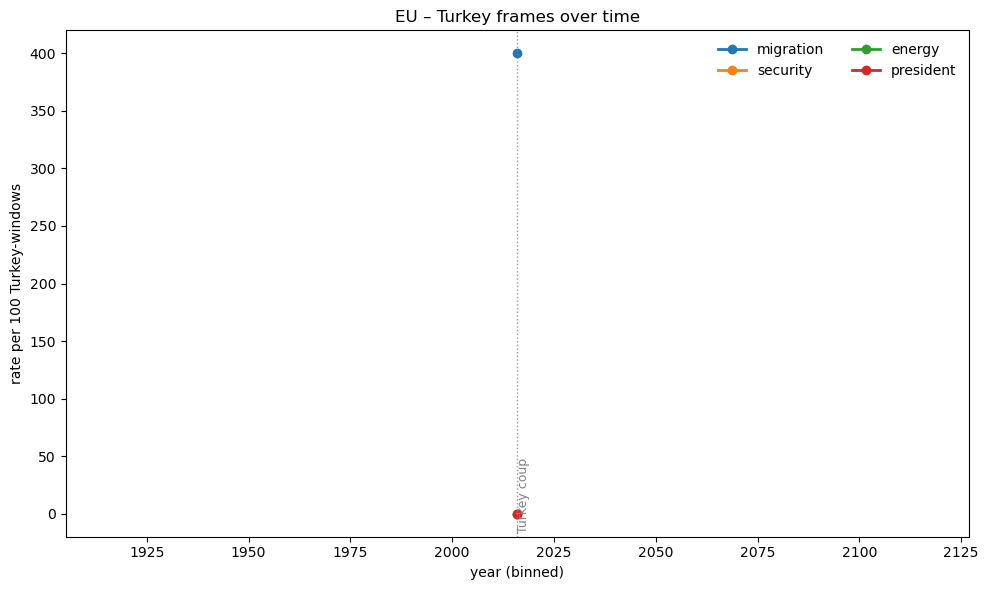

[EU] No aggregate changepoints detected (with current penalty).


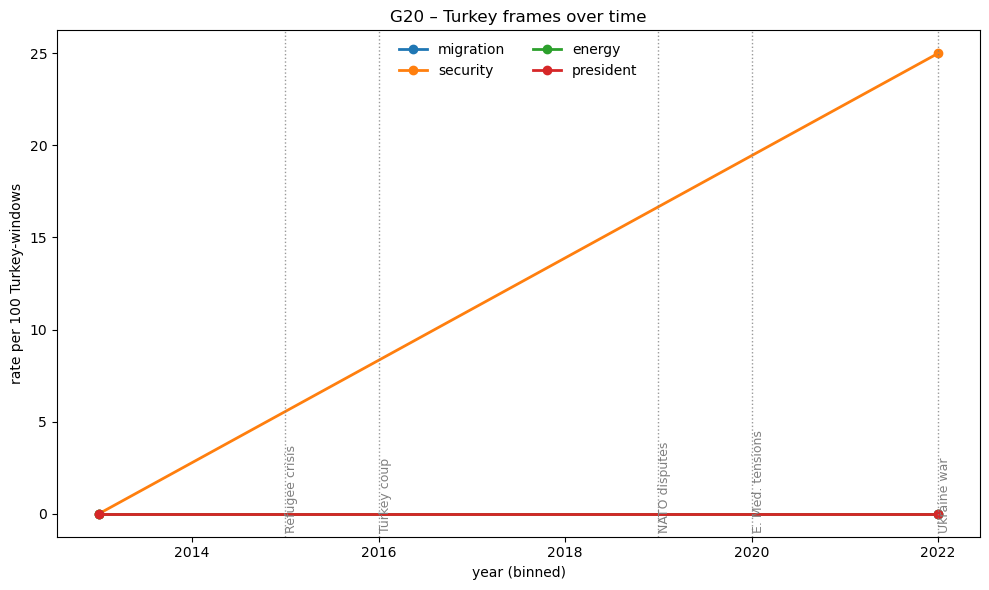

[G20] No aggregate changepoints detected (with current penalty).


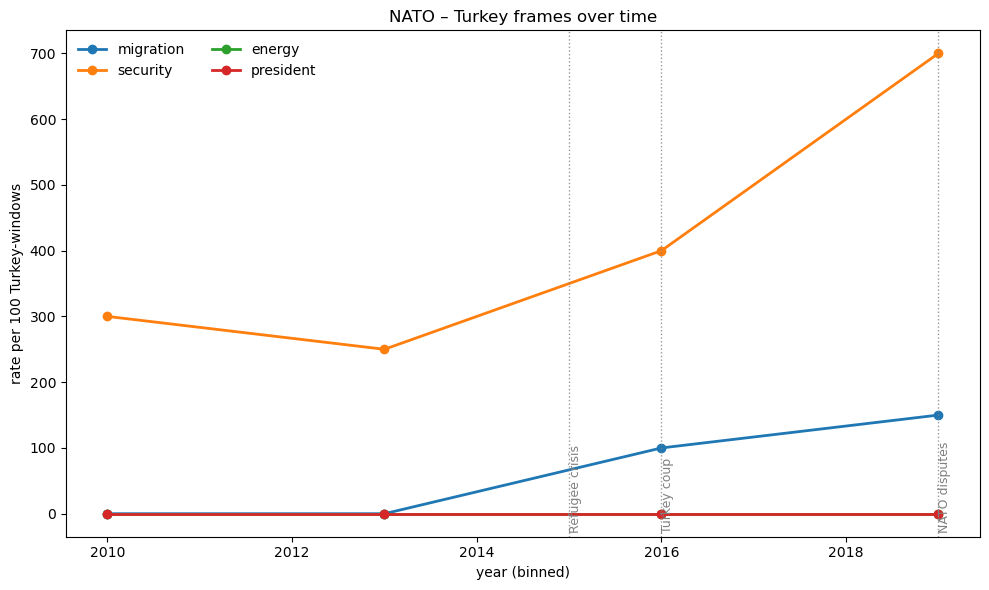

[NATO] No aggregate changepoints detected (with current penalty).


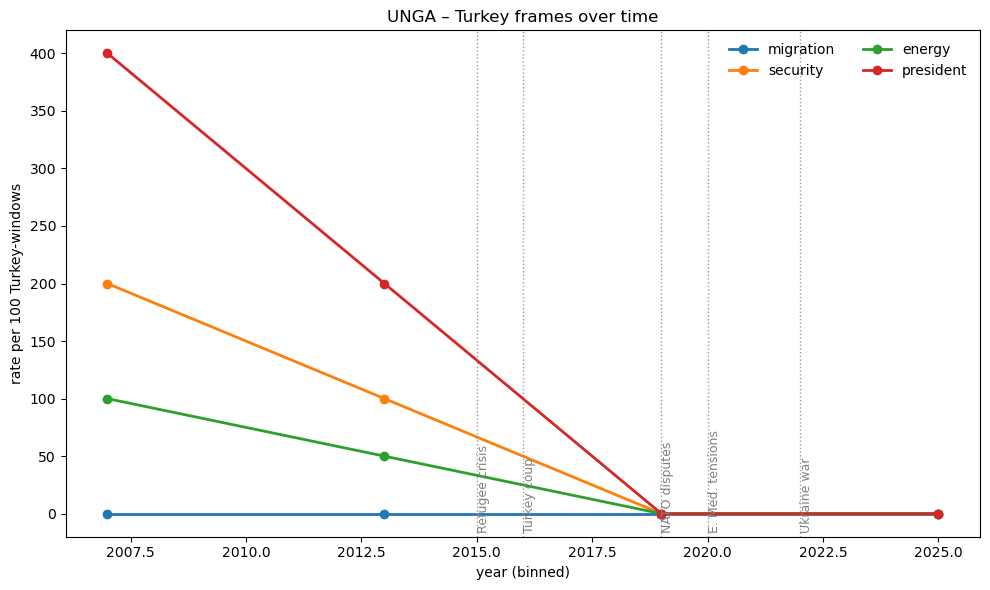

[UNGA] No aggregate changepoints detected (with current penalty).


In [33]:
# === TEMPORAL TREND ANALYSIS: frames over time + changepoints (3y bins, per-100 norm) ===
# Requires: use_df (cols: text, arena, year), concordance_windows(...), matplotlib.
# Optional: EXCLUDE_TERMS already respected inside concordance_windows when pos_filter=True.

from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- (1) Define frames (edit freely) ----
# Use lemmas / lowercase; include common synonyms so counts aren't artificially sparse.
FRAMES = {
    "migration": {
        "migrant", "migration", "refugee", "asylum", "asylee", "displacement",
        "border", "crossing", "readmission"
    },
    "security":  {
        "security", "defense", "defence", "deterrence", "threat", "threats",
        "terrorism", "terrorist", "military", "missile", "radar", "bmd", "alliance", "nato"
    },
    "energy":    {
        "energy", "gas", "lng", "pipeline", "pipelines", "oil", "petroleum",
        "nuclear", "electricity", "grid", "power"
    },
    "president": {
        "president", "erdogan", "recep", "tayyip", "head", "leader"
    },
}

# Default event markers (edit as needed)
EVENTS = {
    2015: "Refugee crisis",
    2016: "Turkey coup",
    2019: "NATO disputes",
    2020: "E. Med. tensions",
    2022: "Ukraine war",
}

# ---- (2) Count frame hits by arena & time, normalized by #Turkey-windows ----
def frame_counts_over_time(
    df,
    frames=FRAMES,
    window=10,
    pos_filter=True,
    bin_size=3,            # group years into 3-year bins (set to 1 for yearly)
):
    """
    For each (arena, year-bin):
      - open concordance windows around 'Turkey' mentions,
      - count tokens,
      - compute frame counts and normalized rates.
    Returns tidy df: arena, year, frame, count, per_window, per100_window.
    """
    rows = []

    # numeric year + binning
    yr = pd.to_numeric(df.get("year", pd.Series([None]*len(df))), errors="coerce")
    if bin_size and bin_size > 1:
        year_key = (yr // bin_size) * bin_size
    else:
        year_key = yr

    for (arena, ybin), dfG in df.assign(_year=year_key).dropna(subset=["_year"]).groupby(["arena", "_year"]):
        total_windows = 0
        bag = []
        for t in dfG["text"]:
            w = concordance_windows(t, window=window, pos_filter=pos_filter)
            if not w:
                continue
            total_windows += 1
            bag.extend(w)

        if total_windows == 0:
            continue

        cnt = Counter(bag)
        ybin = int(float(ybin))
        for frame, lex in frames.items():
            hits = sum(cnt.get(term, 0) for term in lex)
            per_window = hits / total_windows
            rows.append({
                "arena": arena,
                "year": ybin,
                "frame": frame,
                "count": hits,
                "per_window": per_window,
                "per100_window": 100.0 * per_window,   # clearer scale
            })

    out = pd.DataFrame(rows)
    if not out.empty:
        out.sort_values(["arena", "year", "frame"], inplace=True)
    return out

# ---- (3) Optional smoothing helper (simple moving average) ----
def _smooth(series, win=2):
    if win <= 1 or len(series) == 0:
        return np.asarray(series)
    return pd.Series(series).rolling(window=win, center=True, min_periods=1).mean().to_numpy()

# ---- (4) Changepoint detection with 'ruptures' (graceful fallback if not installed) ----
def _changepoints(years, y, model="rbf", pen=None):
    """
    Returns a list of changepoint years using ruptures' PELT.
    If ruptures is missing or series too short, returns [].
    """
    try:
        import ruptures as rpt
    except Exception:
        return []

    y = np.asarray(y, dtype=float)
    if len(y) < 6:
        return []

    algo = rpt.Pelt(model=model).fit(y)
    if pen is None:
        pen = 2.0 * np.log(max(2, len(y)))  # mild penalty
    idxs = algo.predict(pen=pen)           # segment end indices (includes len(y))
    cps = [int(years[i-1]) for i in idxs if 0 < i < len(years)]
    return sorted(set(cps))

# ---- (5) Plot trends for one arena (multi-line) + aggregate changepoints ----
def plot_frame_trends(count_df,
                      arena,
                      frames_to_plot=None,
                      metric="per100_window",   # "per100_window" | "per_window" | "count"
                      smooth=2,                 # moving-average window; set 1 to disable
                      events=EVENTS,
                      figsize=(10, 6)):
    """
    Draws time-series for selected frames within one arena and overlays:
      - aggregate changepoints (computed on mean of selected frames)
      - vertical event markers.
    """
    if count_df.empty:
        print(f"[{arena}] No data to plot.")
        return

    sub = count_df[count_df["arena"] == arena].copy()
    if sub.empty:
        print(f"[{arena}] No rows for this arena.")
        return

    if metric not in {"per100_window", "per_window", "count"}:
        metric = "per100_window"

    # pivot: rows = year (bins), cols = frame
    piv = sub.pivot_table(index="year", columns="frame", values=metric, aggfunc="sum").sort_index()
    piv = piv.fillna(0.0)

    # if bins are sparse, reindex to full range of bins for nicer lines
    if len(piv.index) >= 2:
        step = np.diff(piv.index.values).min()
        full_idx = np.arange(piv.index.min(), piv.index.max() + step, step)
        piv = piv.reindex(full_idx, fill_value=0.0)

    # Pick frames to plot
    if not frames_to_plot:
        frames_to_plot = list(piv.columns)
    frames_to_plot = [f for f in frames_to_plot if f in piv.columns]
    if not frames_to_plot:
        print(f"[{arena}] None of the requested frames are present.")
        return

    years = piv.index.to_numpy()
    Y = np.column_stack([_smooth(piv[f].to_numpy(), win=smooth) for f in frames_to_plot])
    agg = _smooth(np.nanmean(Y, axis=1), win=max(2, smooth))

    # Detect changepoints on aggregate
    cps = _changepoints(years, agg, model="rbf")

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    for j, f in enumerate(frames_to_plot):
        ax.plot(years, Y[:, j], marker="o", linewidth=2, label=f)

    # Aggregate changepoints
    for yr in cps:
        ax.axvline(yr, color="black", linestyle="--", linewidth=1.2, alpha=0.8)
        ax.text(yr, ax.get_ylim()[1], " CP", rotation=90, va="top", ha="left", fontsize=9, color="black")

    # Event markers
    if isinstance(events, dict):
        for yr, label in events.items():
            if years.min() <= yr <= years.max():
                ax.axvline(yr, color="gray", linestyle=":", linewidth=1.0, alpha=0.8)
                ax.text(yr, ax.get_ylim()[0], f" {label}", rotation=90, va="bottom", ha="left", fontsize=9, color="gray")

    ax.set_title(f"{arena} – Turkey frames over time")
    ax.set_xlabel("year (binned)")
    ylab = {"per100_window": "rate per 100 Turkey-windows",
            "per_window": "rate per Turkey-window",
            "count": "raw count"}[metric]
    ax.set_ylabel(ylab)
    ax.legend(ncol=2, frameon=False)
    fig.tight_layout()
    plt.show()

    if cps:
        print(f"[{arena}] Aggregate changepoints detected at years: {cps}")
    else:
        print(f"[{arena}] No aggregate changepoints detected (with current penalty).")

# ---- (6) Run it: build counts, then plot for each arena ----
trend_df = frame_counts_over_time(
    use_df,
    frames=FRAMES,
    window=10,
    pos_filter=True,
    bin_size=3,     # <-- 3-year bins; set to 1 for yearly
)

# Which frames to show (must exist in FRAMES and appear in your data)
frames_to_plot = ["migration", "security", "energy", "president"]

for arena in sorted(trend_df["arena"].dropna().unique()):
    plot_frame_trends(
        trend_df,
        arena=arena,
        frames_to_plot=frames_to_plot,
        metric="per100_window",   # clearer scale
        smooth=2,                 # 2-bin moving average (i.e., ~6 years with bin_size=3)
        events=EVENTS,
        figsize=(10, 6)
    )


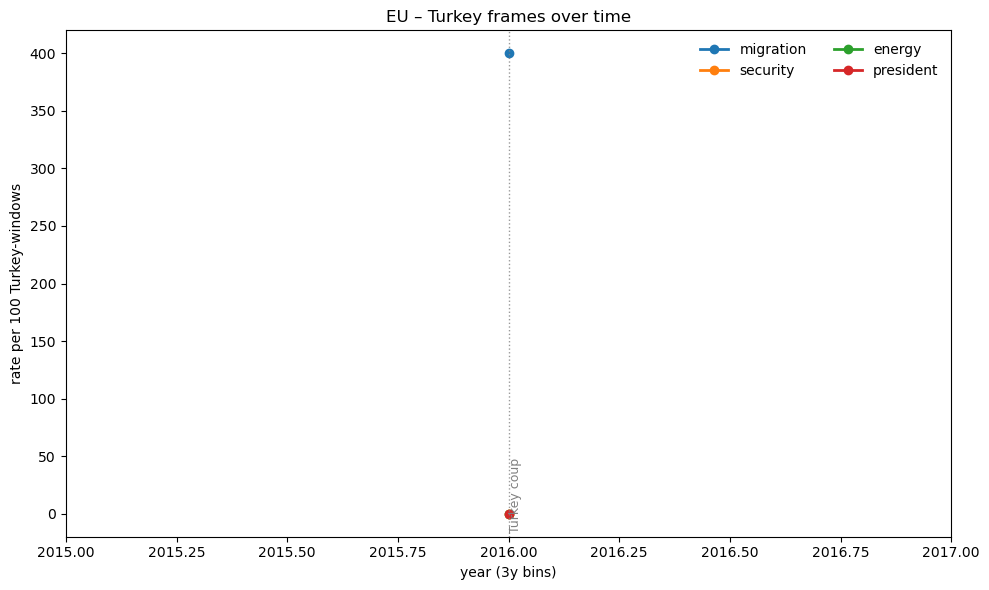

[EU] No aggregate changepoints detected (with current penalty).


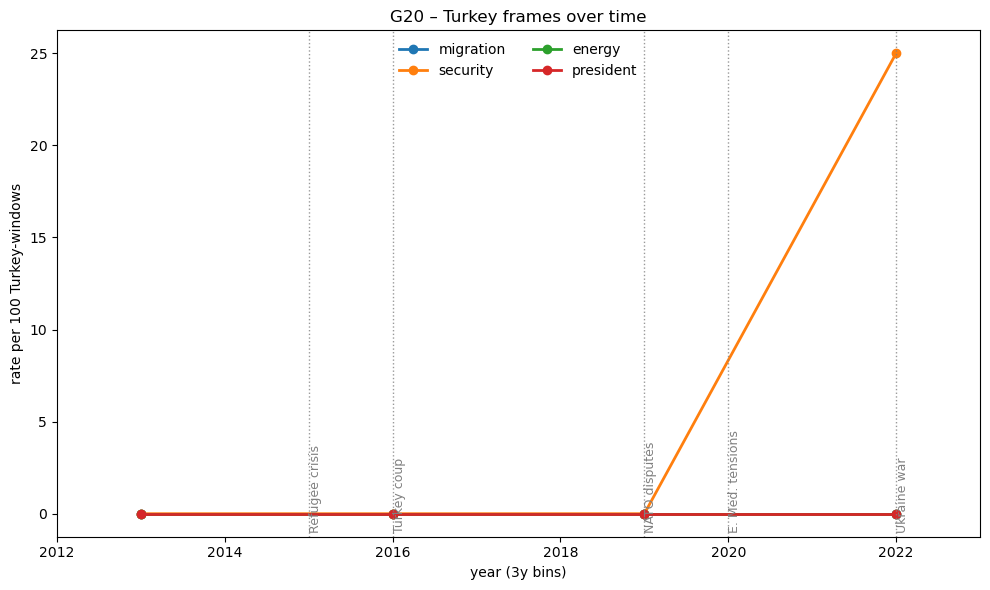

[G20] No aggregate changepoints detected (with current penalty).


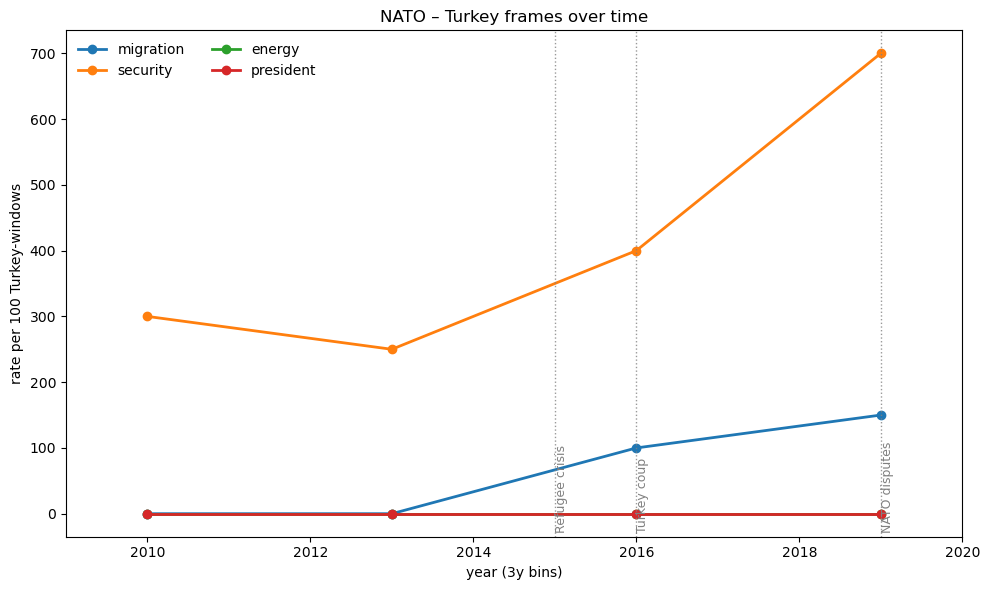

[NATO] No aggregate changepoints detected (with current penalty).


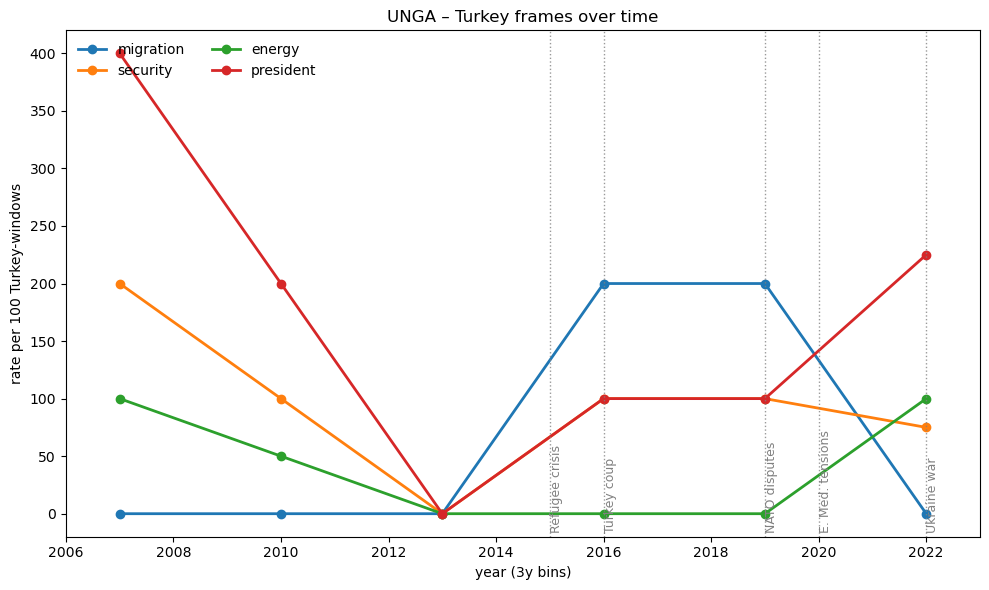

[UNGA] No aggregate changepoints detected (with current penalty).


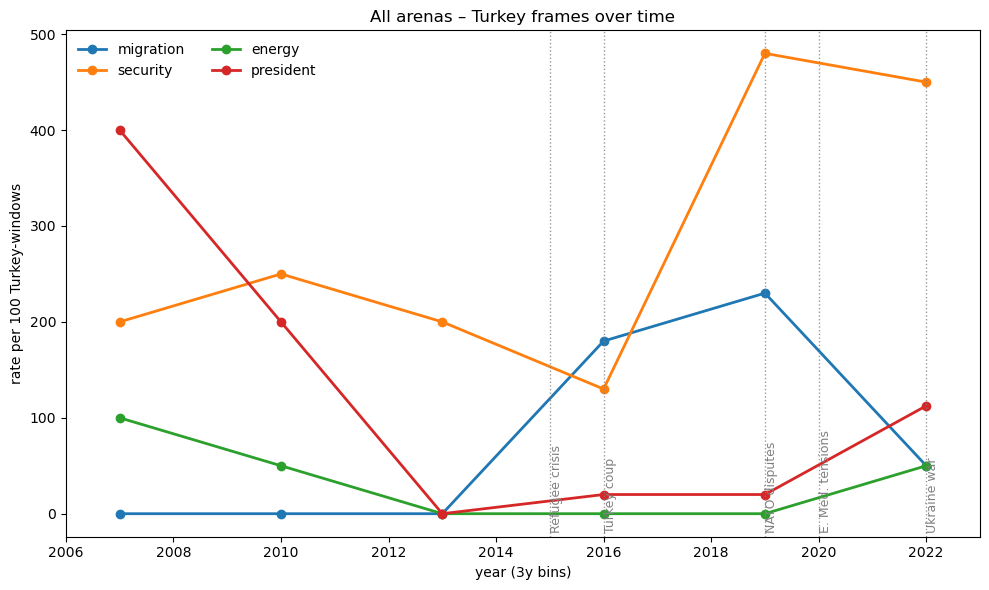

[overall] No aggregate changepoints detected (with current penalty).


In [35]:
# === TEMPORAL TREND ANALYSIS: frames over time + changepoints (3y bins, per-100 norm) ===
# Requires: use_df (cols: text, arena, year), concordance_windows(...).
# Optional: EXCLUDE_TERMS already respected inside concordance_windows when pos_filter=True.

from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- (1) Define frames (edit freely) ----
# Use lemmas / lowercase; include common synonyms so counts aren't artificially sparse.
FRAMES = {
    "migration": {
        "migrant", "migration", "refugee", "asylum", "asylee", "displacement",
        "border", "crossing", "readmission"
    },
    "security":  {
        "security", "defense", "defence", "deterrence", "threat", "threats",
        "terrorism", "terrorist", "military", "missile", "radar", "bmd", "alliance", "nato"
    },
    "energy":    {
        "energy", "gas", "lng", "pipeline", "pipelines", "oil", "petroleum",
        "nuclear", "electricity", "grid", "power"
    },
    "president": {"president", "erdogan", "recep", "tayyip", "head", "leader"},
}

# Default event markers (edit as needed)
EVENTS = {
    2015: "Refugee crisis",
    2016: "Turkey coup",
    2019: "NATO disputes",
    2020: "E. Med. tensions",
    2022: "Ukraine war",
}

# ---- (2) Count frame hits by arena & time, normalized by #Turkey-windows ----
def frame_counts_over_time(
    df,
    frames=FRAMES,
    window=10,
    pos_filter=True,
    bin_size=3,            # group years into 3-year bins (set to 1 for yearly)
):
    """
    For each (arena, year-bin):
      - open concordance windows around 'Turkey' mentions,
      - count tokens,
      - compute frame counts and normalized rates.
    Returns tidy df: arena, year, frame, count, windows, per_window, per100_window.
    """
    rows = []

    # numeric year + binning
    yr = pd.to_numeric(df.get("year", pd.Series([None]*len(df))), errors="coerce")
    if bin_size and bin_size > 1:
        year_key = (yr // bin_size) * bin_size
    else:
        year_key = yr

    for (arena, ybin), dfG in df.assign(_year=year_key).dropna(subset=["_year"]).groupby(["arena", "_year"]):
        total_windows = 0
        bag = []
        for t in dfG["text"]:
            w = concordance_windows(t, window=window, pos_filter=pos_filter)
            if not w:
                continue
            total_windows += 1
            bag.extend(w)

        if total_windows == 0:
            continue

        cnt = Counter(bag)
        ybin = int(float(ybin))
        for frame, lex in frames.items():
            hits = sum(cnt.get(term, 0) for term in lex)
            per_window = hits / total_windows
            rows.append({
                "arena": arena,
                "year": ybin,
                "frame": frame,
                "count": hits,
                "windows": total_windows,
                "per_window": per_window,
                "per100_window": 100.0 * per_window,   # clearer scale
            })

    out = pd.DataFrame(rows)
    if not out.empty:
        out.sort_values(["arena", "year", "frame"], inplace=True)
    return out

# ---- (3) Optional smoothing helper (simple moving average) ----
def _smooth(series, win=2):
    if win <= 1 or len(series) == 0:
        return np.asarray(series)
    return pd.Series(series).rolling(window=win, center=True, min_periods=1).mean().to_numpy()

# ---- (4) Changepoint detection with 'ruptures' (graceful fallback if not installed) ----
def _changepoints(years, y, model="rbf", pen=None):
    """
    Returns a list of changepoint years using ruptures' PELT.
    If ruptures is missing or series too short, returns [].
    """
    try:
        import ruptures as rpt
    except Exception:
        return []

    y = np.asarray(y, dtype=float)
    if len(y) < 6:
        return []

    algo = rpt.Pelt(model=model).fit(y)
    if pen is None:
        pen = 2.0 * np.log(max(2, len(y)))  # mild penalty
    idxs = algo.predict(pen=pen)           # segment end indices (includes len(y))
    cps = [int(years[i-1]) for i in idxs if 0 < i < len(years)]
    return sorted(set(cps))

# ---- (5) Plot trends for one arena (multi-line) + aggregate changepoints ----
def plot_frame_trends(count_df,
                      arena,
                      frames_to_plot=None,
                      metric="per100_window",   # "per100_window" | "per_window" | "count"
                      smooth=2,                 # moving-average window; set 1 to disable
                      events=EVENTS,
                      bin_size=3,
                      figsize=(10, 6)):
    """
    Draws time-series for selected frames within one arena and overlays:
      - aggregate changepoints (computed on mean of selected frames)
      - vertical event markers.
    """
    if count_df.empty:
        print(f"[{arena}] No data to plot.")
        return

    sub = count_df[count_df["arena"] == arena].copy()
    if sub.empty:
        print(f"[{arena}] No rows for this arena.")
        return

    if metric not in {"per100_window", "per_window", "count"}:
        metric = "per100_window"

    piv = sub.pivot_table(index="year", columns="frame", values=metric, aggfunc="sum").sort_index()
    piv = piv.fillna(0.0)

    # Fill missing bins across full observed year range (use known bin_size)
    if len(piv.index) >= 1:
        step = bin_size if bin_size and bin_size > 1 else 1
        full_idx = np.arange(piv.index.min(), piv.index.max() + step, step)
        piv = piv.reindex(full_idx, fill_value=0.0)

    # Pick frames to plot
    if not frames_to_plot:
        frames_to_plot = list(piv.columns)
    frames_to_plot = [f for f in frames_to_plot if f in piv.columns]
    if not frames_to_plot:
        print(f"[{arena}] None of the requested frames are present.")
        return

    years = piv.index.to_numpy()
    Y = np.column_stack([_smooth(piv[f].to_numpy(), win=smooth) for f in frames_to_plot])
    agg = _smooth(np.nanmean(Y, axis=1), win=max(2, smooth))

    # Detect changepoints on aggregate (slightly lower pen to allow short series)
    cps = _changepoints(years, agg, model="rbf", pen=1.5)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    for j, f in enumerate(frames_to_plot):
        ax.plot(years, Y[:, j], marker="o", linewidth=2, label=f)

    # Aggregate changepoints
    for yr in cps:
        ax.axvline(yr, color="black", linestyle="--", linewidth=1.2, alpha=0.8)
        ax.text(yr, ax.get_ylim()[1], " CP", rotation=90, va="top", ha="left", fontsize=9, color="black")

    # Event markers
    if isinstance(events, dict):
        for yr, label in events.items():
            if years.min() <= yr <= years.max():
                ax.axvline(yr, color="gray", linestyle=":", linewidth=1.0, alpha=0.8)
                ax.text(yr, ax.get_ylim()[0], f" {label}", rotation=90, va="bottom", ha="left", fontsize=9, color="gray")

    ax.set_xlim(years.min() - 1, years.max() + 1)
    ax.set_title(f"{arena} – Turkey frames over time")
    ax.set_xlabel(f"year ({'{}y'.format(bin_size)} bins)" if bin_size and bin_size > 1 else "year")
    ylab = {"per100_window": "rate per 100 Turkey-windows",
            "per_window": "rate per Turkey-window",
            "count": "raw count"}[metric]
    ax.set_ylabel(ylab)
    ax.legend(ncol=2, frameon=False)
    fig.tight_layout()
    plt.show()

    if cps:
        print(f"[{arena}] Aggregate changepoints detected at years: {cps}")
    else:
        print(f"[{arena}] No aggregate changepoints detected (with current penalty).")

# ---- (6) NEW: Overall (all-arenas) trends with proper weighting ----
def build_overall_trends(count_df):
    """
    Properly aggregate across arenas: sum counts and windows, then compute rates.
    Returns df with: year, frame, count, windows, per_window, per100_window.
    """
    if count_df.empty:
        return pd.DataFrame(columns=["year","frame","count","windows","per_window","per100_window"])

    g = count_df.groupby(["year", "frame"], as_index=False)[["count", "windows"]].sum()
    g["per_window"] = g["count"] / g["windows"].replace(0, np.nan)
    g["per_window"] = g["per_window"].fillna(0.0)
    g["per100_window"] = 100.0 * g["per_window"]
    return g

def plot_overall_trends(overall_df,
                        frames_to_plot=None,
                        metric="per100_window",
                        smooth=2,
                        events=EVENTS,
                        bin_size=3,
                        title="All arenas – Turkey frames over time",
                        figsize=(10, 6)):
    if overall_df.empty:
        print("[overall] No data to plot.")
        return

    if metric not in {"per100_window", "per_window", "count"}:
        metric = "per100_window"

    piv = overall_df.pivot_table(index="year", columns="frame", values=metric, aggfunc="sum").sort_index()
    piv = piv.fillna(0.0)

    if len(piv.index) >= 1:
        step = bin_size if bin_size and bin_size > 1 else 1
        full_idx = np.arange(piv.index.min(), piv.index.max() + step, step)
        piv = piv.reindex(full_idx, fill_value=0.0)

    if not frames_to_plot:
        frames_to_plot = list(piv.columns)
    frames_to_plot = [f for f in frames_to_plot if f in piv.columns]
    if not frames_to_plot:
        print("[overall] None of the requested frames are present.")
        return

    years = piv.index.to_numpy()
    Y = np.column_stack([_smooth(piv[f].to_numpy(), win=smooth) for f in frames_to_plot])
    agg = _smooth(np.nanmean(Y, axis=1), win=max(2, smooth))
    cps = _changepoints(years, agg, model="rbf", pen=1.5)

    fig, ax = plt.subplots(figsize=figsize)
    for j, f in enumerate(frames_to_plot):
        ax.plot(years, Y[:, j], marker="o", linewidth=2, label=f)

    for yr in cps:
        ax.axvline(yr, color="black", linestyle="--", linewidth=1.2, alpha=0.8)
        ax.text(yr, ax.get_ylim()[1], " CP", rotation=90, va="top", ha="left", fontsize=9)

    if isinstance(events, dict):
        for yr, label in events.items():
            if years.min() <= yr <= years.max():
                ax.axvline(yr, color="gray", linestyle=":", linewidth=1.0, alpha=0.8)
                ax.text(yr, ax.get_ylim()[0], f" {label}", rotation=90, va="bottom", ha="left", fontsize=9, color="gray")

    ax.set_xlim(years.min() - 1, years.max() + 1)
    ax.set_title(title)
    ax.set_xlabel(f"year ({'{}y'.format(bin_size)} bins)" if bin_size and bin_size > 1 else "year")
    ylab = {"per100_window": "rate per 100 Turkey-windows",
            "per_window": "rate per Turkey-window",
            "count": "raw count"}[metric]
    ax.set_ylabel(ylab)
    ax.legend(ncol=2, frameon=False)
    fig.tight_layout()
    plt.show()

    if cps:
        print(f"[overall] Aggregate changepoints detected at years: {cps}")
    else:
        print("[overall] No aggregate changepoints detected (with current penalty).")

# ---- (7) Run it: build counts, plot per arena, then plot overall ----
BIN_SIZE = 3  # 3-year bins (set to 1 for yearly)

trend_df = frame_counts_over_time(
    use_df,
    frames=FRAMES,
    window=10,
    pos_filter=True,
    bin_size=BIN_SIZE,
)

frames_to_plot = ["migration", "security", "energy", "president"]

# Per-arena charts
for arena in sorted(trend_df["arena"].dropna().unique()):
    plot_frame_trends(
        trend_df,
        arena=arena,
        frames_to_plot=frames_to_plot,
        metric="per100_window",   # clearer scale
        smooth=2,                 # 2-bin moving average (~6 years with 3y bins)
        events=EVENTS,
        bin_size=BIN_SIZE,
        figsize=(10, 6),
    )

# Overall chart (all arenas combined, weighted correctly)
overall_df = build_overall_trends(trend_df)
plot_overall_trends(
    overall_df,
    frames_to_plot=frames_to_plot,
    metric="per100_window",
    smooth=2,
    events=EVENTS,
    bin_size=BIN_SIZE,
    title="All arenas – Turkey frames over time",
    figsize=(10, 6),
)
